import and inline matplotlib

In [1]:
import ROOT as rt
import uproot
# from root_numpy import root2array, tree2array
#from root_pandas import read_root
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

import gpustat
gpustat.print_gpustat()
os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/02
gpu-ibanks-1.hep.caltech.edu   Thu Sep 16 13:44:01 2021  470.57.02
[0] NVIDIA GeForce GTX TITAN X | 32'C,   0 % |     1 / 12212 MB |
[1] NVIDIA GeForce GTX TITAN X | 31'C,   0 % |     1 / 12212 MB |


In [2]:
def samp_to_df(samp_name, total_num):
    dfs = []
    tree_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'subleading_pho_pt_over_dimass', b'subleading_bjet_pt_over_dimass', b'subleading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR', b'diphoton_pt_over_diphoton_mass',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR', b'dibjet_pt_over_dibjet_mass', b'dibjet_pt_over_dibjet_mass_corr',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
           b'rec_pho_bjet_min_dR', b'all_pho_bjet_min_dR', b'dphi_met_leading_bjet', b'dphi_met_subleading_bjet',
           b'leading_vbfjet_pt', b'subleading_vbfjet_pt', b'divbfjet_pt', b'divbfjet_mass',
           b'leading_vbfjet_phi', b'leading_vbfjet_eta', b'subleading_vbfjet_phi', b'subleading_vbfjet_eta',
           b'leading_vbfjet_pt_over_dimass', b'subleading_vbfjet_pt_over_dimass', b'divbfjet_pt_over_dimass',
           b'divbfjet_eta', b'vbfjet_delR', b'vbfjet_del_eta',
           b'MET_pt', b'MET_phi', b'MET_sumEt',
           b'recon', b'ggHH_recon', b'VBFHH_recon', b'genweight', b'nbjet', b'nvbfjet', b'nphoton', b'njet',
           b'run', b'lumi', b'event']
    for i in range(total_num+1):
        file_name = f'../HHbbggAna/condor/output/{samp_name}{i}.root'
        samp_file = uproot.open(file_name)
        samp_array = samp_file['tree'].arrays(tree_vars)
        samp_df = pd.DataFrame(samp_array)
        dfs.append(samp_df)
    combine_df = pd.concat(dfs)
    return combine_df

def samp_to_df_sig(samp_name, total_num):
    dfs = []
    for i in range(total_num+1):
        file_name = f'../HHbbggAna/condor/output/{samp_name}{i}.root'
        samp_file = uproot.open(file_name)
        samp_array = samp_file['tree'].arrays()
        samp_df = pd.DataFrame(samp_array)
        dfs.append(samp_df)
    combine_df = pd.concat(dfs)
    return combine_df

In [3]:
# Signal recon efficiency
GluGlutoHH_df_2018_o = samp_to_df_sig('1_signal_recon/job_1_ntuple20180810v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job1ifile', 21)
GluGlutoHH_df_2017_o = samp_to_df_sig('1_signal_recon/job_1_ntuple20170810v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job1ifile', 15)
GluGlutoHH_df_2016_o = samp_to_df_sig('1_signal_recon/job_1_ntuple20160810v1/GluGluToHHTo2B2G_node_cHHH1_TuneCUETP8M1_PSWeights_13TeV-powheg-pythia8Job1ifile', 3)
GluGlutoHH_df_o = pd.concat([GluGlutoHH_df_2018_o, GluGlutoHH_df_2017_o, GluGlutoHH_df_2016_o], ignore_index=True)

VBFHH_df_2018_o = samp_to_df_sig('1_signal_recon/job_2_ntuple20180810v1/VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8Job2ifile', 2)
VBFHH_df_2017_o = samp_to_df_sig('1_signal_recon/job_2_ntuple20170810v1/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob2ifile', 6)
VBFHH_df_2016_o = samp_to_df_sig('1_signal_recon/job_2_ntuple20160810v1/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob2ifile', 13)
VBFHH_df_o = pd.concat([VBFHH_df_2018_o, VBFHH_df_2017_o, VBFHH_df_2016_o], ignore_index=True)

ggHH_dfs = [GluGlutoHH_df_2016_o, GluGlutoHH_df_2017_o, GluGlutoHH_df_2018_o, GluGlutoHH_df_o]

VBFHH_dfs = [VBFHH_df_2016_o, VBFHH_df_2017_o, VBFHH_df_2018_o, VBFHH_df_o]

signals = [ggHH_dfs, VBFHH_dfs]

signal_name = ['GluGlutoHH', 'VBFtoHH']

year = [2016, 2017, 2018, 'Combine']

for x in range(len(signals)):
    for i in range(len(year)):
        print(f'{year[i]} {signal_name[x]}')
        total = np.sum(signals[x][i].loc[:, b'genweight'].values)
        print(f'Total: {total}')
        rec = np.sum(signals[x][i].loc[:, b'recon'].values * signals[x][i].loc[:, b'genweight'].values)
        print(f'Overall recon: {rec}')
        brec = np.sum(signals[x][i].loc[:, b'bjet_recon'].values * signals[x][i].loc[:, b'genweight'].values)
        print(f'Bjet recon: {brec}')
        prec = np.sum(signals[x][i].loc[:, b'photon_recon'].values * signals[x][i].loc[:, b'genweight'].values)
        print(f'Photon recon: {prec}')
        VBFHHrec = np.sum(signals[x][i].loc[:, b'VBFHH_recon'].values * signals[x][i].loc[:, b'genweight'].values)
        #ggHHrec = np.sum(signals[x][i].loc[:, b'ggHH_recon'].values * signals[x][i].loc[:, b'genweight'].values)
        ggHHrec = rec - VBFHHrec
        print(f'ggHH recon: {ggHHrec}')
        #VBFHHrec = np.sum(signals[x][i].loc[:, b'VBFHH_recon'].values * signals[x][i].loc[:, b'genweight'].values)
        print(f'VBFHH recon: {VBFHHrec}')
        print('\n')

2016 GluGlutoHH
Total: 2.9473607540130615
Overall recon: 0.6933106184005737
Bjet recon: 0.8389099836349487
Photon recon: 1.1866868734359741
ggHH recon: 0.5580263137817383
VBFHH recon: 0.13528427481651306


2017 GluGlutoHH
Total: 3.4071156978607178
Overall recon: 0.809533417224884
Bjet recon: 0.9958939552307129
Photon recon: 1.339854121208191
ggHH recon: 0.6686903238296509
VBFHH recon: 0.14084307849407196


2018 GluGlutoHH
Total: 4.9095306396484375
Overall recon: 1.1894625425338745
Bjet recon: 1.4673346281051636
Photon recon: 1.9609299898147583
ggHH recon: 0.9749376177787781
VBFHH recon: 0.21452490985393524


Combine GluGlutoHH
Total: 11.264006614685059
Overall recon: 2.6923067569732666
Bjet recon: 3.3021395206451416
Photon recon: 4.487470626831055
ggHH recon: 2.2016544342041016
VBFHH recon: 0.4906522035598755


2016 VBFtoHH
Total: 0.16383717954158783
Overall recon: 0.026128845289349556
Bjet recon: 0.03241858631372452
Photon recon: 0.05805882811546326
ggHH recon: 0.013843096792697906
VB

## Dataframe Setup

### Photon ID 90% v 80%

In [3]:
# Set up dataframes - 2018 (recon == 1; photon cut == 90)

# Signals
GluGluToHH_df_2018_90 = samp_to_df('job_2_ntuple20180817v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job2ifile', 0)
VBFHH_df_2018_90 = samp_to_df('job_3_ntuple20180817v1/VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8Job3ifile', 0)

# Backgrounds
VHToGG_df_2018_90 = samp_to_df('job_4_ntuple20180817v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job4ifile', 0)
ttHToGG_df_2018_90 = samp_to_df('job_5_ntuple20180817v1/ttHToGG_M125_TuneCP5_PSweights_13TeV-powheg-pythia8Job5ifile', 0)
VBFHToGG_df_2018_90 = samp_to_df('job_6_ntuple20180817v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8Job6ifile', 0)
GluGluHToGG_df_2018_90 = samp_to_df('job_7_ntuple20180817v1/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8Job7ifile', 0)
TTJets_df_2018_90 = samp_to_df('job_8_ntuple20180817v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job8ifile', 60)
TTGJets_df_2018_90 = samp_to_df('job_9_ntuple20180817v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job9ifile', 3)
TTGG_0Jets_df_2018_90 = samp_to_df('job_10_ntuple20180817v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job10ifile', 5)
GJet_SmallPt_df_2018_90 = samp_to_df('job_11_ntuple20180817v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 3)
GJet_BigPt_df_2018_90 = samp_to_df('job_12_ntuple20180817v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job12ifile', 2)
DiPhotonJetsBox_df_2018_90 = samp_to_df('job_13_ntuple20180817v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob13ifile', 4)
DiPhotonJetsBox1B_df_2018_90 = samp_to_df('job_14_ntuple20180817v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob14ifile', 0)
DiPhotonJetsBox2B_df_2018_90 = samp_to_df('job_15_ntuple20180817v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob15ifile', 0)
QCD_Jets_df_2018_90 = samp_to_df('job_16_ntuple20180817v1/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job16ifile', 15)

In [4]:
# Set up dataframes - 2017 (recon == 1; photon cut == 90) 

# Signals
GluGluToHH_df_2017_90 = samp_to_df('job_2_ntuple20170817v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job2ifile', 3)
VBFHH_df_2017_90 = samp_to_df('job_3_ntuple20170817v1/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob3ifile', 1)


# Backgrounds
VHToGG_df_2017_90 = samp_to_df('job_4_ntuple20170817v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job4ifile', 0)
ttHToGG_df_2017_90 = samp_to_df('job_5_ntuple20170817v1/ttHToGG_M125_13TeV_powheg_pythia8Job5ifile', 0)
VBFHToGG_df_2017_90 = samp_to_df('job_6_ntuple20170817v1/VBFHToGG_M-125_13TeV_powheg_pythia8Job6ifile', 2)
GluGluHToGG_df_2017_90 = samp_to_df('job_7_ntuple20170817v1/GluGluHToGG_M-125_13TeV_powheg_pythia8Job7ifile', 0)
TTJets_df_2017_90 = samp_to_df('job_8_ntuple20170817v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job8ifile', 38)
TTGJets_df_2017_90 = samp_to_df('job_9_ntuple20170817v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job9ifile', 10)
TTGG_0Jets_df_2017_90 = samp_to_df('job_10_ntuple20170817v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job10ifile', 1)
GJet_SmallPt_df_2017_90 = samp_to_df('job_11_ntuple20170817v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 2)
GJet_BigPt_df_2017_90 = samp_to_df('job_12_ntuple20170817v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job12ifile', 20)
DiPhotonJetsBox_df_2017_90 = samp_to_df('job_13_ntuple20170817v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob13ifile', 16)
DiPhotonJetsBox1B_df_2017_90 = samp_to_df('job_14_ntuple20170817v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob14ifile', 3)
DiPhotonJetsBox2B_df_2017_90 = samp_to_df('job_15_ntuple20170817v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob15ifile', 5)
QCD_Jets_df_2017_90 = samp_to_df('job_16_ntuple20170817v1/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job16ifile', 3)

In [5]:
# Set up dataframes - 2016 (recon == 1; photon cut == 90) 

# Signals
GluGluToHH_df_2016_90 = samp_to_df('job_2_ntuple20160817v1/GluGluToHHTo2B2G_node_cHHH1_TuneCUETP8M1_PSWeights_13TeV-powheg-pythia8Job2ifile', 0)
VBFHH_df_2016_90 = samp_to_df('job_3_ntuple20160817v1/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob3ifile', 0)

# Background
VHToGG_df_2016_90 = samp_to_df('job_4_ntuple20160817v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job4ifile', 0)
ttHToGG_df_2016_90 = samp_to_df('job_5_ntuple20160817v1/ttHToGG_M125_13TeV_powheg_pythia8_v2Job5ifile', 0)
VBFHToGG_df_2016_90 = samp_to_df('job_6_ntuple20160817v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8_v2Job6ifile', 2)
GluGluHToGG_df_2016_90 = samp_to_df('job_7_ntuple20160817v1/GluGluHToGG_M125_13TeV_amcatnloFXFX_pythiaJob7ifile', 0)
TTJets_df_2016_90 = samp_to_df('job_8_ntuple20160817v1/TTJets_TuneCUETP8M2T4_13TeV-amcatnloFXFX-pythia8Job8ifile', 8)
TTGJets_df_2016_90 = samp_to_df('job_9_ntuple20160817v1/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8Job9ifile', 2)
TTGG_0Jets_df_2016_90 = samp_to_df('job_10_ntuple20160817v1/TTGG_0Jets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8Job10ifile', 0)
GJet_SmallPt_df_2016_90 = samp_to_df('job_11_ntuple20160817v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job11ifile', 2)
GJet_BigPt_df_2016_90 = samp_to_df('job_12_ntuple20160817v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job12ifile', 12)
DiPhotonJetsBox_df_2016_90 = samp_to_df('job_13_ntuple20160817v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob13ifile', 9)
DiPhotonJetsBox1B_df_2016_90 = samp_to_df('job_14_ntuple20160817v1/DiPhotonJetsBox1BJet_MGG-80toInf_TuneSherpa_13TeV-SherpaJob14ifile', 3)
DiPhotonJetsBox2B_df_2016_90 = samp_to_df('job_15_ntuple20160817v1/DiPhotonJetsBox2BJets_MGG-80toInf_TuneSherpa_13TeV-SherpaJob15ifile', 4)
QCD_Jets_df_2016_90 = samp_to_df('job_16_ntuple20160817v1/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job16ifile', 3)

In [6]:
# Set up dataframes - 2018 (recon == 1; photon cut == 80) 

# Signals
GluGluToHH_df_2018_80 = samp_to_df('job_2_ntuple20180817v2/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job2ifile', 0)
VBFHH_df_2018_80 = samp_to_df('job_3_ntuple20180817v2/VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8Job3ifile', 0)

# Backgrounds
VHToGG_df_2018_80 = samp_to_df('job_4_ntuple20180817v2/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job4ifile', 0)
ttHToGG_df_2018_80 = samp_to_df('job_5_ntuple20180817v2/ttHToGG_M125_TuneCP5_PSweights_13TeV-powheg-pythia8Job5ifile', 0)
VBFHToGG_df_2018_80 = samp_to_df('job_6_ntuple20180817v2/VBFHToGG_M125_13TeV_amcatnlo_pythia8Job6ifile', 0)
GluGluHToGG_df_2018_80 = samp_to_df('job_7_ntuple20180817v2/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8Job7ifile', 0)
TTJets_df_2018_80 = samp_to_df('job_8_ntuple20180817v2/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job8ifile', 60)
TTGJets_df_2018_80 = samp_to_df('job_9_ntuple20180817v2/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job9ifile', 3)
TTGG_0Jets_df_2018_80 = samp_to_df('job_10_ntuple20180817v2/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job10ifile', 5)
GJet_SmallPt_df_2018_80 = samp_to_df('job_11_ntuple20180817v2/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 3)
GJet_BigPt_df_2018_80 = samp_to_df('job_12_ntuple20180817v2/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job12ifile', 2)
DiPhotonJetsBox_df_2018_80 = samp_to_df('job_13_ntuple20180817v2/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob13ifile', 4)
DiPhotonJetsBox1B_df_2018_80 = samp_to_df('job_14_ntuple20180817v2/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob14ifile', 0)
DiPhotonJetsBox2B_df_2018_80 = samp_to_df('job_15_ntuple20180817v2/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob15ifile', 0)
QCD_Jets_df_2018_80 = samp_to_df('job_16_ntuple20180817v2/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job16ifile', 15)

In [7]:
# Set up dataframes - 2017 (recon == 1; photon cut == 80) 

# Signals
GluGluToHH_df_2017_80 = samp_to_df('job_2_ntuple20170817v2/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job2ifile', 3)
VBFHH_df_2017_80 = samp_to_df('job_3_ntuple20170817v2/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob3ifile', 1)


# Backgrounds
VHToGG_df_2017_80 = samp_to_df('job_4_ntuple20170817v2/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job4ifile', 0)
ttHToGG_df_2017_80 = samp_to_df('job_5_ntuple20170817v2/ttHToGG_M125_13TeV_powheg_pythia8Job5ifile', 0)
VBFHToGG_df_2017_80 = samp_to_df('job_6_ntuple20170817v2/VBFHToGG_M-125_13TeV_powheg_pythia8Job6ifile', 2)
GluGluHToGG_df_2017_80 = samp_to_df('job_7_ntuple20170817v2/GluGluHToGG_M-125_13TeV_powheg_pythia8Job7ifile', 0)
TTJets_df_2017_80 = samp_to_df('job_8_ntuple20170817v2/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job8ifile', 38)
TTGJets_df_2017_80 = samp_to_df('job_9_ntuple20170817v2/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job9ifile', 10)
TTGG_0Jets_df_2017_80 = samp_to_df('job_10_ntuple20170817v2/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job10ifile', 1)
GJet_SmallPt_df_2017_80 = samp_to_df('job_11_ntuple20170817v2/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 2)
GJet_BigPt_df_2017_80 = samp_to_df('job_12_ntuple20170817v2/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job12ifile', 20)
DiPhotonJetsBox_df_2017_80 = samp_to_df('job_13_ntuple20170817v2/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob13ifile', 16)
DiPhotonJetsBox1B_df_2017_80 = samp_to_df('job_14_ntuple20170817v2/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob14ifile', 3)
DiPhotonJetsBox2B_df_2017_80 = samp_to_df('job_15_ntuple20170817v2/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob15ifile', 5)
QCD_Jets_df_2017_80 = samp_to_df('job_16_ntuple20170817v2/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job16ifile', 3)

In [8]:
# Set up dataframes - 2016 (recon == 1; photon cut == 80) 

# Signals
GluGluToHH_df_2016_80 = samp_to_df('job_2_ntuple20160817v2/GluGluToHHTo2B2G_node_cHHH1_TuneCUETP8M1_PSWeights_13TeV-powheg-pythia8Job2ifile', 0)
VBFHH_df_2016_80 = samp_to_df('job_3_ntuple20160817v2/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob3ifile', 0)

# Background
VHToGG_df_2016_80 = samp_to_df('job_4_ntuple20160817v2/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job4ifile', 0)
ttHToGG_df_2016_80 = samp_to_df('job_5_ntuple20160817v2/ttHToGG_M125_13TeV_powheg_pythia8_v2Job5ifile', 0)
VBFHToGG_df_2016_80 = samp_to_df('job_6_ntuple20160817v2/VBFHToGG_M125_13TeV_amcatnlo_pythia8_v2Job6ifile', 2)
GluGluHToGG_df_2016_80 = samp_to_df('job_7_ntuple20160817v2/GluGluHToGG_M125_13TeV_amcatnloFXFX_pythiaJob7ifile', 0)
TTJets_df_2016_80 = samp_to_df('job_8_ntuple20160817v2/TTJets_TuneCUETP8M2T4_13TeV-amcatnloFXFX-pythia8Job8ifile', 8)
TTGJets_df_2016_80 = samp_to_df('job_9_ntuple20160817v2/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8Job9ifile', 2)
TTGG_0Jets_df_2016_80 = samp_to_df('job_10_ntuple20160817v2/TTGG_0Jets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8Job10ifile', 0)
GJet_SmallPt_df_2016_80 = samp_to_df('job_11_ntuple20160817v2/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job11ifile', 2)
GJet_BigPt_df_2016_80 = samp_to_df('job_12_ntuple20160817v2/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job12ifile', 12)
DiPhotonJetsBox_df_2016_80 = samp_to_df('job_13_ntuple20160817v2/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob13ifile', 9)
DiPhotonJetsBox1B_df_2016_80 = samp_to_df('job_14_ntuple20160817v2/DiPhotonJetsBox1BJet_MGG-80toInf_TuneSherpa_13TeV-SherpaJob14ifile', 3)
DiPhotonJetsBox2B_df_2016_80 = samp_to_df('job_15_ntuple20160817v2/DiPhotonJetsBox2BJets_MGG-80toInf_TuneSherpa_13TeV-SherpaJob15ifile', 4)
QCD_Jets_df_2016_80 = samp_to_df('job_16_ntuple20160817v2/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job16ifile', 3)

In [9]:
# Combine by sample (recon == 1; photon cut == 90)

# Signals 
GluGluToHH_df_90 = pd.concat([GluGluToHH_df_2018_90, GluGluToHH_df_2017_90, GluGluToHH_df_2016_90], ignore_index=True)
VBFHH_df_90 = pd.concat([VBFHH_df_2018_90, VBFHH_df_2017_90, VBFHH_df_2016_90], ignore_index=True)

# Backgrounds
VHToGG_df_90 = pd.concat([VHToGG_df_2018_90, VHToGG_df_2017_90, VHToGG_df_2016_90], ignore_index=True)
ttHToGG_df_90 = pd.concat([ttHToGG_df_2018_90, ttHToGG_df_2017_90, ttHToGG_df_2016_90], ignore_index=True)
VBFHToGG_df_90 = pd.concat([VBFHToGG_df_2018_90, VBFHToGG_df_2017_90, VBFHToGG_df_2016_90], ignore_index=True)
GluGluHToGG_df_90 = pd.concat([GluGluHToGG_df_2018_90, GluGluHToGG_df_2017_90, GluGluHToGG_df_2016_90], ignore_index=True)
TTJets_df_90 = pd.concat([TTJets_df_2018_90, TTJets_df_2017_90, TTJets_df_2016_90], ignore_index=True)
TTGJets_df_90 = pd.concat([TTGJets_df_2018_90, TTGJets_df_2017_90, TTGJets_df_2016_90], ignore_index=True)
TTGG_0Jets_df_90 = pd.concat([TTGG_0Jets_df_2018_90, TTGG_0Jets_df_2017_90, TTGG_0Jets_df_2016_90], ignore_index=True)
GJet_SmallPt_df_90 = pd.concat([GJet_SmallPt_df_2018_90, GJet_SmallPt_df_2017_90, GJet_SmallPt_df_2016_90], ignore_index=True)
GJet_BigPt_df_90 = pd.concat([GJet_BigPt_df_2018_90, GJet_BigPt_df_2017_90, GJet_BigPt_df_2016_90], ignore_index=True)
DiPhotonJetsBox_df_90 = pd.concat([DiPhotonJetsBox_df_2018_90, DiPhotonJetsBox_df_2017_90, DiPhotonJetsBox_df_2016_90], ignore_index=True)
DiPhotonJetsBox1B_df_90 = pd.concat([DiPhotonJetsBox1B_df_2018_90, DiPhotonJetsBox1B_df_2017_90, DiPhotonJetsBox1B_df_2016_90], ignore_index=True)
DiPhotonJetsBox2B_df_90 = pd.concat([DiPhotonJetsBox2B_df_2018_90, DiPhotonJetsBox2B_df_2017_90, DiPhotonJetsBox2B_df_2016_90], ignore_index=True)
QCD_Jets_df_90 = pd.concat([QCD_Jets_df_2018_90, QCD_Jets_df_2017_90, QCD_Jets_df_2016_90], ignore_index=True)

In [10]:
# Combine by sample (recon == 1; photon cut == 80)

# Signals 
GluGluToHH_df_80 = pd.concat([GluGluToHH_df_2018_80, GluGluToHH_df_2017_80, GluGluToHH_df_2016_80], ignore_index=True)
VBFHH_df_80 = pd.concat([VBFHH_df_2018_80, VBFHH_df_2017_80, VBFHH_df_2016_80], ignore_index=True)

# Backgrounds
VHToGG_df_80 = pd.concat([VHToGG_df_2018_80, VHToGG_df_2017_80, VHToGG_df_2016_80], ignore_index=True)
ttHToGG_df_80 = pd.concat([ttHToGG_df_2018_80, ttHToGG_df_2017_80, ttHToGG_df_2016_80], ignore_index=True)
VBFHToGG_df_80 = pd.concat([VBFHToGG_df_2018_80, VBFHToGG_df_2017_80, VBFHToGG_df_2016_80], ignore_index=True)
GluGluHToGG_df_80 = pd.concat([GluGluHToGG_df_2018_80, GluGluHToGG_df_2017_80, GluGluHToGG_df_2016_80], ignore_index=True)
TTJets_df_80 = pd.concat([TTJets_df_2018_80, TTJets_df_2017_80, TTJets_df_2016_80], ignore_index=True)
TTGJets_df_80 = pd.concat([TTGJets_df_2018_80, TTGJets_df_2017_80, TTGJets_df_2016_80], ignore_index=True)
TTGG_0Jets_df_80 = pd.concat([TTGG_0Jets_df_2018_80, TTGG_0Jets_df_2017_80, TTGG_0Jets_df_2016_80], ignore_index=True)
GJet_SmallPt_df_80 = pd.concat([GJet_SmallPt_df_2018_80, GJet_SmallPt_df_2017_80, GJet_SmallPt_df_2016_80], ignore_index=True)
GJet_BigPt_df_80 = pd.concat([GJet_BigPt_df_2018_80, GJet_BigPt_df_2017_80, GJet_BigPt_df_2016_80], ignore_index=True)
DiPhotonJetsBox_df_80 = pd.concat([DiPhotonJetsBox_df_2018_80, DiPhotonJetsBox_df_2017_80, DiPhotonJetsBox_df_2016_80], ignore_index=True)
DiPhotonJetsBox1B_df_80 = pd.concat([DiPhotonJetsBox1B_df_2018_80, DiPhotonJetsBox1B_df_2017_80, DiPhotonJetsBox1B_df_2016_80], ignore_index=True)
DiPhotonJetsBox2B_df_80 = pd.concat([DiPhotonJetsBox2B_df_2018_80, DiPhotonJetsBox2B_df_2017_80, DiPhotonJetsBox2B_df_2016_80], ignore_index=True)
QCD_Jets_df_80 = pd.concat([QCD_Jets_df_2018_80, QCD_Jets_df_2017_80, QCD_Jets_df_2016_80], ignore_index=True)

In [11]:
# Set up signal specific dfs -- pho == 90

year = [2016, 2017, 2018, 'Combine']

dfs_2018_90 = [GluGluToHH_df_2018_90, VBFHH_df_2018_90,
             VHToGG_df_2018_90, ttHToGG_df_2018_90, VBFHH_df_2018_90, GluGluHToGG_df_2018_90, 
              TTJets_df_2018_90, TTGJets_df_2018_90, TTGG_0Jets_df_2018_90, 
            GJet_SmallPt_df_2018_90, GJet_BigPt_df_2018_90, 
               DiPhotonJetsBox_df_2018_90, DiPhotonJetsBox1B_df_2018_90, DiPhotonJetsBox2B_df_2018_90, QCD_Jets_df_2018_90]

dfs_2017_90 = [GluGluToHH_df_2017_90, VBFHH_df_2017_90,
            VHToGG_df_2017_90, ttHToGG_df_2017_90, VBFHToGG_df_2017_90, GluGluHToGG_df_2017_90, 
               TTJets_df_2017_90, TTGJets_df_2017_90, TTGG_0Jets_df_2017_90, 
            GJet_SmallPt_df_2017_90, GJet_BigPt_df_2017_90, 
               DiPhotonJetsBox_df_2017_90, DiPhotonJetsBox1B_df_2017_90, DiPhotonJetsBox2B_df_2017_90, QCD_Jets_df_2017_90]

dfs_2016_90 = [GluGluToHH_df_2016_90, VBFHH_df_2016_90,
               VHToGG_df_2016_90, ttHToGG_df_2016_90, VBFHToGG_df_2016_90, GluGluHToGG_df_2016_90, 
               TTJets_df_2016_90, TTGJets_df_2016_90, TTGG_0Jets_df_2016_90, 
            GJet_SmallPt_df_2016_90, GJet_BigPt_df_2016_90, 
            DiPhotonJetsBox_df_2016_90,  DiPhotonJetsBox1B_df_2016_90, DiPhotonJetsBox2B_df_2016_90, QCD_Jets_df_2016_90]

dfs_combine_90 = [GluGluToHH_df_90, VBFHH_df_90,
               VHToGG_df_90, ttHToGG_df_90, VBFHToGG_df_90, GluGluHToGG_df_90, 
                TTJets_df_90, TTGJets_df_90, TTGG_0Jets_df_90, 
            GJet_SmallPt_df_90, GJet_BigPt_df_90,
             DiPhotonJetsBox_df_90, DiPhotonJetsBox1B_df_90, DiPhotonJetsBox2B_df_90, QCD_Jets_df_90]

dfs_90 = [dfs_2016_90, dfs_2017_90, dfs_2018_90, dfs_combine_90]

dfs_2016_ggHH_90 = []
dfs_2017_ggHH_90= []
dfs_2018_ggHH_90 = []
dfs_combine_ggHH_90 = []
dfs_ggHH_90 = [dfs_2016_ggHH_90, dfs_2017_ggHH_90, dfs_2018_ggHH_90, dfs_combine_ggHH_90]

dfs_2016_VBFHH_90 = []
dfs_2017_VBFHH_90= []
dfs_2018_VBFHH_90 = []
dfs_combine_VBFHH_90 = []
dfs_VBFHH_90 = [dfs_2016_VBFHH_90, dfs_2017_VBFHH_90, dfs_2018_VBFHH_90, dfs_combine_VBFHH_90]

for y in range(len(dfs_90)):
    for i in range(len(dfs_combine_90)):
        df_ggHH = dfs_90[y][i][dfs_90[y][i][b'ggHH_recon'] == 1]
        df_VBFHH = dfs_90[y][i][dfs_90[y][i][b'VBFHH_recon'] == 1]
        dfs_ggHH_90[y].append(df_ggHH)
        dfs_VBFHH_90[y].append(df_VBFHH)

In [12]:
# Set up signal specific dfs -- pho == 80

year = [2016, 2017, 2018, 'Combine']

dfs_2018_80 = [GluGluToHH_df_2018_80, VBFHH_df_2018_80,
             VHToGG_df_2018_80, ttHToGG_df_2018_80, VBFHH_df_2018_80, GluGluHToGG_df_2018_80, 
              TTJets_df_2018_80, TTGJets_df_2018_80, TTGG_0Jets_df_2018_80, 
            GJet_SmallPt_df_2018_80, GJet_BigPt_df_2018_80, 
               DiPhotonJetsBox_df_2018_80, DiPhotonJetsBox1B_df_2018_80, DiPhotonJetsBox2B_df_2018_80, QCD_Jets_df_2018_80]

dfs_2017_80 = [GluGluToHH_df_2017_80, VBFHH_df_2017_80,
            VHToGG_df_2017_80, ttHToGG_df_2017_80, VBFHToGG_df_2017_80, GluGluHToGG_df_2017_80, 
               TTJets_df_2017_80, TTGJets_df_2017_80, TTGG_0Jets_df_2017_80, 
            GJet_SmallPt_df_2017_80, GJet_BigPt_df_2017_80, 
               DiPhotonJetsBox_df_2017_80, DiPhotonJetsBox1B_df_2017_80, DiPhotonJetsBox2B_df_2017_80, QCD_Jets_df_2017_80]

dfs_2016_80 = [GluGluToHH_df_2016_80, VBFHH_df_2016_80,
               VHToGG_df_2016_80, ttHToGG_df_2016_80, VBFHToGG_df_2016_80, GluGluHToGG_df_2016_80, 
               TTJets_df_2016_80, TTGJets_df_2016_80, TTGG_0Jets_df_2016_80, 
            GJet_SmallPt_df_2016_80, GJet_BigPt_df_2016_80, 
            DiPhotonJetsBox_df_2016_80,  DiPhotonJetsBox1B_df_2016_80, DiPhotonJetsBox2B_df_2016_80, QCD_Jets_df_2016_80]

dfs_combine_80 = [GluGluToHH_df_80, VBFHH_df_80,
               VHToGG_df_80, ttHToGG_df_80, VBFHToGG_df_80, GluGluHToGG_df_80, 
                TTJets_df_80, TTGJets_df_80, TTGG_0Jets_df_80, 
            GJet_SmallPt_df_80, GJet_BigPt_df_80,
             DiPhotonJetsBox_df_80, DiPhotonJetsBox1B_df_80, DiPhotonJetsBox2B_df_80, QCD_Jets_df_80]


dfs_80 = [dfs_2016_80, dfs_2017_80, dfs_2018_80, dfs_combine_80]

dfs_2016_ggHH_80 = []
dfs_2017_ggHH_80= []
dfs_2018_ggHH_80 = []
dfs_combine_ggHH_80 = []
dfs_ggHH_80 = [dfs_2016_ggHH_80, dfs_2017_ggHH_80, dfs_2018_ggHH_80, dfs_combine_ggHH_80]

dfs_2016_VBFHH_80 = []
dfs_2017_VBFHH_80= []
dfs_2018_VBFHH_80 = []
dfs_combine_VBFHH_80 = []
dfs_VBFHH_80 = [dfs_2016_VBFHH_80, dfs_2017_VBFHH_80, dfs_2018_VBFHH_80, dfs_combine_VBFHH_80]

for y in range(len(dfs_80)):
    for i in range(len(dfs_combine_80)):
        df_ggHH = dfs_80[y][i][dfs_80[y][i][b'ggHH_recon'] == 1]
        df_VBFHH = dfs_80[y][i][dfs_80[y][i][b'VBFHH_recon'] == 1]
        dfs_ggHH_80[y].append(df_ggHH)
        dfs_VBFHH_80[y].append(df_VBFHH)

### Main

In [4]:
# Set up dataframes - 2018 

# Signals
GluGluToHH_df_2018 = samp_to_df('job_2_ntuple20180819v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job2ifile', 0)
VBFHH_df_2018= samp_to_df('job_3_ntuple20180819v1/VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8Job3ifile', 0)

# Backgrounds
VHToGG_df_2018 = samp_to_df('job_4_ntuple20180819v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job4ifile', 0)
ttHToGG_df_2018 = samp_to_df('job_5_ntuple20180819v1/ttHToGG_M125_TuneCP5_PSweights_13TeV-powheg-pythia8Job5ifile', 0)
VBFHToGG_df_2018 = samp_to_df('job_6_ntuple20180819v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8Job6ifile', 0)
GluGluHToGG_df_2018 = samp_to_df('job_7_ntuple20180819v1/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8Job7ifile', 0)
TTJets_df_2018 = samp_to_df('job_8_ntuple20180819v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job8ifile', 60)
TTGJets_df_2018 = samp_to_df('job_9_ntuple20180819v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job9ifile', 3)
TTGG_0Jets_df_2018 = samp_to_df('job_10_ntuple20180819v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job10ifile', 5)
GJet_SmallPt_df_2018 = samp_to_df('job_11_ntuple20180819v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 3)
GJet_BigPt_df_2018 = samp_to_df('job_12_ntuple20180819v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job12ifile', 2)
DiPhotonJetsBox_df_2018 = samp_to_df('job_13_ntuple20180819v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob13ifile', 4)
DiPhotonJetsBox1B_df_2018 = samp_to_df('job_14_ntuple20180819v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob14ifile', 0)
DiPhotonJetsBox2B_df_2018 = samp_to_df('job_15_ntuple20180819v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob15ifile', 0)
QCD_Jets_df_2018 = samp_to_df('job_16_ntuple20180819v1/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job16ifile', 15)

# Set up dataframes - 2017

# Signals
GluGluToHH_df_2017 = samp_to_df('job_2_ntuple20170819v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job2ifile', 3)
VBFHH_df_2017 = samp_to_df('job_3_ntuple20170819v1/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob3ifile', 1)

# Backgrounds
VHToGG_df_2017 = samp_to_df('job_4_ntuple20170819v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job4ifile', 0)
ttHToGG_df_2017 = samp_to_df('job_5_ntuple20170819v1/ttHToGG_M125_13TeV_powheg_pythia8Job5ifile', 0)
VBFHToGG_df_2017 = samp_to_df('job_6_ntuple20170819v1/VBFHToGG_M-125_13TeV_powheg_pythia8Job6ifile', 2)
GluGluHToGG_df_2017 = samp_to_df('job_7_ntuple20170819v1/GluGluHToGG_M-125_13TeV_powheg_pythia8Job7ifile', 0)
TTJets_df_2017 = samp_to_df('job_8_ntuple20170819v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job8ifile', 38)
TTGJets_df_2017 = samp_to_df('job_9_ntuple20170819v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job9ifile', 10)
TTGG_0Jets_df_2017 = samp_to_df('job_10_ntuple20170819v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job10ifile', 1)
GJet_SmallPt_df_2017 = samp_to_df('job_11_ntuple20170819v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 2)
GJet_BigPt_df_2017 = samp_to_df('job_12_ntuple20170819v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job12ifile', 20)
DiPhotonJetsBox_df_2017 = samp_to_df('job_1_ntuple20170819v2/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob1ifile', 16)
DiPhotonJetsBox1B_df_2017 = samp_to_df('job_14_ntuple20170819v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob14ifile', 3)
DiPhotonJetsBox2B_df_2017 = samp_to_df('job_15_ntuple20170819v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob15ifile', 5)
QCD_Jets_df_2017 = samp_to_df('job_16_ntuple20170819v1/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job16ifile', 3)

# Set up dataframes - 2016 

# Signals
GluGluToHH_df_2016 = samp_to_df('job_2_ntuple20160819v1/GluGluToHHTo2B2G_node_cHHH1_TuneCUETP8M1_PSWeights_13TeV-powheg-pythia8Job2ifile', 0)
VBFHH_df_2016 = samp_to_df('job_3_ntuple20160819v1/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob3ifile', 0)

# Background
VHToGG_df_2016 = samp_to_df('job_4_ntuple20160819v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job4ifile', 0)
ttHToGG_df_2016 = samp_to_df('job_5_ntuple20160819v1/ttHToGG_M125_13TeV_powheg_pythia8_v2Job5ifile', 0)
VBFHToGG_df_2016 = samp_to_df('job_6_ntuple20160819v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8_v2Job6ifile', 2)
GluGluHToGG_df_2016 = samp_to_df('job_7_ntuple20160819v1/GluGluHToGG_M125_13TeV_amcatnloFXFX_pythiaJob7ifile', 0)
TTJets_df_2016 = samp_to_df('job_8_ntuple20160819v1/TTJets_TuneCUETP8M2T4_13TeV-amcatnloFXFX-pythia8Job8ifile', 8)
TTGJets_df_2016 = samp_to_df('job_9_ntuple20160819v1/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8Job9ifile', 2)
TTGG_0Jets_df_2016 = samp_to_df('job_10_ntuple20160819v1/TTGG_0Jets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8Job10ifile', 0)
GJet_SmallPt_df_2016 = samp_to_df('job_11_ntuple20160819v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job11ifile', 2)
GJet_BigPt_df_2016 = samp_to_df('job_12_ntuple20160819v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job12ifile', 12)
DiPhotonJetsBox_df_2016 = samp_to_df('job_13_ntuple20160819v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob13ifile', 9)
DiPhotonJetsBox1B_df_2016 = samp_to_df('job_14_ntuple20160819v1/DiPhotonJetsBox1BJet_MGG-80toInf_TuneSherpa_13TeV-SherpaJob14ifile', 3)
DiPhotonJetsBox2B_df_2016 = samp_to_df('job_15_ntuple20160819v1/DiPhotonJetsBox2BJets_MGG-80toInf_TuneSherpa_13TeV-SherpaJob15ifile', 4)
QCD_Jets_df_2016 = samp_to_df('job_16_ntuple20160819v1/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job16ifile', 3)

In [5]:
# Combine by sample (recon == 1; photon cut == 90)

# Signals 
GluGluToHH_df = pd.concat([GluGluToHH_df_2018, GluGluToHH_df_2017, GluGluToHH_df_2016], ignore_index=True)
VBFHH_df = pd.concat([VBFHH_df_2018, VBFHH_df_2017, VBFHH_df_2016], ignore_index=True)

# Backgrounds
VHToGG_df = pd.concat([VHToGG_df_2018, VHToGG_df_2017, VHToGG_df_2016], ignore_index=True)
ttHToGG_df = pd.concat([ttHToGG_df_2018, ttHToGG_df_2017, ttHToGG_df_2016], ignore_index=True)
VBFHToGG_df = pd.concat([VBFHToGG_df_2018, VBFHToGG_df_2017, VBFHToGG_df_2016], ignore_index=True)
GluGluHToGG_df = pd.concat([GluGluHToGG_df_2018, GluGluHToGG_df_2017, GluGluHToGG_df_2016], ignore_index=True)
TTJets_df= pd.concat([TTJets_df_2018, TTJets_df_2017, TTJets_df_2016], ignore_index=True)
TTGJets_df = pd.concat([TTGJets_df_2018, TTGJets_df_2017, TTGJets_df_2016], ignore_index=True)
TTGG_0Jets_df = pd.concat([TTGG_0Jets_df_2018, TTGG_0Jets_df_2017, TTGG_0Jets_df_2016], ignore_index=True)
GJet_SmallPt_df = pd.concat([GJet_SmallPt_df_2018, GJet_SmallPt_df_2017, GJet_SmallPt_df_2016], ignore_index=True)
GJet_BigPt_df = pd.concat([GJet_BigPt_df_2018, GJet_BigPt_df_2017, GJet_BigPt_df_2016], ignore_index=True)
DiPhotonJetsBox_df = pd.concat([DiPhotonJetsBox_df_2018, DiPhotonJetsBox_df_2017, DiPhotonJetsBox_df_2016], ignore_index=True)
DiPhotonJetsBox1B_df = pd.concat([DiPhotonJetsBox1B_df_2018, DiPhotonJetsBox1B_df_2017, DiPhotonJetsBox1B_df_2016], ignore_index=True)
DiPhotonJetsBox2B_df = pd.concat([DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox2B_df_2017, DiPhotonJetsBox2B_df_2016], ignore_index=True)
QCD_Jets_df = pd.concat([QCD_Jets_df_2018, QCD_Jets_df_2017, QCD_Jets_df_2016], ignore_index=True)

In [6]:
# Set up signal specific dfs 

year = [2016, 2017, 2018, 'Combine']

dfs_2018 = [GluGluToHH_df_2018, VBFHH_df_2018,
             VHToGG_df_2018, ttHToGG_df_2018, VBFHToGG_df_2018, GluGluHToGG_df_2018, 
              TTJets_df_2018, TTGJets_df_2018, TTGG_0Jets_df_2018, 
            GJet_SmallPt_df_2018, GJet_BigPt_df_2018, 
               DiPhotonJetsBox_df_2018, DiPhotonJetsBox1B_df_2018, DiPhotonJetsBox2B_df_2018, QCD_Jets_df_2018]

dfs_2017 = [GluGluToHH_df_2017, VBFHH_df_2017,
            VHToGG_df_2017, ttHToGG_df_2017, VBFHToGG_df_2017, GluGluHToGG_df_2017, 
               TTJets_df_2017, TTGJets_df_2017, TTGG_0Jets_df_2017, 
            GJet_SmallPt_df_2017, GJet_BigPt_df_2017, 
               DiPhotonJetsBox_df_2017, DiPhotonJetsBox1B_df_2017, DiPhotonJetsBox2B_df_2017, QCD_Jets_df_2017]

dfs_2016 = [GluGluToHH_df_2016, VBFHH_df_2016,
               VHToGG_df_2016, ttHToGG_df_2016, VBFHToGG_df_2016, GluGluHToGG_df_2016, 
               TTJets_df_2016, TTGJets_df_2016, TTGG_0Jets_df_2016, 
            GJet_SmallPt_df_2016, GJet_BigPt_df_2016, 
            DiPhotonJetsBox_df_2016,  DiPhotonJetsBox1B_df_2016, DiPhotonJetsBox2B_df_2016, QCD_Jets_df_2016]

dfs_combine = [GluGluToHH_df, VBFHH_df,
               VHToGG_df, ttHToGG_df, VBFHToGG_df, GluGluHToGG_df, 
                TTJets_df, TTGJets_df, TTGG_0Jets_df, 
            GJet_SmallPt_df, GJet_BigPt_df,
             DiPhotonJetsBox_df, DiPhotonJetsBox1B_df, DiPhotonJetsBox2B_df, QCD_Jets_df]

dfs = [dfs_2016, dfs_2017, dfs_2018, dfs_combine]

dfs_2016_ggHH = []
dfs_2017_ggHH= []
dfs_2018_ggHH = []
dfs_combine_ggHH = []
dfs_ggHH = [dfs_2016_ggHH, dfs_2017_ggHH, dfs_2018_ggHH, dfs_combine_ggHH]

dfs_2016_VBFHH = []
dfs_2017_VBFHH= []
dfs_2018_VBFHH = []
dfs_combine_VBFHH = []
dfs_VBFHH = [dfs_2016_VBFHH, dfs_2017_VBFHH, dfs_2018_VBFHH, dfs_combine_VBFHH]

for y in range(len(dfs)):
    for i in range(len(dfs_combine)):
        df_ggHH = dfs[y][i][dfs[y][i][b'ggHH_recon'] == 1]
        df_VBFHH = dfs[y][i][dfs[y][i][b'VBFHH_recon'] == 1]
        dfs_ggHH[y].append(df_ggHH)
        dfs_VBFHH[y].append(df_VBFHH)

## Dfs back to trees

In [31]:
from ROOT import RDF
from ROOT import Internal

df_names = ['GluGluToHH_sig', 'VBFHH_sig',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
             'TTJets',  'TTGJets', 'TTGG_0Jets',
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B','DiPhotonJetsBox2B', 'QCD_Jets' ]
df_group = ['recon', 'ggHH', 'vbfHH']

df_group_90 = [dfs_90, dfs_ggHH_90, dfs_VBFHH_90]
df_group_80 = [dfs_80, dfs_ggHH_80, dfs_VBFHH_80]
df_pho = [df_group_90, df_group_80]
pho_id = [90, 80]

year = [2016, 2017, 2018, 'combine']

for p in range(len(df_pho)):
    for g in range(len(df_group)):
        for y in range(len(year)):
            for i in range(len(df_names)):
                df_target = df_pho[p][g][y][i]
                df_dict = {key.decode("utf-8"): df_target[key].values for key in list(df_target.columns)}
                df_rdf = rt.RDF.MakeNumpyDataFrame(df_dict)
                df_rdf.Snapshot('tree', f'../HHbbggAna/script/trees/MC_samples/{pho_id[p]}_{year[y]}_{df_group[g]}_{df_names[i]}_file.root')

## Misc.

In [ ]:
def getEffSigma(_h):
    nbins, binw, xmin = _h.GetXaxis().GetNbins(), _h.GetXaxis().GetBinWidth(1), _h.GetXaxis().GetXmin()
    mu, rms, total = _h.GetMean(), _h.GetRMS(), _h.Integral()
    # Scan round window of mean: window RMS/binWidth (cannot be bigger than 0.1*number of bins)
    nWindow = int(rms/binw) if (rms/binw) < 0.1*nbins else int(0.1*nbins)
    #print(f'nWindow: {nWindow}')
    #print(f'total: {total}')
    print(f'mean: {mu}')
    # Determine minimum width of distribution which holds 0.683 of total
    rlim = 0.683*total
    #print(f'rlim: {rlim}')
    wmin, iscanmin = 9999999, -999
    for iscan in range(-1*nWindow,nWindow+1):
        # Find bin idx in scan: iscan from mean
        i_centre = int((mu-xmin)/binw+1+iscan)
        x_centre = (i_centre-0.5)*binw+xmin # * 0.5 for bin centre
        x_up, x_down = x_centre, x_centre
        i_up, i_down = i_centre, i_centre
        # Define counter for yield in bins: stop when counter > rlim
        y = _h.GetBinContent(i_centre) # Central bin height
        r = y
        #print(f'Initial {iscan} r: {r}')
        reachedLimit = False
        for j in range(1,nbins):
            if reachedLimit: continue
            # Up:
            if(i_up < nbins)&(not reachedLimit):
                i_up+=1
                x_up+=binw
                y = _h.GetBinContent(i_up) # Current bin height
                r+=y
                #print(f'iscan{iscan} j: {j} r: {r}')
                if r>rlim: reachedLimit = True
            else:
                print(" --> Reach nBins in effSigma calc: %s. Returning 0 for effSigma"%_h.GetName())
                return 0
            # Down:
            if( not reachedLimit ):
                if(i_down > 0):
                    i_down-=1
                    x_down-=binw
                    y = _h.GetBinContent(i_down) #Current bin height
                    r+=y
                    #print(f'iscan{iscan} j: {j} r: {r}')
                    if r>rlim: reachedLimit = True
                else:
                    print(" --> Reach 0 in effSigma calc: %s. Returning 0 for effSigma"%_h.GetName())
                    return 0
        # Calculate fractional width in bin takes above limt (assume linear)
        if y == 0.: dx = 0.
        else: dx = (r-rlim)*(binw/y)
        # Total width: half of peak
        w = (x_up-x_down+binw-dx)*0.5
        if w < wmin:
            wmin = w
            iscanmin = iscan
    # Return effSigma
    return wmin

In [42]:
# 2018 Effective Sigma Diobjet Mass

ggHH1_signalFile_2018 = rt.TFile('../HHbbggAna/condor/output/job_5_ntuple20180625v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job5ifile0.root')
ggHH1_signalTree_2018 = ggHH1_signalFile_2018.Get('tree')
mgg = rt.TH1D("sim_gg", "m_{gg}", 20, 110, 140)
mjj = rt.TH1D("sim_jj", "m_{jj}", 20, 100, 160)
for entryNum in range(0, ggHH1_signalTree_2018.GetEntries()):
    ggHH1_signalTree_2018.GetEntry(entryNum)
    if getattr(ggHH1_signalTree_2018, "diphoton_mass") < 0 or getattr(ggHH1_signalTree_2018, "dibjet_mass_corr") < 0:
        continue
    mgg.Fill(getattr(ggHH1_signalTree_2018, "diphoton_mass"))
    mjj.Fill(getattr(ggHH1_signalTree_2018, "dibjet_mass_corr"))

print(f'Diphoton mass effective sigma: {getEffSigma(mgg)}')
print('\n')
print(f'Dijet mass effective sigma: {getEffSigma(mjj)}')

mean: 124.37112965013095
Diphoton mass effective sigma: 2.0631133280127694


mean: 123.74646521753944
Dijet mass effective sigma: 14.704951028403526


## Event Yield

In [7]:
# Event yield (recon == 1; photon cut == 90)

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

year = [2016, 2017, 2018, 'Combine']

for i in range(len(dfs_2018)):
    print(df_names[i])
    for y in range(len(year)):
        print(f'{year[y]}')
        total = np.sum(dfs[y][i].loc[:, b'recon'].values)
        print(f'Total: {total}')
        ggHHrec = np.sum(dfs[y][i].loc[:, b'ggHH_recon'].values)
        print(f'ggHH recon: {ggHHrec}')
        VBFHHrec = np.sum(dfs[y][i].loc[:, b'VBFHH_recon'].values)
        print(f'VBFHH recon: {VBFHHrec}')
    print('\n')

GluGluToHH signal
2016
Total: 46264.0
ggHH recon: 37029.0
VBFHH recon: 9235.0
2017
Total: 47369.0
ggHH recon: 39070.0
VBFHH recon: 8299.0
2018
Total: 47602.0
ggHH recon: 38996.0
VBFHH recon: 8606.0
Combine
Total: 141235.0
ggHH recon: 115095.0
VBFHH recon: 26140.0


VBFHH signal
2016
Total: 148920.0
ggHH recon: 77858.0
VBFHH recon: 71062.0
2017
Total: 16460.0
ggHH recon: 9299.0
VBFHH recon: 7161.0
2018
Total: 65957.0
ggHH recon: 36629.0
VBFHH recon: 29328.0
Combine
Total: 231337.0
ggHH recon: 123786.0
VBFHH recon: 107551.0


VHToGG
2016
Total: 32793.0
ggHH recon: 27722.0
VBFHH recon: 5071.0
2017
Total: 72745.0
ggHH recon: 63147.0
VBFHH recon: 9598.0
2018
Total: 69126.0
ggHH recon: 59870.0
VBFHH recon: 9256.0
Combine
Total: 174664.0
ggHH recon: 150739.0
VBFHH recon: 23925.0


ttHToGG
2016
Total: 148813.0
ggHH recon: 35283.0
VBFHH recon: 113530.0
2017
Total: 186321.0
ggHH recon: 45017.0
VBFHH recon: 141304.0
2018
Total: 200087.0
ggHH recon: 48014.0
VBFHH recon: 152073.0
Combine
Total: 535

In [9]:
# Event yield (recon == 1; photon cut == 90)

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

year = [2016, 2017, 2018, 'Combine']

for i in range(len(dfs_2018)):
    print(df_names[i])
    for y in range(len(year)):
        print(f'{year[y]}')
        total = np.sum(dfs[y][i].loc[:, b'genweight'].values)
        print(f'Total: {total}')
        ggHHrec = np.sum(dfs[y][i].loc[:, b'ggHH_recon'].values * dfs[y][i].loc[:, b'genweight'].values)
        print(f'ggHH recon: {ggHHrec}')
        VBFHHrec = np.sum(dfs[y][i].loc[:, b'VBFHH_recon'].values * dfs[y][i].loc[:, b'genweight'].values)
        print(f'VBFHH recon: {VBFHHrec}')
    print('\n')

GluGluToHH signal
2016
Total: 0.6761370897293091
ggHH recon: 0.5411123037338257
VBFHH recon: 0.1350247859954834
2017
Total: 0.7992264628410339
ggHH recon: 0.6585924625396729
VBFHH recon: 0.1406339704990387
2018
Total: 1.1746947765350342
ggHH recon: 0.9605858325958252
VBFHH recon: 0.2141089141368866
Combine
Total: 2.6500580310821533
ggHH recon: 2.1602907180786133
VBFHH recon: 0.4897676706314087


VBFHH signal
2016
Total: 0.007850715890526772
ggHH recon: 0.004104487132281065
VBFHH recon: 0.003746228525415063
2017
Total: 0.031242610886693
ggHH recon: 0.017664765939116478
VBFHH recon: 0.013577841222286224
2018
Total: 0.045605581253767014
ggHH recon: 0.025366170331835747
VBFHH recon: 0.020239414647221565
Combine
Total: 0.08469891548156738
ggHH recon: 0.04713542014360428
VBFHH recon: 0.03756348788738251


VHToGG
2016
Total: 20.323652267456055
ggHH recon: 18.322891235351562
VBFHH recon: 2.0007617473602295
2017
Total: 26.19321060180664
ggHH recon: 23.995012283325195
VBFHH recon: 2.198195934295

In [8]:
df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

year = [2016, 2017, 2018, 'Combine']

for i in range(len(dfs_2018)):
    print(df_names[i])
    for y in range(len(year)):
        print(f'{year[y]}')
        weight1_sort = np.sort(dfs[y][i].loc[:, b'genweight'].values)[::-1]
        for x in range(5):
            print(weight1_sort[x])
        print('\n')
    print('\n')

GluGluToHH signal
2016
2.5797364e-05
2.4438727e-05
2.3002607e-05
2.262756e-05
2.1968095e-05


2017
3.8812323e-05
3.8026577e-05
3.2695883e-05
3.0314455e-05
2.8928202e-05


2018
9.9461504e-05
4.1529383e-05
3.8458285e-05
3.7537397e-05
3.4556226e-05


Combine
9.9461504e-05
4.1529383e-05
3.8812323e-05
3.8458285e-05
3.8026577e-05




VBFHH signal
2016
5.2865342e-08
5.2865342e-08
5.2865342e-08
5.2865342e-08
5.2865342e-08


2017
1.9115641e-06
1.9115641e-06
1.9115641e-06
1.9115641e-06
1.9115641e-06


2018
6.958902e-07
6.958902e-07
6.958902e-07
6.958902e-07
6.958902e-07


Combine
1.9115641e-06
1.9115641e-06
1.9115641e-06
1.9115641e-06
1.9115641e-06




VHToGG
2016
0.0012016586
0.0012016586
0.0012016586
0.0012016586
0.0012016586


2017
0.000654225
0.000654225
0.000654225
0.000654225
0.000654225


2018
0.0010170605
0.0010170605
0.0010170605
0.0010170605
0.0010170605


Combine
0.0012016586
0.0012016586
0.0012016586
0.0012016586
0.0012016586




ttHToGG
2016
5.9168546e-05
5.9168546e-05
5.9168546e-05

In [26]:
# Event yield (recon == 1; photon cut == 90)

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

year = [2016, 2017, 2018, 'Combine']

for i in range(len(dfs_2018_90)):
    print(df_names[i])
    for y in range(len(year)):
        print(f'{year[y]}')
        total = np.sum(dfs_90[y][i].loc[:, b'genweight'].values)
        print(f'Total: {total}')
        ggHHrec = np.sum(dfs_90[y][i].loc[:, b'ggHH_recon'].values * dfs_90[y][i].loc[:, b'genweight'].values)
        print(f'ggHH recon: {ggHHrec}')
        VBFHHrec = np.sum(dfs_90[y][i].loc[:, b'VBFHH_recon'].values * dfs_90[y][i].loc[:, b'genweight'].values)
        print(f'VBFHH recon: {VBFHHrec}')
    print('\n')

GluGluToHH signal
2016
Total: 0.6761370897293091
ggHH recon: 0.5411123037338257
VBFHH recon: 0.1350247859954834
2017
Total: 0.7992264628410339
ggHH recon: 0.6585924625396729
VBFHH recon: 0.1406339704990387
2018
Total: 1.1746947765350342
ggHH recon: 0.9605858325958252
VBFHH recon: 0.2141089141368866
Combine
Total: 2.6500580310821533
ggHH recon: 2.1602907180786133
VBFHH recon: 0.4897676706314087


VBFHH signal
2016
Total: 0.007850715890526772
ggHH recon: 0.004104487132281065
VBFHH recon: 0.003746228525415063
2017
Total: 0.031242610886693
ggHH recon: 0.017664765939116478
VBFHH recon: 0.013577841222286224
2018
Total: 0.045605581253767014
ggHH recon: 0.025366170331835747
VBFHH recon: 0.020239414647221565
Combine
Total: 0.08469891548156738
ggHH recon: 0.04713542014360428
VBFHH recon: 0.03756348788738251


VHToGG
2016
Total: 20.323652267456055
ggHH recon: 18.322891235351562
VBFHH recon: 2.0007617473602295
2017
Total: 26.19321060180664
ggHH recon: 23.995012283325195
VBFHH recon: 2.198195934295

In [27]:
# Event yield (recon == 1; photon cut == 80)
df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

year = [2016, 2017, 2018, 'Combine']

for i in range(len(dfs_2018_80)):
    print(df_names[i])
    for y in range(len(year)):
        print(f'{year[y]}')
        total = np.sum(dfs_80[y][i].loc[:, b'genweight'].values)
        print(f'Total: {total}')
        ggHHrec = np.sum(dfs_80[y][i].loc[:, b'ggHH_recon'].values * dfs_80[y][i].loc[:, b'genweight'].values)
        print(f'ggHH recon: {ggHHrec}')
        VBFHHrec = np.sum(dfs_80[y][i].loc[:, b'VBFHH_recon'].values * dfs_80[y][i].loc[:, b'genweight'].values)
        print(f'VBFHH recon: {VBFHHrec}')
    print('\n')

GluGluToHH signal
2016
Total: 0.5807397365570068
ggHH recon: 0.46462175250053406
VBFHH recon: 0.11611799895763397
2017
Total: 0.6673718690872192
ggHH recon: 0.5501211285591125
VBFHH recon: 0.11725077033042908
2018
Total: 1.004092812538147
ggHH recon: 0.8235099911689758
VBFHH recon: 0.18058285117149353
Combine
Total: 2.252204418182373
ggHH recon: 1.8382527828216553
VBFHH recon: 0.413951575756073


VBFHH signal
2016
Total: 0.006780895404517651
ggHH recon: 0.003539044177159667
VBFHH recon: 0.003241851693019271
2017
Total: 0.026301216334104538
ggHH recon: 0.014875792898237705
VBFHH recon: 0.01142541877925396
2018
Total: 0.03891126811504364
ggHH recon: 0.02159404568374157
VBFHH recon: 0.017317229881882668
Combine
Total: 0.07199336588382721
ggHH recon: 0.04000887647271156
VBFHH recon: 0.03198449686169624


VHToGG
2016
Total: 17.33152198791504
ggHH recon: 15.680442810058594
VBFHH recon: 1.6510789394378662
2017
Total: 21.93878173828125
ggHH recon: 20.095176696777344
VBFHH recon: 1.843605995178

# Plotting

In [14]:
for df in combine
weight1_sort = np.sort(QCD_Jets_df.loc[:, b'genweight'].values)[::-1]
for x in range(5):
    print(weight1_sort[x])
print('\n')

#weight1 = GluGluToHH_df_2016.loc[:, b'genweight'].values

655.0159
655.0159
655.0159
655.0159
655.0159




## Overlaid Plots

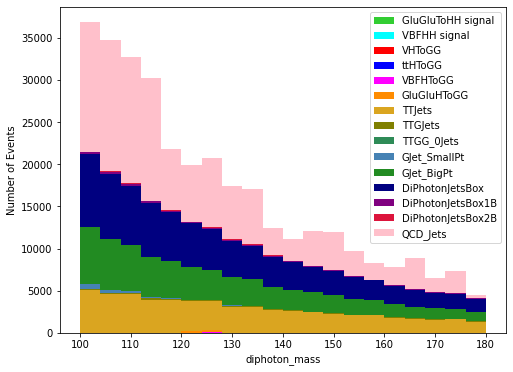

In [12]:
df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']

vals = []
genweights = []
for df in dfs_ggHH[3]:
    val = df.loc[:, b'diphoton_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
#data_vals = data_good_dfs[y].loc[:, plt_vars[x]].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=df_names, color = colors, weights = genweights, range = (100, 180))
#plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'{year[y]} data', range = ranges[x])
plt.xlabel('diphoton_mass')
plt.ylabel("Number of Events")
#plt.title(f'.decode("utf-8")}')
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(8, 6)
#plt.savefig(fname = f'Plots/Data_MC_Plots/{year[y]}/recon/{plt_vars[x].decode("utf-8")}_{year[y]}_recon.png', format='png', dpi = 100)
plt.show()
plt.close()

In [6]:
# Overlaid plots - group by background type -- recon == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
            b'subleading_pho_pt_over_dimass', b'subleading_bjet_pt_over_dimass', b'subleading_bjet_pt_over_dimass_corr',
           b'diphoton_pt_over_diphoton_mass', b'dibjet_pt_over_dibjet_mass', b'dibjet_pt_over_dibjet_mass_corr',
           b'rec_pho_bjet_min_dR', b'all_pho_bjet_min_dR', b'dphi_met_leading_bjet', b'dphi_met_subleading_bjet',
           b'MET_pt', b'MET_phi', b'MET_sumEt']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
         (0,1), (0, 1.5), (0, 1.5),
         (0,2), (0, 3), (0, 3),
         (0,4), (0,4), (-3.2, 3.2), (-3.2, 3.2),
         (0, 250), (-3.2, 3.2), (0, 4000)]

group = ['single H', 'tt+ jets', 'qcd jets']
group_names = ['single_H', 'tt+_jets', 'qcd_jets']

sig_names = ['GluGluToHH signal', 'VBFHH signal']
sing_H_names = ['VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG']
tt_names = ['TTJets', 'TTGJets', 'TTGG_0Jets']
qcd_names = [ 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B','QCD_Jets']
df_names = [sing_H_names, tt_names, qcd_names ]

sig_colors = ['limegreen', 'cyan']
sing_H_colors = [ 'red', 'orange', 'blue', 'magenta']
tt_colors = ['red', 'blue', 'magenta']
qcd_colors = ['red', 'orange', 'blue', 'purple', 'magenta', 'pink']
colors = [sing_H_colors, tt_colors, qcd_colors]

year = [2016, 2017, 2018, 'combine']

for y in range(len(year)):
    dfs_ori = dfs[y]

    sig_dfs = [dfs_ori[0], dfs_ori[1]]
    sing_H_dfs = [dfs_ori[2], dfs_ori[3], dfs_ori[4], dfs_ori[5]]
    tt_dfs = [dfs_ori[6], dfs_ori[7], dfs_ori[8]]
    qcd_dfs = [dfs_ori[9], dfs_ori[10], dfs_ori[11], dfs_ori[12], dfs_ori[13], dfs_ori[14]]
    dfs_group = [sing_H_dfs, tt_dfs, qcd_dfs]

    for g in range(len(group)):
        for x in range(len(plt_vars)):
            plt.figure()
            for i in range(len(dfs_group[g])):
                if g==0 and x==3:
                    plt.hist(dfs_group[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= (115, 135), density = True)
                else:
                    plt.hist(dfs_group[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= ranges[x], density = True)
            for j in range(len(sig_dfs)):
                if g==0 and x==3:
                    plt.hist(sig_dfs[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs[j][b'genweight'], label = f'combine {sig_names[j]}', range= (115, 135), density = True)
                else:
                    plt.hist(sig_dfs[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs[j][b'genweight'], label = f'combine {sig_names[j]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{group[g]} {year[y]} overlaid mc {plt_vars[x].decode("utf-8")}')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 6)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/recon/{group_names[g]}_{plt_vars[x].decode("utf-8")}_{year[y]}.png', format = 'png', dpi = 120)
            #plt.show()
            plt.close()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [7]:
# Overlaid plots - group by background type -- ggHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
            b'subleading_pho_pt_over_dimass', b'subleading_bjet_pt_over_dimass', b'subleading_bjet_pt_over_dimass_corr',
           b'diphoton_pt_over_diphoton_mass', b'dibjet_pt_over_dibjet_mass', b'dibjet_pt_over_dibjet_mass_corr',
           b'rec_pho_bjet_min_dR', b'all_pho_bjet_min_dR', b'dphi_met_leading_bjet', b'dphi_met_subleading_bjet',
           b'MET_pt', b'MET_phi', b'MET_sumEt']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
         (0,1), (0, 1.5), (0, 1.5),
         (0,2), (0, 3), (0, 3),
         (0,4), (0,4), (-3.2, 3.2), (-3.2, 3.2),
         (0, 250), (-3.2, 3.2), (0, 4000)]

group = ['single H', 'tt+ jets', 'qcd jets']
group_names = ['single_H', 'tt+_jets', 'qcd_jets']

sig_names = ['GluGluToHH signal', 'VBFHH signal']
sing_H_names = ['VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG']
tt_names = ['TTJets', 'TTGJets', 'TTGG_0Jets']
qcd_names = [ 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B','QCD_Jets']
df_names = [sing_H_names, tt_names, qcd_names ]

sig_colors = ['limegreen', 'cyan']
sing_H_colors = [ 'red', 'orange', 'blue', 'magenta']
tt_colors = ['red', 'blue', 'magenta']
qcd_colors = ['red', 'orange', 'blue', 'purple', 'magenta', 'pink']
colors = [sing_H_colors, tt_colors, qcd_colors]

year = [2016, 2017, 2018, 'combine']

for y in range(len(year)):
    dfs_ori = dfs_ggHH[y]

    sig_dfs = [dfs_ori[0], dfs_ori[1]]
    sing_H_dfs = [dfs_ori[2], dfs_ori[3], dfs_ori[4], dfs_ori[5]]
    tt_dfs = [dfs_ori[6], dfs_ori[7], dfs_ori[8]]
    qcd_dfs = [dfs_ori[9], dfs_ori[10], dfs_ori[11], dfs_ori[12], dfs_ori[13], dfs_ori[14]]
    dfs_group = [sing_H_dfs, tt_dfs, qcd_dfs]

    for g in range(len(group)):
        for x in range(len(plt_vars)):
            plt.figure()
            for i in range(len(dfs_group[g])):
                if g==0 and x==3:
                    plt.hist(dfs_group[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= (115, 135), density = True)
                else:
                    plt.hist(dfs_group[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= ranges[x], density = True)
            for j in range(len(sig_dfs)):
                if g==0 and x==3:
                    plt.hist(sig_dfs[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs[j][b'genweight'], label = f'combine {sig_names[j]}', range= (115, 135), density = True)
                else:
                    plt.hist(sig_dfs[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs[j][b'genweight'], label = f'combine {sig_names[j]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{group[g]} {year[y]} overlaid mc {plt_vars[x].decode("utf-8")} (ggHH; loose pho_id)')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 6)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/ggHH/{group_names[g]}_{plt_vars[x].decode("utf-8")}_{year[y]}_ggHH.png', format = 'png', dpi = 120)
            #plt.show()
            plt.close()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [8]:
# Overlaid plots  - group by background type -- VBFHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
              b'subleading_pho_pt_over_dimass', b'subleading_bjet_pt_over_dimass', b'subleading_bjet_pt_over_dimass_corr',
           b'diphoton_pt_over_diphoton_mass', b'dibjet_pt_over_dibjet_mass', b'dibjet_pt_over_dibjet_mass_corr',
           b'rec_pho_bjet_min_dR', b'all_pho_bjet_min_dR', b'dphi_met_leading_bjet', b'dphi_met_subleading_bjet',
           b'MET_pt', b'MET_phi', b'MET_sumEt',
            b'leading_vbfjet_pt', b'subleading_vbfjet_pt', b'divbfjet_pt', b'divbfjet_mass',
           b'leading_vbfjet_phi', b'leading_vbfjet_eta', b'subleading_vbfjet_phi', b'subleading_vbfjet_eta',
            b'divbfjet_eta', b'vbfjet_delR', b'vbfjet_del_eta',
           b'leading_vbfjet_pt_over_dimass', b'subleading_vbfjet_pt_over_dimass', b'divbfjet_pt_over_dimass']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
          (0,1), (0, 1.5), (0, 1.5),
         (0,2), (0, 3), (0, 3),
         (0,4), (0,4), (-3.2, 3.2), (-3.2, 3.2),
         (0, 250), (-3.2, 3.2), (0, 4000),
          (40, 300), (30, 200), (0, 300), (0, 550),
         (-3.2, 3.2), (-4.7, 4.7), (-3.2, 3.2), (-4.7, 4.7),
         (0, 4), (0, 8), (0,9),
         (0,2), (0, 1.5), (0,4)]

group = ['single H', 'tt+ jets', 'qcd jets']
group_names = ['single_H', 'tt+_jets', 'qcd_jets']

sig_names = ['GluGluToHH signal', 'VBFHH signal']
sing_H_names = ['VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG']
tt_names = ['TTJets', 'TTGJets', 'TTGG_0Jets']
qcd_names = [ 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B','QCD_Jets']
df_names = [sing_H_names, tt_names, qcd_names ]

sig_colors = ['limegreen', 'cyan']
sing_H_colors = [ 'red', 'orange', 'blue', 'magenta']
tt_colors = ['red', 'blue', 'magenta']
qcd_colors = ['red', 'orange', 'blue', 'purple', 'magenta', 'pink']
colors = [sing_H_colors, tt_colors, qcd_colors]

year = [2016, 2017, 2018, 'combine']

for y in range(len(year)):
    dfs_ori = dfs_VBFHH[y]

    sig_dfs = [dfs_ori[0], dfs_ori[1]]
    sing_H_dfs = [dfs_ori[2], dfs_ori[3], dfs_ori[4], dfs_ori[5]]
    tt_dfs = [dfs_ori[6], dfs_ori[7], dfs_ori[8]]
    qcd_dfs = [dfs_ori[9], dfs_ori[10], dfs_ori[11], dfs_ori[12], dfs_ori[13], dfs_ori[14]]
    dfs_group = [sing_H_dfs, tt_dfs, qcd_dfs]

    for g in range(len(group)):
        for x in range(len(plt_vars)):
            plt.figure()
            for i in range(len(dfs_group[g])):
                if g==0 and x==3:
                    plt.hist(dfs_group[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= (115, 135), density = True)
                else:
                    plt.hist(dfs_group[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= ranges[x], density = True)
            for j in range(len(sig_dfs)):
                if g==0 and x==3:
                    plt.hist(sig_dfs[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs[j][b'genweight'], label = f'combine {sig_names[j]}', range= (115, 135), density = True)
                else:
                    plt.hist(sig_dfs[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs[j][b'genweight'], label = f'combine {sig_names[j]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{group[g]} {year[y]} overlaid mc {plt_vars[x].decode("utf-8")} (VBFHH; loose pho_id)')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 6)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/VBFHH/{group_names[g]}_{plt_vars[x].decode("utf-8")}_{year[y]}_VBFHH.png', format = 'png', dpi = 120)
            #plt.show()
            plt.close()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib64/python3.6/site-packages

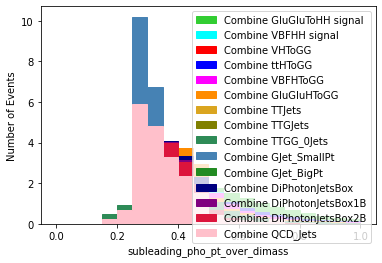

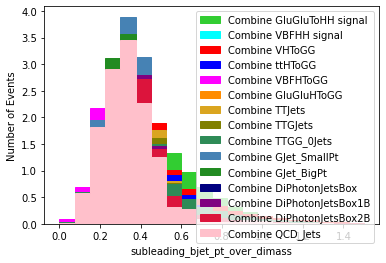

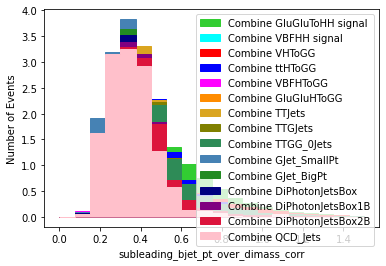

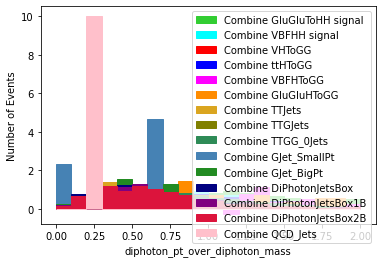

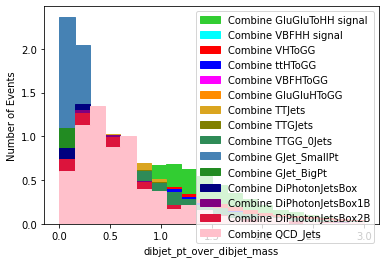

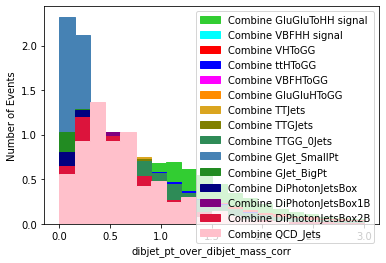

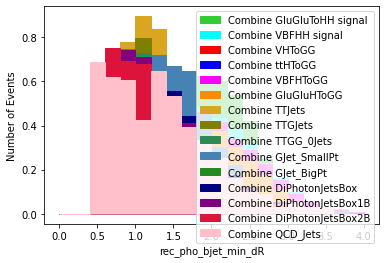

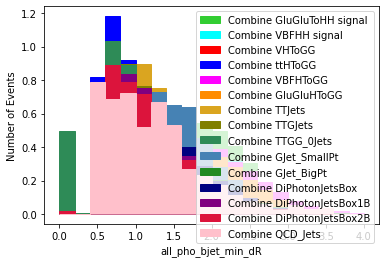

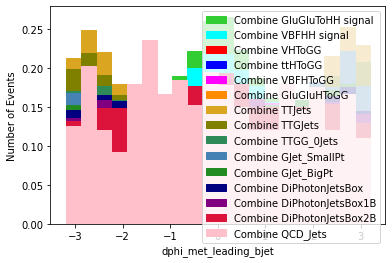

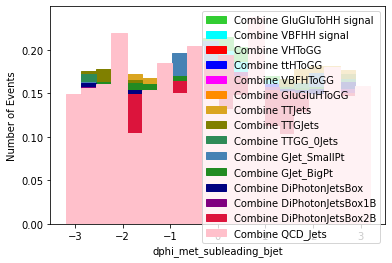

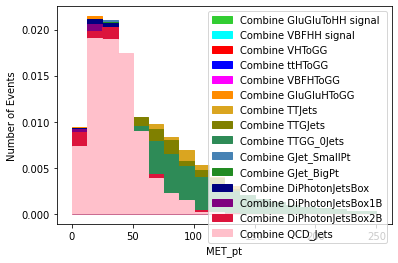

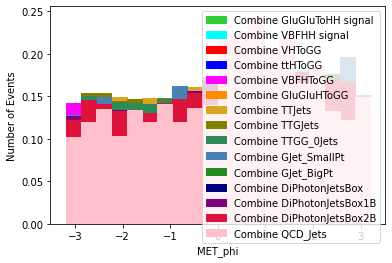

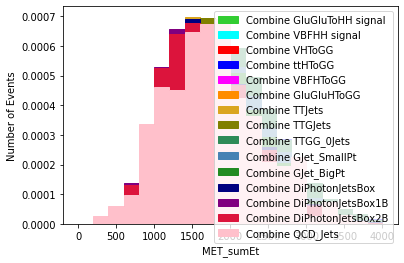

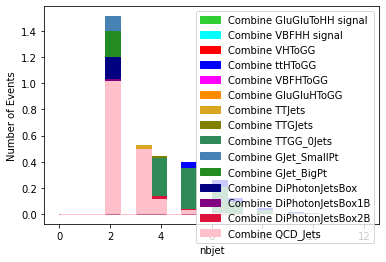

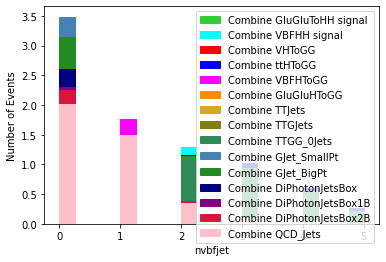

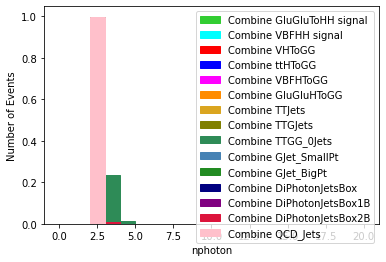

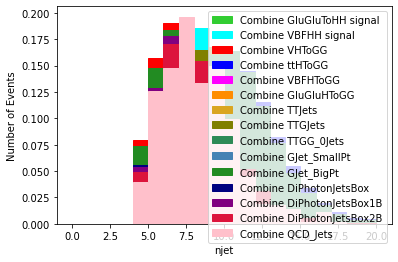

In [21]:
# look at newly added vars for range

plt_vars = [ b'subleading_pho_pt_over_dimass', b'subleading_bjet_pt_over_dimass', b'subleading_bjet_pt_over_dimass_corr',
           b'diphoton_pt_over_diphoton_mass', b'dibjet_pt_over_dibjet_mass', b'dibjet_pt_over_dibjet_mass_corr',
           b'rec_pho_bjet_min_dR', b'all_pho_bjet_min_dR', b'dphi_met_leading_bjet', b'dphi_met_subleading_bjet',
           b'MET_pt', b'MET_phi', b'MET_sumEt',
          b'nbjet', b'nvbfjet', b'nphoton', b'njet']

ranges = [(0,1), (0, 1.5), (0, 1.5),
         (0,2), (0, 3), (0, 3),
         (0,4), (0,4), (-3.2, 3.2), (-3.2, 3.2),
         (0, 250), (-3.2, 3.2), (0, 4000),
         (0, 12), (0, 5), (0, 20), (0, 20)]

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for x in range(len(plt_vars)):
    plt.figure()
    for i in range(len(dfs[3])):
            plt.hist(dfs[3][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', weights = dfs[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', fill=True, density=True, range = ranges[x])
    plt.xlabel(plt_vars[x].decode("utf-8"))
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/signal/pho_90/signal_90_{year[y]}_{plt_vars[x].decode("utf-8")}.png', format = 'png', dpi = 100)
    plt.show()
    plt.close()

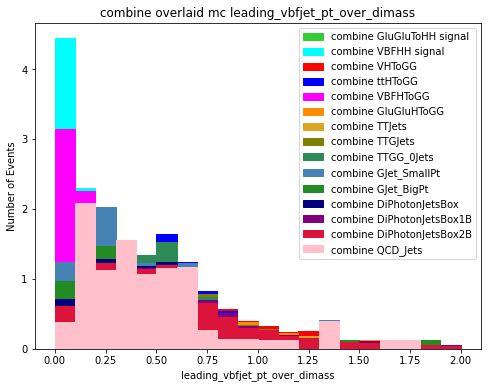

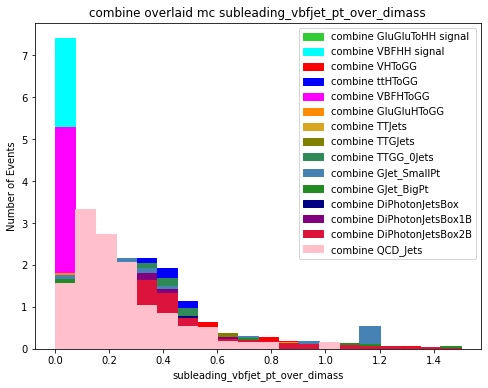

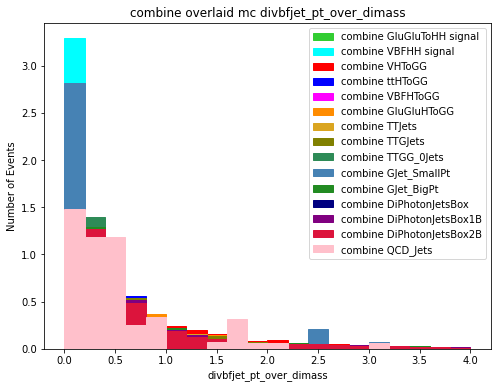

In [26]:
plt_vars = [b'leading_vbfjet_pt_over_dimass', b'subleading_vbfjet_pt_over_dimass', b'divbfjet_pt_over_dimass']

ranges = [(0,2), (0, 1.5), (0,4)]

year = ['combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for x in range(len(plt_vars)):
        plt.figure()
        for i in range(len(dfs_VBFHH[y])):
            plt.hist(dfs_VBFHH[y+3][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', weights = dfs_VBFHH[y+3][i][b'genweight'], label=f'{year[y]} {df_names[i]}', density=True, fill = True, range = ranges[x])
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.title(f'{year[y]} overlaid mc {plt_vars[x].decode("utf-8")}')
        plt.legend(loc='best')
        fig = plt.gcf()
        fig.set_size_inches(8, 6)
        #plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/recon(pho_90)/{year[y]}_rec_90_{plt_vars[x].decode("utf-8")}.png', format = 'png', dpi = 120)
        plt.show()
        plt.close()

In [13]:
plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(0, 225), (0, 125), (0, 250), (110, 140),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]


dfs_2018 = [GluGluToHH_df_2018_90[GluGluToHH_df_2018_90[b'ggHH_recon']==1], VBFHH_df_2018_90[VBFHH_df_2018_90[b'VBFHH_recon'] == 1]]

#dfs_2017 = [GluGluToHH_df_2017, VBFHH_df_2017]

#dfs_2016 = [GluGluToHH_df_2016, VBFHH_df_2016]

#dfs_combine = [GluGluToHH_df, VBFHH_df]

#dfs = [dfs_2016, dfs_2017, dfs_2018, dfs_combine]

dfs = [dfs_2018]

year = [2018]

df_names = ['GluGluToHH signal', 'VBFHH signal']

colors = ['limegreen', 'cyan']

scales = [1, 60]

for y in range(len(year)):
    for x in range(len(plt_vars)):
        plt.figure()
        for i in range(len(dfs[y])):
                plt.hist(dfs[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', weights = dfs[y][i][b'genweight'] * scales[i], label=f'{year[y]} {df_names[i]} * {scales[i]}', range= ranges[x])
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.legend(loc='best')
        plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/signal/pho_90/signal_90_{year[y]}_{plt_vars[x].decode("utf-8")}.png', format = 'png', dpi = 100)
        #plt.show()
        plt.close()

## Photon cut 90

In [28]:
# Overlaid plots - rec == 1 - pho == 90

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']

# scales = [49000, 1650000,
#          30, 1850, 2,
#          1400, 3900, 260, 3000, 
#          77, 2, 150, 44, 1.5, 1 ]

# scale_label = ['4.9 E04', '1.65 E06',
#               '30', '1.85 E03', '2',
#               '1.4 E03', '3.9 E03', '260', '3 E03',
#               '77', '2', '150', '44', '1.5', '1']

for y in range(len(year)):
    for x in range(len(plt_vars)):
        plt.figure()
        for i in range(len(dfs_90[y])):
            #plt.hist(dfs_90[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', weights = dfs_90[y][i][b'genweight'] * scales[i], label=f'{year[y]} {df_names[i]} * {scale_label[i]}', range= ranges[x])
            plt.hist(dfs_90[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', weights = dfs_90[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x], density = True)
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.title(f'{year[y]} overlaid mc {plt_vars[x].decode("utf-8")}')
        plt.legend(loc='best')
        fig = plt.gcf()
        fig.set_size_inches(8, 6)
        plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/recon(pho_90)/{year[y]}_rec_90_{plt_vars[x].decode("utf-8")}.png', format = 'png', dpi = 120)
        #plt.show()
        plt.close()

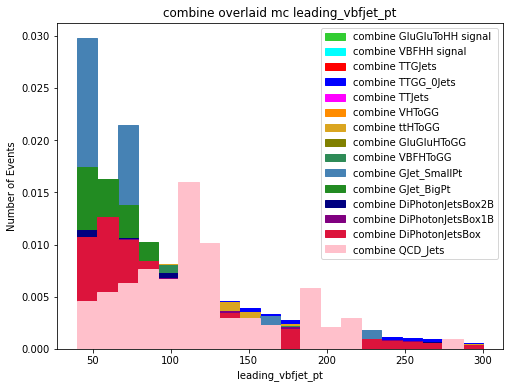

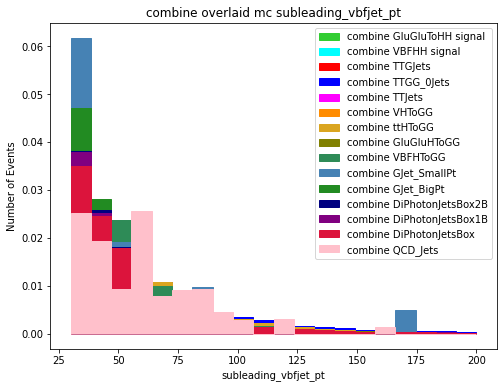

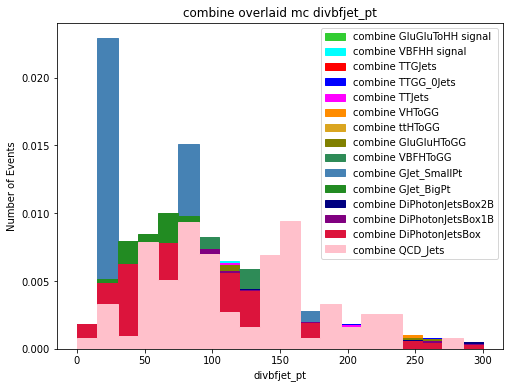

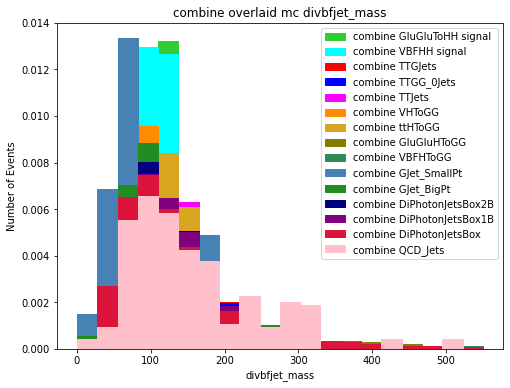

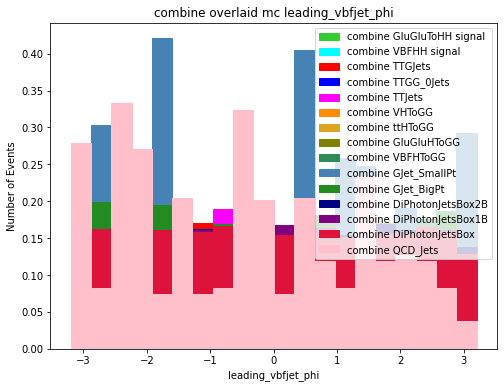

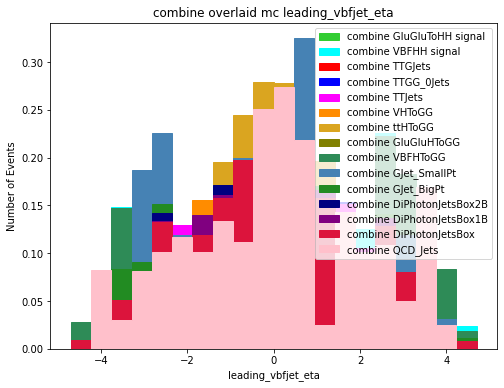

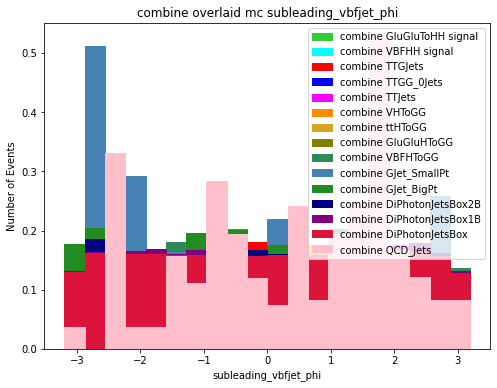

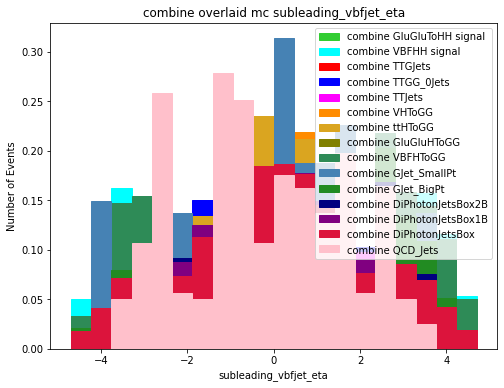

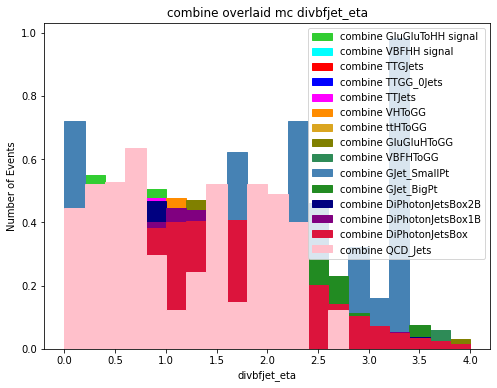

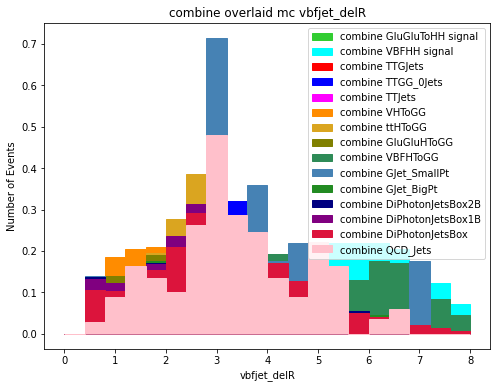

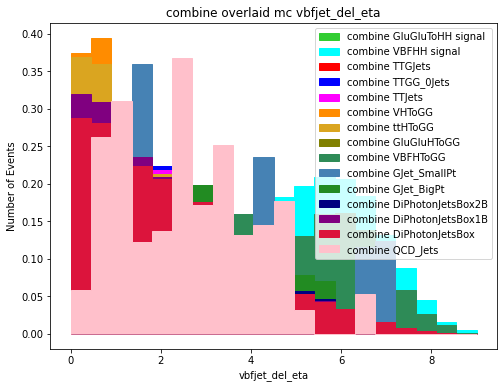

In [23]:
# Overlaid plots

plt_vars = [b'leading_vbfjet_pt', b'subleading_vbfjet_pt', b'divbfjet_pt', b'divbfjet_mass',
           b'leading_vbfjet_phi', b'leading_vbfjet_eta', b'subleading_vbfjet_phi', b'subleading_vbfjet_eta',
           b'divbfjet_eta', b'vbfjet_delR', b'vbfjet_del_eta']


year = ['combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']

ranges = [(40, 300), (30, 200), (0, 300), (0, 550),
         (-3.2, 3.2), (-4.7, 4.7), (-3.2, 3.2), (-4.7, 4.7),
         (0, 4), (0, 8), (0,9)]

for y in range(len(year)):
    for x in range(len(plt_vars)):
        plt.figure()
        for i in range(len(dfs_VBFHH_90[y])):
            plt.hist(dfs_VBFHH_90[y+3][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', weights = dfs_VBFHH_90[y+3][i][b'genweight'], label=f'{year[y]} {df_names[i]}', density=True, fill = True, range = ranges[x])
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.title(f'{year[y]} overlaid mc {plt_vars[x].decode("utf-8")}')
        plt.legend(loc='best')
        fig = plt.gcf()
        fig.set_size_inches(8, 6)
        #plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/recon(pho_90)/{year[y]}_rec_90_{plt_vars[x].decode("utf-8")}.png', format = 'png', dpi = 120)
        plt.show()
        plt.close()

In [34]:
# Overlaid plots - pho == 90 - group by background type -- recon == 1 -- combined years only

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

group = ['single H', 'tt+ jets', 'qcd jets']
group_names = ['single_H', 'tt+_jets', 'qcd_jets']

sig_names = ['GluGluToHH signal', 'VBFHH signal']
sing_H_names = ['VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG']
tt_names = ['TTJets', 'TTGJets', 'TTGG_0Jets']
qcd_names = [ 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B','QCD_Jets']
df_names = [sing_H_names, tt_names, qcd_names ]

sig_colors = ['limegreen', 'cyan']
sing_H_colors = [ 'red', 'orange', 'blue', 'magenta']
tt_colors = ['red', 'blue', 'magenta']
qcd_colors = ['red', 'orange', 'blue', 'purple', 'magenta', 'pink']
colors = [sing_H_colors, tt_colors, qcd_colors]

year = [2016, 2017, 2018, 'combine']

for y in range(len(year)):
    dfs_ori = dfs_90[y]

    sig_dfs_90 = [dfs_ori[0], dfs_ori[1]]
    sing_H_dfs_90 = [dfs_ori[2], dfs_ori[3], dfs_ori[4], dfs_ori[5]]
    tt_dfs_90 = [dfs_ori[6], dfs_ori[7], dfs_ori[8]]
    qcd_dfs_90 = [dfs_ori[9], dfs_ori[10], dfs_ori[11], dfs_ori[12], dfs_ori[13], dfs_ori[14]]
    dfs_group_90 = [sing_H_dfs_90, tt_dfs_90, qcd_dfs_90]

    for g in range(len(group)):
        for x in range(len(plt_vars)):
            plt.figure()
            for i in range(len(dfs_group_90[g])):
                if g==0 and x==3:
                    plt.hist(dfs_group_90[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_90[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= (115, 135), density = True)
                else:
                    plt.hist(dfs_group_90[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_90[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= ranges[x], density = True)
            for j in range(len(sig_dfs_90)):
                if g==0 and x==3:
                    plt.hist(sig_dfs_90[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_90[j][b'genweight'], label = f'combine {sig_names[j]}', range= (115, 135), density = True)
                else:
                    plt.hist(sig_dfs_90[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_90[j][b'genweight'], label = f'combine {sig_names[j]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{group[g]} {year[y]} overlaid mc {plt_vars[x].decode("utf-8")} (loose pho_id)')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 6)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/recon(pho_90)/{group_names[g]}_{plt_vars[x].decode("utf-8")}_{year[y]}_recon(pho_90).png', format = 'png', dpi = 120)
            #plt.show()
            plt.close()

In [35]:
# Overlaid plots - pho == 90 - group by background type -- ggHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

group = ['single H', 'tt+ jets', 'qcd jets']
group_names = ['single_H', 'tt+_jets', 'qcd_jets']

sig_names = ['GluGluToHH signal', 'VBFHH signal']
sing_H_names = ['VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG']
tt_names = ['TTJets', 'TTGJets', 'TTGG_0Jets']
qcd_names = [ 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B','QCD_Jets']
df_names = [sing_H_names, tt_names, qcd_names ]

sig_colors = ['limegreen', 'cyan']
sing_H_colors = [ 'red', 'orange', 'blue', 'magenta']
tt_colors = ['red', 'blue', 'magenta']
qcd_colors = ['red', 'orange', 'blue', 'purple', 'magenta', 'pink']
colors = [sing_H_colors, tt_colors, qcd_colors]

year = [2016, 2017, 2018, 'combine']

for y in range(len(year)):
    dfs_ori = dfs_ggHH_90[y]

    sig_dfs_90 = [dfs_ori[0], dfs_ori[1]]
    sing_H_dfs_90 = [dfs_ori[2], dfs_ori[3], dfs_ori[4], dfs_ori[5]]
    tt_dfs_90 = [dfs_ori[6], dfs_ori[7], dfs_ori[8]]
    qcd_dfs_90 = [dfs_ori[9], dfs_ori[10], dfs_ori[11], dfs_ori[12], dfs_ori[13], dfs_ori[14]]
    dfs_group_90 = [sing_H_dfs_90, tt_dfs_90, qcd_dfs_90]

    for g in range(len(group)):
        for x in range(len(plt_vars)):
            plt.figure()
            for i in range(len(dfs_group_90[g])):
                if g==0 and x==3:
                    plt.hist(dfs_group_90[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_90[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= (115, 135), density = True)
                else:
                    plt.hist(dfs_group_90[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_90[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= ranges[x], density = True)
            for j in range(len(sig_dfs_90)):
                if g==0 and x==3:
                    plt.hist(sig_dfs_90[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_90[j][b'genweight'], label = f'combine {sig_names[j]}', range= (115, 135), density = True)
                else:
                    plt.hist(sig_dfs_90[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_90[j][b'genweight'], label = f'combine {sig_names[j]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{group[g]} {year[y]} overlaid mc {plt_vars[x].decode("utf-8")} (ggHH; loose pho_id)')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 6)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/ggHH(pho_90)/{group_names[g]}_{plt_vars[x].decode("utf-8")}_{year[y]}_ggHH(pho_90).png', format = 'png', dpi = 120)
            #plt.show()
            plt.close()

In [13]:
# Overlaid plots - pho == 90 - group by background type -- VBFHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
            b'leading_vbfjet_pt', b'subleading_vbfjet_pt', b'divbfjet_pt', b'divbfjet_mass',
           b'leading_vbfjet_phi', b'leading_vbfjet_eta', b'subleading_vbfjet_phi', b'subleading_vbfjet_eta',
            b'divbfjet_eta', b'vbfjet_delR', b'vbfjet_del_eta']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
          (40, 300), (30, 200), (0, 300), (0, 550),
         (-3.2, 3.2), (-4.7, 4.7), (-3.2, 3.2), (-4.7, 4.7),
         (0, 4), (0, 8), (0,9)]

group = ['single H', 'tt+ jets', 'qcd jets']
group_names = ['single_H', 'tt+_jets', 'qcd_jets']

sig_names = ['GluGluToHH signal', 'VBFHH signal']
sing_H_names = ['VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG']
tt_names = ['TTJets', 'TTGJets', 'TTGG_0Jets']
qcd_names = [ 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B','QCD_Jets']
df_names = [sing_H_names, tt_names, qcd_names ]

sig_colors = ['limegreen', 'cyan']
sing_H_colors = [ 'red', 'orange', 'blue', 'magenta']
tt_colors = ['red', 'blue', 'magenta']
qcd_colors = ['red', 'orange', 'blue', 'purple', 'magenta', 'pink']
colors = [sing_H_colors, tt_colors, qcd_colors]

year = [2016, 2017, 2018, 'combine']

for y in range(len(year)):
    dfs_ori = dfs_VBFHH_90[y]

    sig_dfs_90 = [dfs_ori[0], dfs_ori[1]]
    sing_H_dfs_90 = [dfs_ori[2], dfs_ori[3], dfs_ori[4], dfs_ori[5]]
    tt_dfs_90 = [dfs_ori[6], dfs_ori[7], dfs_ori[8]]
    qcd_dfs_90 = [dfs_ori[9], dfs_ori[10], dfs_ori[11], dfs_ori[12], dfs_ori[13], dfs_ori[14]]
    dfs_group_90 = [sing_H_dfs_90, tt_dfs_90, qcd_dfs_90]

    for g in range(len(group)):
        for x in range(len(plt_vars)):
            plt.figure()
            for i in range(len(dfs_group_90[g])):
                if g==0 and x==3:
                    plt.hist(dfs_group_90[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_90[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= (115, 135), density = True)
                else:
                    plt.hist(dfs_group_90[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_90[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= ranges[x], density = True)
            for j in range(len(sig_dfs_90)):
                if g==0 and x==3:
                    plt.hist(sig_dfs_90[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_90[j][b'genweight'], label = f'combine {sig_names[j]}', range= (115, 135), density = True)
                else:
                    plt.hist(sig_dfs_90[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_90[j][b'genweight'], label = f'combine {sig_names[j]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{group[g]} {year[y]} overlaid mc {plt_vars[x].decode("utf-8")} (VBFHH; loose pho_id)')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 6)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/VBFHH(pho_90)/{group_names[g]}_{plt_vars[x].decode("utf-8")}_{year[y]}_VBFHH(pho_90).png', format = 'png', dpi = 120)
            #plt.show()
            plt.close()

## Photon cut 80

In [39]:
# Overlaid plots - pho == 80 - group by background type -- recon == 1 -- combined years only

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

group = ['single H', 'tt+ jets', 'qcd jets']
group_names = ['single_H', 'tt+_jets', 'qcd_jets']

sig_names = ['GluGluToHH signal', 'VBFHH signal']
sing_H_names = ['VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG']
tt_names = ['TTJets', 'TTGJets', 'TTGG_0Jets']
qcd_names = [ 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B','QCD_Jets']
df_names = [sing_H_names, tt_names, qcd_names ]

sig_colors = ['limegreen', 'cyan']
sing_H_colors = [ 'red', 'orange', 'blue', 'magenta']
tt_colors = ['red', 'blue', 'magenta']
qcd_colors = ['red', 'orange', 'blue', 'purple', 'magenta', 'pink']
colors = [sing_H_colors, tt_colors, qcd_colors]

year = [2016, 2017, 2018, 'combine']

for y in range(len(year)):
    dfs_ori = dfs_80[y]

    sig_dfs_80 = [dfs_ori[0], dfs_ori[1]]
    sing_H_dfs_80 = [dfs_ori[2], dfs_ori[3], dfs_ori[4], dfs_ori[5]]
    tt_dfs_80 = [dfs_ori[6], dfs_ori[7], dfs_ori[8]]
    qcd_dfs_80 = [dfs_ori[9], dfs_ori[10], dfs_ori[11], dfs_ori[12], dfs_ori[13], dfs_ori[14]]
    dfs_group_80 = [sing_H_dfs_80, tt_dfs_80, qcd_dfs_80]

    for g in range(len(group)):
        for x in range(len(plt_vars)):
            plt.figure()
            for i in range(len(dfs_group_80[g])):
                if g==0 and x==3:
                    plt.hist(dfs_group_80[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_80[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= (115, 135), density = True)
                else:
                    plt.hist(dfs_group_80[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_80[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= ranges[x], density = True)
            for j in range(len(sig_dfs_80)):
                if g==0 and x==3:
                    plt.hist(sig_dfs_80[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_80[j][b'genweight'], label = f'combine {sig_names[j]}', range= (115, 135), density = True)
                else:
                    plt.hist(sig_dfs_80[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_80[j][b'genweight'], label = f'combine {sig_names[j]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{group[g]} {year[y]} overlaid mc {plt_vars[x].decode("utf-8")} (tight pho_id)')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 6)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/recon(pho_80)/{group_names[g]}_{plt_vars[x].decode("utf-8")}_{year[y]}_recon(pho_80).png', format = 'png', dpi = 120)
            #plt.show()
            plt.close()

In [40]:
# Overlaid plots - pho == 80 - group by background type -- ggHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

group = ['single H', 'tt+ jets', 'qcd jets']
group_names = ['single_H', 'tt+_jets', 'qcd_jets']

sig_names = ['GluGluToHH signal', 'VBFHH signal']
sing_H_names = ['VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG']
tt_names = ['TTJets', 'TTGJets', 'TTGG_0Jets']
qcd_names = [ 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B','QCD_Jets']
df_names = [sing_H_names, tt_names, qcd_names ]

sig_colors = ['limegreen', 'cyan']
sing_H_colors = [ 'red', 'orange', 'blue', 'magenta']
tt_colors = ['red', 'blue', 'magenta']
qcd_colors = ['red', 'orange', 'blue', 'purple', 'magenta', 'pink']
colors = [sing_H_colors, tt_colors, qcd_colors]

year = [2016, 2017, 2018, 'combine']

for y in range(len(year)):
    dfs_ori = dfs_ggHH_80[y]

    sig_dfs_80 = [dfs_ori[0], dfs_ori[1]]
    sing_H_dfs_80 = [dfs_ori[2], dfs_ori[3], dfs_ori[4], dfs_ori[5]]
    tt_dfs_80 = [dfs_ori[6], dfs_ori[7], dfs_ori[8]]
    qcd_dfs_80 = [dfs_ori[9], dfs_ori[10], dfs_ori[11], dfs_ori[12], dfs_ori[13], dfs_ori[14]]
    dfs_group_80 = [sing_H_dfs_80, tt_dfs_80, qcd_dfs_80]

    for g in range(len(group)):
        for x in range(len(plt_vars)):
            plt.figure()
            for i in range(len(dfs_group_80[g])):
                if g==0 and x==3:
                    plt.hist(dfs_group_80[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_80[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= (115, 135), density = True)
                else:
                    plt.hist(dfs_group_80[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_80[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= ranges[x], density = True)
            for j in range(len(sig_dfs_80)):
                if g==0 and x==3:
                    plt.hist(sig_dfs_80[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_80[j][b'genweight'], label = f'combine {sig_names[j]}', range= (115, 135), density = True)
                else:
                    plt.hist(sig_dfs_80[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_80[j][b'genweight'], label = f'combine {sig_names[j]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{group[g]} {year[y]} overlaid mc {plt_vars[x].decode("utf-8")} (ggHH; tight pho_id)')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 6)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/ggHH(pho_80)/{group_names[g]}_{plt_vars[x].decode("utf-8")}_{year[y]}_ggHH(pho_80).png', format = 'png', dpi = 120)
            #plt.show()
            plt.close()

In [14]:
# Overlaid plots - pho == 80 - group by background type -- VBFHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
            b'leading_vbfjet_pt', b'subleading_vbfjet_pt', b'divbfjet_pt', b'divbfjet_mass',
           b'leading_vbfjet_phi', b'leading_vbfjet_eta', b'subleading_vbfjet_phi', b'subleading_vbfjet_eta',
             b'divbfjet_eta', b'vbfjet_delR', b'vbfjet_del_eta']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
          (40, 300), (30, 200), (0, 300), (0, 550),
         (-3.2, 3.2), (-4.7, 4.7), (-3.2, 3.2), (-4.7, 4.7),
         (0, 4), (0, 8), (0,9)]

group = ['single H', 'tt+ jets', 'qcd jets']
group_names = ['single_H', 'tt+_jets', 'qcd_jets']

sig_names = ['GluGluToHH signal', 'VBFHH signal']
sing_H_names = ['VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG']
tt_names = ['TTJets', 'TTGJets', 'TTGG_0Jets']
qcd_names = [ 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B','QCD_Jets']
df_names = [sing_H_names, tt_names, qcd_names ]

sig_colors = ['limegreen', 'cyan']
sing_H_colors = [ 'red', 'orange', 'blue', 'magenta']
tt_colors = ['red', 'blue', 'magenta']
qcd_colors = ['red', 'orange', 'blue', 'purple', 'magenta', 'pink']
colors = [sing_H_colors, tt_colors, qcd_colors]

year = [2016, 2017, 2018, 'combine']

for y in range(len(year)):
    dfs_ori = dfs_VBFHH_80[y]

    sig_dfs_80 = [dfs_ori[0], dfs_ori[1]]
    sing_H_dfs_80 = [dfs_ori[2], dfs_ori[3], dfs_ori[4], dfs_ori[5]]
    tt_dfs_80 = [dfs_ori[6], dfs_ori[7], dfs_ori[8]]
    qcd_dfs_80 = [dfs_ori[9], dfs_ori[10], dfs_ori[11], dfs_ori[12], dfs_ori[13], dfs_ori[14]]
    dfs_group_80 = [sing_H_dfs_80, tt_dfs_80, qcd_dfs_80]

    for g in range(len(group)):
        for x in range(len(plt_vars)):
            plt.figure()
            for i in range(len(dfs_group_80[g])):
                if g==0 and x==3:
                    plt.hist(dfs_group_80[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_80[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= (115, 135), density = True)
                else:
                    plt.hist(dfs_group_80[g][i][plt_vars[x]], color=colors[g][i], bins=20, histtype='step', weights = dfs_group_80[g][i][b'genweight'], label=f'combine {df_names[g][i]}', range= ranges[x], density = True)
            for j in range(len(sig_dfs_80)):
                if g==0 and x==3:
                    plt.hist(sig_dfs_80[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_80[j][b'genweight'], label = f'combine {sig_names[j]}', range= (115, 135), density = True)
                else:
                    plt.hist(sig_dfs_80[j][plt_vars[x]], color=sig_colors[j], bins=20, histtype='step', weights=sig_dfs_80[j][b'genweight'], label = f'combine {sig_names[j]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{group[g]} {year[y]} overlaid mc {plt_vars[x].decode("utf-8")} (VBFHH; tight pho_id)')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 6)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/overlaid/{year[y]}/VBFHH(pho_80)/{group_names[g]}_{plt_vars[x].decode("utf-8")}_{year[y]}_VBFHH(pho_80).png', format = 'png', dpi = 120)
            #plt.show()
            plt.close()

## Individual Plots

In [6]:
# Individual plots - recon == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
            b'subleading_pho_pt_over_dimass', b'subleading_bjet_pt_over_dimass', b'subleading_bjet_pt_over_dimass_corr',
           b'diphoton_pt_over_diphoton_mass', b'dibjet_pt_over_dibjet_mass', b'dibjet_pt_over_dibjet_mass_corr',
           b'rec_pho_bjet_min_dR', b'all_pho_bjet_min_dR', b'dphi_met_leading_bjet', b'dphi_met_subleading_bjet',
           b'MET_pt', b'MET_phi', b'MET_sumEt']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
         (0,1), (0, 1.5), (0, 1.5),
         (0,2), (0, 3), (0, 3),
         (0,4), (0,4), (-3.2, 3.2), (-3.2, 3.2),
         (0, 250), (-3.2, 3.2), (0, 4000)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]


colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for i in range(len(dfs[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', fill = True, weights = dfs[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x])
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} (loose pho_id)')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/recon/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_recon.png', format = 'png')
            #plt.show()
            plt.close()

In [7]:
# Individual plots - ggHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
            b'subleading_pho_pt_over_dimass', b'subleading_bjet_pt_over_dimass', b'subleading_bjet_pt_over_dimass_corr',
           b'diphoton_pt_over_diphoton_mass', b'dibjet_pt_over_dibjet_mass', b'dibjet_pt_over_dibjet_mass_corr',
           b'rec_pho_bjet_min_dR', b'all_pho_bjet_min_dR', b'dphi_met_leading_bjet', b'dphi_met_subleading_bjet',
           b'MET_pt', b'MET_phi', b'MET_sumEt']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
         (0,1), (0, 1.5), (0, 1.5),
         (0,2), (0, 3), (0, 3),
         (0,4), (0,4), (-3.2, 3.2), (-3.2, 3.2),
         (0, 250), (-3.2, 3.2), (0, 4000)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for i in range(len(dfs_ggHH[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_ggHH[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', fill = True, weights = dfs_ggHH[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x])
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} (ggHH; loose pho_id)')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/ggHH/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_ggHH.png', format = 'png')
            #plt.show()
            plt.close()

In [8]:
# Individual plots - VBFHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
              b'subleading_pho_pt_over_dimass', b'subleading_bjet_pt_over_dimass', b'subleading_bjet_pt_over_dimass_corr',
           b'diphoton_pt_over_diphoton_mass', b'dibjet_pt_over_dibjet_mass', b'dibjet_pt_over_dibjet_mass_corr',
           b'rec_pho_bjet_min_dR', b'all_pho_bjet_min_dR', b'dphi_met_leading_bjet', b'dphi_met_subleading_bjet',
           b'MET_pt', b'MET_phi', b'MET_sumEt',
            b'leading_vbfjet_pt', b'subleading_vbfjet_pt', b'divbfjet_pt', b'divbfjet_mass',
           b'leading_vbfjet_phi', b'leading_vbfjet_eta', b'subleading_vbfjet_phi', b'subleading_vbfjet_eta',
            b'divbfjet_eta', b'vbfjet_delR', b'vbfjet_del_eta',
           b'leading_vbfjet_pt_over_dimass', b'subleading_vbfjet_pt_over_dimass', b'divbfjet_pt_over_dimass']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
          (0,1), (0, 1.5), (0, 1.5),
         (0,2), (0, 3), (0, 3),
         (0,4), (0,4), (-3.2, 3.2), (-3.2, 3.2),
         (0, 250), (-3.2, 3.2), (0, 4000),
          (40, 300), (30, 200), (0, 300), (0, 550),
         (-3.2, 3.2), (-4.7, 4.7), (-3.2, 3.2), (-4.7, 4.7),
         (0, 4), (0, 8), (0,9),
         (0,2), (0, 1.5), (0,4)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for i in range(len(dfs_VBFHH[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_VBFHH[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', fill = True, weights = dfs_VBFHH[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x])
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} (VBFHH; loose pho_id)')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/VBFHH/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_VBFHH.png', format = 'png')
            #plt.show()
            plt.close()

### Photon cut 90

In [42]:
# Individual plots - recon == 1, pho == 90

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]


colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for i in range(len(dfs_90[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_90[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', fill = True, weights = dfs_90[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x])
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} (loose pho_id)')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/recon(pho_90)/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_recon(pho_90).png', format = 'png')
            #plt.show()
            plt.close()

In [43]:
# Individual plots - ggHH == 1, pho == 90

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (-2, 1), (-2, 1), (-4, 2)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for i in range(len(dfs_ggHH_90[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_ggHH_90[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', fill = True, weights = dfs_ggHH_90[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x])
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} (ggHH; loose pho_id)')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/ggHH(pho_90)/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_ggHH(pho_90).png', format = 'png')
            #plt.show()
            plt.close()

In [15]:
# Individual plots - VBFHH == 1, pho == 90

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
            b'leading_vbfjet_pt', b'subleading_vbfjet_pt', b'divbfjet_pt', b'divbfjet_mass',
           b'leading_vbfjet_phi', b'leading_vbfjet_eta', b'subleading_vbfjet_phi', b'subleading_vbfjet_eta',
             b'divbfjet_eta', b'vbfjet_delR', b'vbfjet_del_eta']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
          (40, 300), (30, 200), (0, 300), (0, 550),
         (-3.2, 3.2), (-4.7, 4.7), (-3.2, 3.2), (-4.7, 4.7),
         (0, 4), (0, 8), (0,9)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for i in range(len(dfs_VBFHH_90[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_VBFHH_90[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', fill = True, weights = dfs_VBFHH_90[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x])
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} (VBFHH; loose pho_id)')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/VBFHH(pho_90)/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_VBFHH(pho_90).png', format = 'png')
            #plt.show()
            plt.close()

### Photon cut 80

In [45]:
# Individual plots - recon == 1, pho == 80

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta',  'darkorange',
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for i in range(len(dfs_80[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_80[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', fill = True, weights = dfs_80[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x])
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} (tight pho_id) ')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/recon(pho_80)/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_recon(pho_80).png', format = 'png')
            #plt.show()
            plt.close()

In [46]:
# Individual plots - ggHH == 1, pho == 80

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for i in range(len(dfs_ggHH_80[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_ggHH_80[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', fill = True, weights = dfs_ggHH_80[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x])
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} (ggHH; tight pho_id) ')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/ggHH(pho_80)/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_ggHH(pho_80).png', format = 'png')
            #plt.show()
            plt.close()

In [16]:
# Individual plots - VBFHH == 1, pho == 80

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
            b'leading_vbfjet_pt', b'subleading_vbfjet_pt', b'divbfjet_pt', b'divbfjet_mass',
           b'leading_vbfjet_phi', b'leading_vbfjet_eta', b'subleading_vbfjet_phi', b'subleading_vbfjet_eta',
           b'divbfjet_eta', b'vbfjet_delR', b'vbfjet_del_eta']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
          (40, 300), (30, 200), (0, 300), (0, 550),
         (-3.2, 3.2), (-4.7, 4.7), (-3.2, 3.2), (-4.7, 4.7),
         (0, 4), (0, 8), (0,9)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

colors = ['limegreen', 'cyan',
         'red', 'blue', 'magenta', 'darkorange', 
          'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson', 'pink']


for y in range(len(year)):
    for i in range(len(dfs_VBFHH_80[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_VBFHH_80[y][i][plt_vars[x]], color=colors[i], bins=20, histtype='step', fill = True, weights = dfs_VBFHH_80[y][i][b'genweight'], label=f'{year[y]} {df_names[i]}', range= ranges[x])
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} (VBFHH; tight pho_id)')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/VBFHH(pho_80)/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_VBFHH(pho_80).png', format = 'png')
            #plt.show()
            plt.close()

## Comparison 

In [17]:
# Pho 90 v. Pho 80 -- recon == 1
plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]


for y in range(len(year)):
    for i in range(len(dfs_80[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_80[y][i][plt_vars[x]], color='blue', bins=20, histtype='step', weights = dfs_80[y][i][b'genweight'], label=f'pho_id 80 {year[y]} {df_names[i]}', range= ranges[x], density=True)
            plt.hist(dfs_90[y][i][plt_vars[x]], color='orange', bins=20, histtype='step', weights = dfs_90[y][i][b'genweight'], label=f'pho_id 90 {year[y]} {df_names[i]}', range= ranges[x], density=True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} photon ID comparison')
            plt.legend(loc='best')
            fig = plt.gcf()
            fig.set_size_inches(8, 7)
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/recon(pho_90_v_pho_80)/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_recon(pho_80v90).png', format = 'png')
            #plt.show()
            plt.close()

In [18]:
# Pho 90 v Pho 80 -- ggHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(25, 225), (25, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH signal', 'VBFHH signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

for y in range(len(year)):
    for i in range(len(dfs_ggHH_80[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_ggHH_80[y][i][plt_vars[x]], color='blue', bins=20, histtype='step', weights = dfs_ggHH_80[y][i][b'genweight'], label=f'pho_id 80 {year[y]} {df_names[i]}', range= ranges[x], density = True)
            plt.hist(dfs_ggHH_90[y][i][plt_vars[x]], color='orange', bins=20, histtype='step', weights = dfs_ggHH_90[y][i][b'genweight'], label=f'pho_id 90 {year[y]} {df_names[i]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} photon ID comparison (ggHH) ')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/ggHH(pho_90_v_pho_80)/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_ggHH(pho_80v90).png', format = 'png')
            #plt.show()
            plt.close()

In [20]:
# Pho 90 vs Pho 80 - VBFHH == 1

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore',
            b'leading_vbfjet_pt', b'subleading_vbfjet_pt', b'divbfjet_pt', b'divbfjet_mass',
           b'leading_vbfjet_phi', b'leading_vbfjet_eta', b'subleading_vbfjet_phi', b'subleading_vbfjet_eta',
          b'divbfjet_eta', b'vbfjet_delR', b'vbfjet_del_eta' ]

ranges = [(25, 225), (0, 125), (0, 250), (100, 180),
         (25, 225), (25, 125), (0, 250), (20, 250),
         (25, 225), (25, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2),
          (40, 300), (30, 200), (0, 300), (0, 550),
         (-3.2, 3.2), (-4.7, 4.7), (-3.2, 3.2), (-4.7, 4.7),
         (0, 4), (0, 8), (0,9)]

year = [2016, 2017, 2018, 'combine']

df_names = ['GluGluToHH_signal', 'VBFHH_signal',
            'VHToGG', 'ttHToGG', 'VBFHToGG', 'GluGluHToGG', 
           'TTJets', 'TTGJets', 'TTGG_0Jets',  
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox2B', 'QCD_Jets' ]

for y in range(len(year)):
    for i in range(len(dfs_VBFHH_80[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs_VBFHH_80[y][i][plt_vars[x]], color='blue', bins=20, histtype='step', weights = dfs_VBFHH_80[y][i][b'genweight'], label=f'pho_id 80 {year[y]} {df_names[i]}', range= ranges[x], density = True)
            plt.hist(dfs_VBFHH_90[y][i][plt_vars[x]], color='orange', bins=20, histtype='step', weights = dfs_VBFHH_90[y][i][b'genweight'], label=f'pho_id 90 {year[y]} {df_names[i]}', range= ranges[x], density = True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'{year[y]} {df_names[i]} {plt_vars[x].decode("utf-8")} photon ID comparison (VBFHH)')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/VBFHH(pho_90_v_pho_80)/{df_names[i]}_{plt_vars[x].decode("utf-8")}_{year[y]}_VBFHH(pho_80v90).png', format = 'png')
            #plt.show()
            plt.close()

In [19]:
os.listdir('Plots/MC_Vars_Plots/2016')

['ggHH(pho_80)',
 'ggHH(pho_90_v_pho_80)',
 'VBFHH(pho_80)',
 'VBFHH(pho_90)',
 'ggHH(pho_90)',
 'recon(pho_80)',
 'VBFHH(pho_90_v_pho_80)',
 'recon(pho_90_v_pho_80)',
 'recon(pho_90)',
 'full_wind_dipho_mass',
 '.ipynb_checkpoints']

# OLD STUFF

In [4]:
# Integrated weight - 2018
dfs_2018 = [TTGJets_df_2018, TTGG_0Jets_df_2018, TTJets_df_2018, 
            GluGluToHH_df_2018, VHToGG_df_2018, ttHToGG_df_2018, GluGluHToGG_df_2018, VBFHToGG_df_2018, 
            GJet_SmallPt_df_2018, GJet_BigPt_df_2018, DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox1B_df_2018, DiPhotonJetsBox_df_2018]
df_names = ['TTGJets', 'TTGG_0Jets', 'TTJets', 
            'GluGluToHH signal', 'VHToGG', 'ttHToGG', 'GluGluHToGG', 'VBFHToGG', 
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox' ]
colors = ['red', 'blue', 'magenta', 
          'salmon', 'darkorange', 'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson']
print('2018 Samples')
for i in range(len(dfs_2018)):
    print(df_names[i])
    total = np.sum(dfs_2018[i].loc[:, b'genweight'].values)
    print(f'Total: {total}')
    rec = np.sum(dfs_2018[i].loc[:, b'recon'].values * dfs_2018[i].loc[:, b'genweight'].values)
    print(f'Overall recon: {rec}')
    brec = np.sum(dfs_2018[i].loc[:, b'bjet_recon'].values * dfs_2018[i].loc[:, b'genweight'].values)
    print(f'Bjet recon: {brec}')
    prec = np.sum(dfs_2018[i].loc[:, b'photon_recon'].values * dfs_2018[i].loc[:, b'genweight'].values)
    print(f'Photon recon: {prec}')
    print('\n')

2018 Samples
TTGJets
Total: 243864.296875
Overall recon: 1904.845947265625
Bjet recon: 4279.5556640625
Photon recon: 3457.89892578125


TTGG_0Jets
Total: 1008.8260498046875
Overall recon: 31.212722778320312
Bjet recon: 73.77827453613281
Photon recon: 60.985435485839844


TTJets
Total: 49739260.0
Overall recon: 3423172.25
Bjet recon: 7638770.5
Photon recon: 7238152.0


GluGluToHH signal
Total: 3.2811477184295654
Overall recon: 1.1894625425338745
Bjet recon: 1.466750144958496
Photon recon: 1.9609299898147583


VHToGG
Total: 182.01226806640625
Overall recon: 41.94609451293945
Bjet recon: 52.701725006103516
Photon recon: 116.31450653076172


ttHToGG
Total: 50.7001838684082
Overall recon: 14.793451309204102
Bjet recon: 18.866140365600586
Photon recon: 25.774147033691406


GluGluHToGG
Total: 4135.298828125
Overall recon: 242.08419799804688
Bjet recon: 427.1902770996094
Photon recon: 2880.845458984375


VBFHToGG
Total: 329.7085266113281
Overall recon: 16.524076461791992
Bjet recon: 31.2843666

In [53]:
# Integrated weight - 2017
dfs_2017 = [TTGJets_df_2017, TTGG_0Jets_df_2017, TTJets_df_2017, 
            GluGluToHH_df_2017, VHToGG_df_2017, ttHToGG_df_2017, GluGluHToGG_df_2017, VBFHToGG_df_2017, 
            GJet_SmallPt_df_2017, GJet_BigPt_df_2017, DiPhotonJetsBox2B_df_2017, DiPhotonJetsBox1B_df_2017, DiPhotonJetsBox_df_2017]
df_names = ['TTGJets', 'TTGG_0Jets', 'TTJets', 
            'GluGluToHH signal', 'VHToGG', 'ttHToGG', 'GluGluHToGG', 'VBFHToGG', 
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox' ]
colors = ['red', 'blue', 'magenta', 
          'salmon', 'darkorange', 'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson']
print('2017 Samples')
for i in range(len(dfs_2017)):
    print(df_names[i])
    total = np.sum(dfs_2017[i].loc[:, b'genweight'].values)
    print(f'Total: {total}')
    rec = np.sum(dfs_2017[i].loc[:, b'recon'].values * dfs_2017[i].loc[:, b'genweight'].values)
    print(f'Overall recon: {rec}')
    brec = np.sum(dfs_2017[i].loc[:, b'bjet_recon'].values * dfs_2017[i].loc[:, b'genweight'].values)
    print(f'Bjet recon: {brec}')
    prec = np.sum(dfs_2017[i].loc[:, b'photon_recon'].values * dfs_2017[i].loc[:, b'genweight'].values)
    print(f'Photon recon: {prec}')
    print('\n')

2017 Samples
TTGJets
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


TTGG_0Jets
Total: 1496000.0
Overall recon: 45899.0
Bjet recon: 108504.0
Photon recon: 89554.0


TTJets
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


GluGluToHH signal
Total: 200000.0
Overall recon: 47977.0
Bjet recon: 59028.0
Photon recon: 78912.0


VHToGG
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


ttHToGG
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


GluGluHToGG
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


VBFHToGG
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


GJet_SmallPt
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


GJet_BigPt
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


DiPhotonJetsBox2B
Total: 311463.0
Overall recon: 13243.0
Bjet recon: 32540.0
Photon recon: 31414.0


DiPhotonJetsBox1B
Total: 622473.0
Overall recon: 25221.0
Bjet recon: 61057.0
Photon re

In [56]:
# Integrated weight - 2016
dfs_2016 = [TTGJets_df_2016, TTGG_0Jets_df_2016, TTJets_df_2016, 
            GluGluToHH_df_2016, VHToGG_df_2016, ttHToGG_df_2016, GluGluHToGG_df_2016, VBFHToGG_df_2016, 
            GJet_SmallPt_df_2016, GJet_BigPt_df_2016, DiPhotonJetsBox2B_df_2016, DiPhotonJetsBox1B_df_2016, DiPhotonJetsBox_df_2016]
df_names = ['TTGJets', 'TTGG_0Jets', 'TTJets', 
            'GluGluToHH signal', 'VHToGG', 'ttHToGG', 'GluGluHToGG', 'VBFHToGG', 
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox' ]
colors = ['red', 'blue', 'magenta', 
          'salmon', 'darkorange', 'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson']
print('2016 Samples')
for i in range(len(dfs_2016)):
    print(df_names[i])
    total = np.sum(dfs_2016[i].loc[:, b'genweight'].values)
    print(f'Total: {total}')
    rec = np.sum(dfs_2016[i].loc[:, b'recon'].values * dfs_2016[i].loc[:, b'genweight'].values)
    print(f'Overall recon: {rec}')
    brec = np.sum(dfs_2016[i].loc[:, b'bjet_recon'].values * dfs_2016[i].loc[:, b'genweight'].values)
    print(f'Bjet recon: {brec}')
    prec = np.sum(dfs_2016[i].loc[:, b'photon_recon'].values * dfs_2016[i].loc[:, b'genweight'].values)
    print(f'Photon recon: {prec}')
    print('\n')

2016 Samples
TTGJets
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


TTGG_0Jets
Total: 1458516.0
Overall recon: 44805.0
Bjet recon: 107054.0
Photon recon: 87615.0


TTJets
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


GluGluToHH signal
Total: 200000.0
Overall recon: 47431.0
Bjet recon: 57452.0
Photon recon: 80764.0


VHToGG
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


ttHToGG
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


GluGluHToGG
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


VBFHToGG
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


GJet_SmallPt
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


GJet_BigPt
Total: 0.0
Overall recon: 0.0
Bjet recon: 0.0
Photon recon: 0.0


DiPhotonJetsBox2B
Total: 308128.0
Overall recon: 12747.0
Bjet recon: 32383.0
Photon recon: 31686.0


DiPhotonJetsBox1B
Total: 561378.0
Overall recon: 22623.0
Bjet recon: 56230.0
Photon re

In [6]:
# Check generator level 2018 HH pt cuts
GluGluToHH_df_2018_recon = GluGluToHH_df_2018[GluGluToHH_df_2018[b'recon']==1]
HH_pt = GluGluToHH_df_2018.loc[:, b'genHH_pt'].values
weights = GluGluToHH_df_2018.loc[:, b'genweight'].values

HH_cuts = [200, 300, 400]

print(f'Total: {np.sum(weights)}')

for cut in HH_cuts:
    cut_weight = weights[HH_pt > cut]
    print(f'Cut: {cut}  Yield: {np.sum(cut_weight)}')
print('\n')

    
GluGluToHH_df_2018_recon = GluGluToHH_df_2018[GluGluToHH_df_2018[b'recon']==1]
HH_pt_recon = GluGluToHH_df_2018_recon.loc[:, b'genHH_pt'].values
weights_recon = GluGluToHH_df_2018_recon.loc[:, b'genweight'].values
for cut in HH_cuts:
    cut_weight = weights_recon[HH_pt_recon > cut]
    print(f'Cut: {cut}  Yield: {np.sum(cut_weight)}')
print('\n')

Total: 3.2811477184295654
Cut: 200  Yield: 0.14739453792572021
Cut: 300  Yield: 0.03858177736401558
Cut: 400  Yield: 0.011241849511861801


Cut: 200  Yield: 0.03958069533109665
Cut: 300  Yield: 0.00882980041205883
Cut: 400  Yield: 0.002387678250670433




In [8]:
# Reconstruction Efficieny  -- purely #
dfs_2018 = [TTGJets_df_2018, TTGG_0Jets_df_2018, TTJets_df_2018, 
            GluGluToHH_df_2018, VHToGG_df_2018, ttHToGG_df_2018, GluGluHToGG_df_2018, VBFHToGG_df_2018, 
            GJet_SmallPt_df_2018, GJet_BigPt_df_2018, DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox1B_df_2018, DiPhotonJetsBox_df_2018]
df_names = ['TTGJets', 'TTGG_0Jets', 'TTJets', 
            'GluGluToHH signal', 'VHToGG', 'ttHToGG', 'GluGluHToGG', 'VBFHToGG', 
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox' ]
colors = ['red', 'blue', 'magenta', 
          'salmon', 'darkorange', 'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson']

for i in range(len(dfs_2018)):
    print(df_names[i])
    print(dfs_2018[i][b'recon'].value_counts())
    print('\n')
    print(dfs_2018[i][b'bjet_recon'].value_counts())
    print('\n')
    print(dfs_2018[i][b'photon_recon'].value_counts())
    print('\n')
    print('\n')

TTGJets
0.0    4609050
1.0      35820
Name: b'recon', dtype: int64


0.0    4562178
1.0      82692
Name: b'bjet_recon', dtype: int64


0.0    4578726
1.0      66144
Name: b'photon_recon', dtype: int64




TTGG_0Jets
0.0    2898091
1.0      92909
Name: b'recon', dtype: int64


0.0    2771575
1.0     219425
Name: b'bjet_recon', dtype: int64


0.0    2808170
1.0     182830
Name: b'photon_recon', dtype: int64




TTJets
0.0    2862668
1.0     208634
Name: b'recon', dtype: int64


0.0    2618287
1.0     453015
Name: b'bjet_recon', dtype: int64


0.0    2647450
1.0     423852
Name: b'photon_recon', dtype: int64




GluGluToHH signal
0.0    84205
1.0    48194
Name: b'recon', dtype: int64


0.0    72845
1.0    59554
Name: b'bjet_recon', dtype: int64


1.0    79149
0.0    53250
Name: b'photon_recon', dtype: int64




VHToGG
0.0    221823
1.0     74696
Name: b'recon', dtype: int64


0.0    204183
1.0     92336
Name: b'bjet_recon', dtype: int64


1.0    186336
0.0    110183
Name: b'photon_recon',

In [9]:
# Integrated weight
dfs_2018 = [TTGJets_df_2018, TTGG_0Jets_df_2018, TTJets_df_2018, 
            GluGluToHH_df_2018, VHToGG_df_2018, ttHToGG_df_2018, GluGluHToGG_df_2018, VBFHToGG_df_2018, 
            GJet_SmallPt_df_2018, GJet_BigPt_df_2018, DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox1B_df_2018, DiPhotonJetsBox_df_2018]
df_names = ['TTGJets', 'TTGG_0Jets', 'TTJets', 
            'GluGluToHH signal', 'VHToGG', 'ttHToGG', 'GluGluHToGG', 'VBFHToGG', 
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox' ]
colors = ['red', 'blue', 'magenta', 
          'salmon', 'darkorange', 'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson']

for i in range(len(dfs_2018)):
    print(df_names[i])
    print('Total')
    print(np.sum(dfs_2018[i].loc[:, b'genweight'].values))
    print('\n')
    print('Overall recon')
    print(np.sum(dfs_2018[i].loc[:, b'recon'].values * dfs_2018[i].loc[:, b'genweight'].values))
    print('\n')
    print('Bjet recon')
    print(np.sum(dfs_2018[i].loc[:, b'bjet_recon'].values * dfs_2018[i].loc[:, b'genweight'].values))
    print('\n')
    print('Photon recon')
    print(np.sum(dfs_2018[i].loc[:, b'photon_recon'].values * dfs_2018[i].loc[:, b'genweight'].values))
    print('\n')
    print('\n')

TTGJets
Total
1223399.6


Overall recon
9556.088


Bjet recon
21471.375


Photon recon
17347.318




TTGG_0Jets
Total
5060.9966


Overall recon
156.58551


Bjet recon
370.1282


Photon recon
305.94708




TTJets
Total
249528000.0


Overall recon
17173104.0


Bjet recon
38321596.0


Photon recon
36311804.0




GluGluToHH signal
Total
16.46061


Overall recon
5.967203


Bjet recon
7.3582783


Photon recon
9.837441




VHToGG
Total
913.105


Overall recon
210.43188


Bjet recon
264.3899


Photon recon
583.51764




ttHToGG
Total
254.34865


Overall recon
74.21464


Bjet recon
94.646194


Photon recon
129.30176




GluGluHToGG
Total
20745.645


Overall recon
1214.4696


Bjet recon
2143.0955


Photon recon
14452.402




VBFHToGG
Total
1654.0568


Overall recon
82.89673


Bjet recon
156.94499


Photon recon
1064.843




GJet_SmallPt
Total
2530569.0


Overall recon
4031.7173


Bjet recon
312620.97


Photon recon
126325.5




GJet_BigPt
Total
27447768.0


Overall recon
157688.52


Bjet recon
1

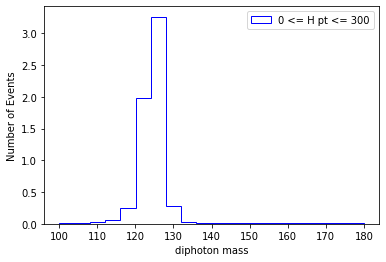

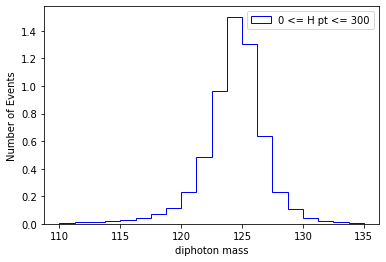

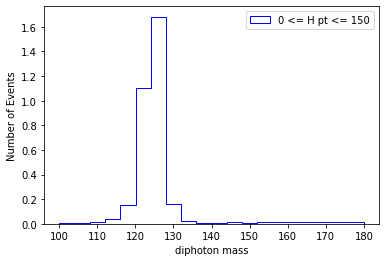

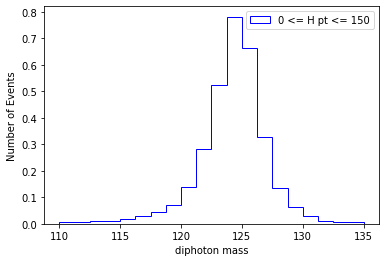

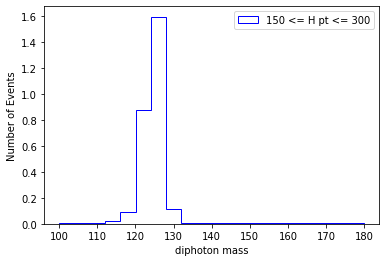

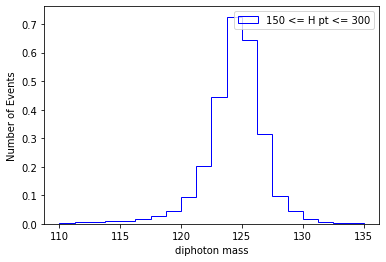

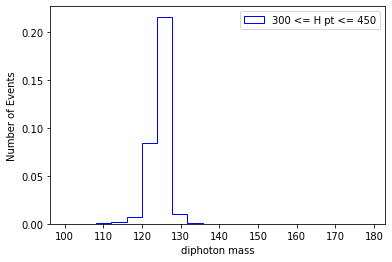

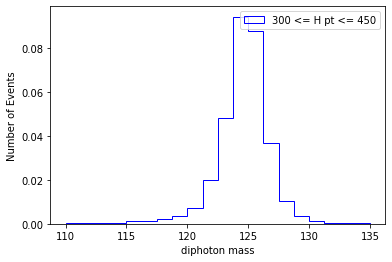

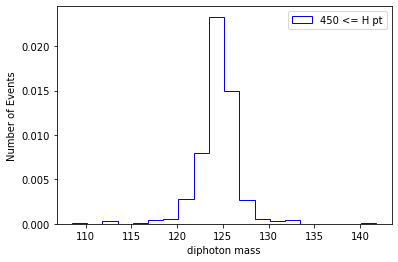

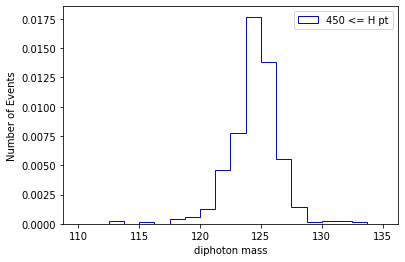

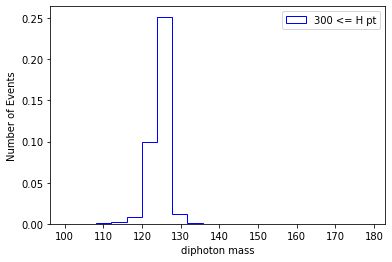

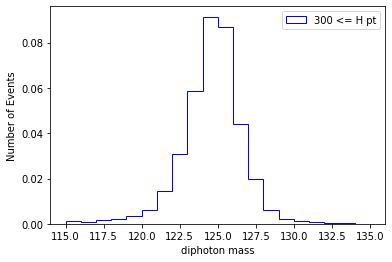

In [30]:
H_photon_pt = GluGluToHH_df.loc[:, b'genPho_H_pt'].values.tolist()
diphoton_mass = GluGluToHH_df.loc[:, b'diphoton_mass'].values.tolist()
weights = GluGluToHH_df.loc[:, b'genweight'].values.tolist()

# 0 to 300
cut_mass = []
cut_weights = []
for i in range(len(H_photon_pt)):
    if diphoton_mass[i] >= 0:
        if 0 <= H_photon_pt[i] <= 300:
            cut_mass.append(diphoton_mass[i])
            cut_weights.append(weights[i])
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '0 <= H pt <= 300')
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '0 <= H pt <= 300', range=(110, 135))
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()

# 0 to 150
cut_mass = []
cut_weights = []
for i in range(len(H_photon_pt)):
    if diphoton_mass[i] >= 0:
        if 0 <= H_photon_pt[i] <= 150:
            cut_mass.append(diphoton_mass[i])
            cut_weights.append(weights[i])
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '0 <= H pt <= 150')
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '0 <= H pt <= 150', range=(110, 135))
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()

# 150 to 300
cut_mass = []
cut_weights = []
for i in range(len(H_photon_pt)):
    if diphoton_mass[i] >= 0:
        if 150 <= H_photon_pt[i] <= 300:
            cut_mass.append(diphoton_mass[i])
            cut_weights.append(weights[i])
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '150 <= H pt <= 300')
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '150 <= H pt <= 300', range=(110, 135))
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()


# 300 to 450
cut_mass = []
cut_weights = []
for i in range(len(H_photon_pt)):
    if diphoton_mass[i] >= 0:
        if 300 <= H_photon_pt[i] <= 450:
            cut_mass.append(diphoton_mass[i])
            cut_weights.append(weights[i])
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '300 <= H pt <= 450')
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '300 <= H pt <= 450', range=(110, 135))
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()

# 450+
cut_mass = []
cut_weights = []
for i in range(len(H_photon_pt)):
    if diphoton_mass[i] >= 0:
        if 450 <= H_photon_pt[i]:
            cut_mass.append(diphoton_mass[i])
            cut_weights.append(weights[i])
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '450 <= H pt')
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '450 <= H pt', range=(110, 135))
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()

# 300 + 
cut_mass = []
cut_weights = []
for i in range(len(H_photon_pt)):
    if diphoton_mass[i] >= 0:
        if 300 <= H_photon_pt[i]:
            cut_mass.append(diphoton_mass[i])
            cut_weights.append(weights[i])
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '300 <= H pt')
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()
plt.hist(cut_mass, color='blue', weights=cut_weights, histtype='step', bins = 20, label= '300 <= H pt', range = (115,135))
plt.xlabel('diphoton mass')
plt.ylabel('Number of Events')
plt.legend(loc = 'best')
plt.show()

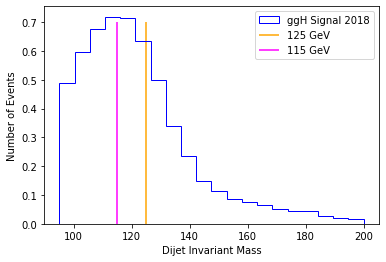

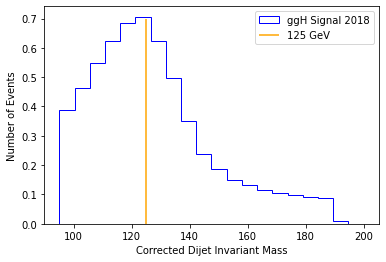

In [23]:
plt.figure()
plt.hist(GluGluToHH_df_2018[b'dibjet_mass'], color='blue', weights=GluGluToHH_df_2018[b'genweight'], bins=20, histtype='step', label='ggH Signal 2018', range = (95, 200))
plt.xlabel('Dijet Invariant Mass')
plt.ylabel("Number of Events")
plt.vlines(125, ymin=0, ymax=0.7, color = 'orange', label = '125 GeV')
plt.vlines(115, ymin=0, ymax=0.7, color = 'magenta', label = '115 GeV')
plt.legend(loc='best')
plt.savefig(fname = f'/storage/af/user/schen7/CMSSW_9_4_2/src/Higgs/HHbbgg/notebook/Plots/Dimass_Plots/ggH_dijet_mass_2018.png', format='png')
plt.show()
    
plt.figure()
plt.hist(GluGluToHH_df_2018[b'dibjet_mass_corr'], color='blue', weights=GluGluToHH_df_2018[b'genweight'], bins=20, histtype='step', label='ggH Signal 2018', range = (95, 200))
plt.xlabel('Corrected Dijet Invariant Mass')
plt.ylabel("Number of Events")
plt.vlines(125, ymin=0, ymax=0.7, color = 'orange', label = '125 GeV')
plt.legend(loc='best')
plt.savefig(fname = f'/storage/af/user/schen7/CMSSW_9_4_2/src/Higgs/HHbbgg/notebook/Plots/Dimass_Plots/ggH_dijet_mass_corr_2018.png', format='png')
plt.show()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


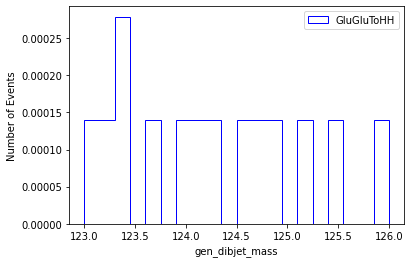

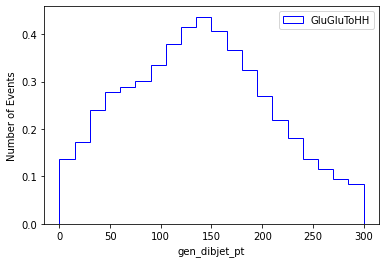

In [14]:
# gen_dibjet

plt.figure()
plt.hist(GluGluToHH_df_2018[b'gen_dibjet_mass'], color='blue', weights=GluGluToHH_df_2018[b'genweight'], bins=20, histtype='step', label='GluGluToHH', range = (123, 126))
plt.xlabel('gen_dibjet_mass')
plt.ylabel("Number of Events")
#plt.vlines(125, ymin=0, ymax=3, color='orange')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.hist(GluGluToHH_df_2018[b'gen_dibjet_pt'], color='blue', weights=GluGluToHH_df_2018[b'genweight'], bins=20, histtype='step', label='GluGluToHH', range = (0, 300))
plt.xlabel('gen_dibjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

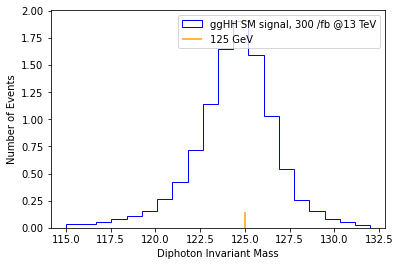

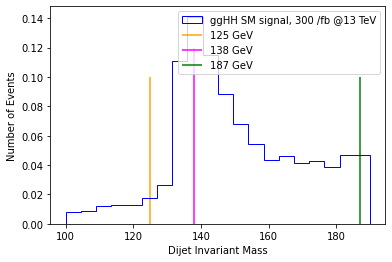

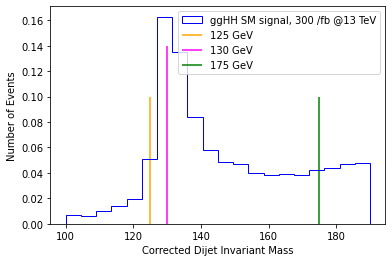

In [13]:
plt.figure()
plt.hist(GluGluToHH_df['diphoton_mass'], color='blue', weights=GluGluToHH_df['genweight'], bins=20, histtype='step', label='ggHH SM signal, 300 /fb @13 TeV', range = (115, 132))
plt.xlabel('Diphoton Invariant Mass')
plt.ylabel("Number of Events")
plt.vlines(125, ymin=0, ymax=0.15, color='orange', label = '125 GeV')
plt.legend(loc='best')
plt.savefig(fname = 'diphoton_mass')
plt.show()


plt.figure()
plt.hist(GluGluToHH_df['dibjet_mass'], color='blue', weights=GluGluToHH_df['genweight'], bins=20, histtype='step', label='ggHH SM signal, 300 /fb @13 TeV', range = (100, 190))
plt.xlabel('Dijet Invariant Mass')
plt.ylabel("Number of Events")
plt.vlines(125, ymin=0, ymax=0.1, color='orange', label = '125 GeV')
plt.vlines(138, ymin=0, ymax=0.12, color='magenta', label = '138 GeV')
plt.vlines(187, ymin=0, ymax=0.1, color='green', label = '187 GeV')
plt.legend(loc='best')
plt.savefig(fname = 'dibjet_mass')
plt.show()


plt.figure()
plt.hist(GluGluToHH_df['dibjet_mass_corr'], color='blue', weights=GluGluToHH_df['genweight'], bins=20, histtype='step',  label='ggHH SM signal, 300 /fb @13 TeV', range = (100, 190))
plt.xlabel('Corrected Dijet Invariant Mass')
plt.ylabel("Number of Events")
plt.vlines(125, ymin=0, ymax=0.1, color='orange', label = '125 GeV')
plt.vlines(130, ymin=0, ymax=0.14, color='magenta', label = '130 GeV')
plt.vlines(175, ymin=0, ymax=0.1, color='green', label = '175 GeV')
plt.legend(loc='best')
plt.savefig(fname = 'dibjet_mass_corr')
plt.show()

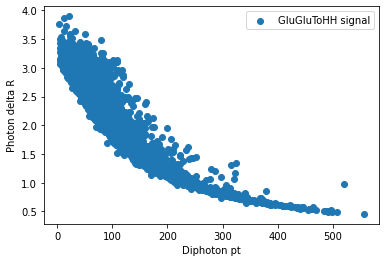

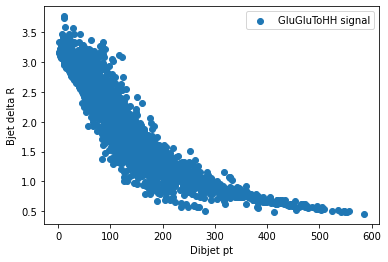

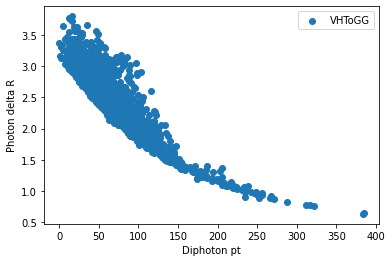

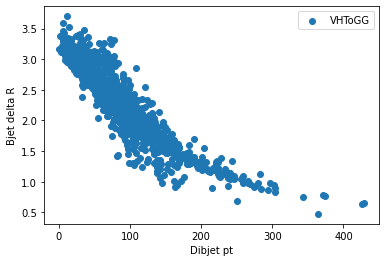

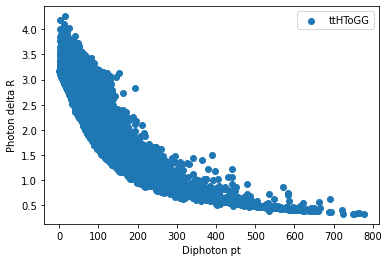

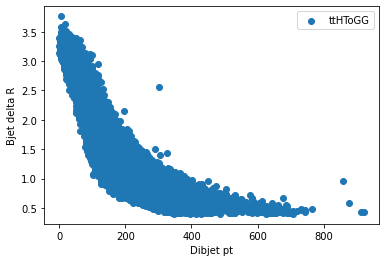

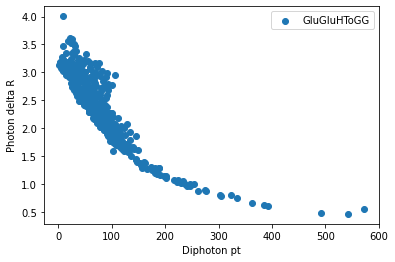

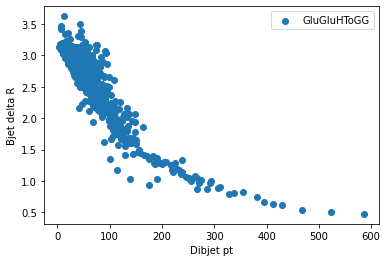

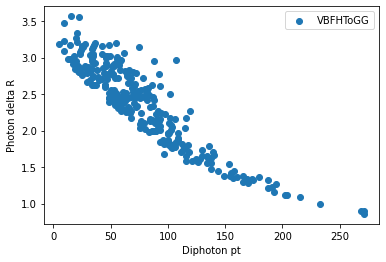

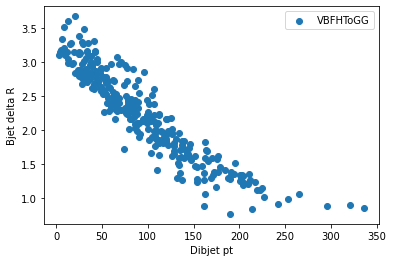

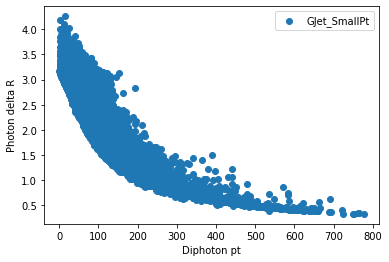

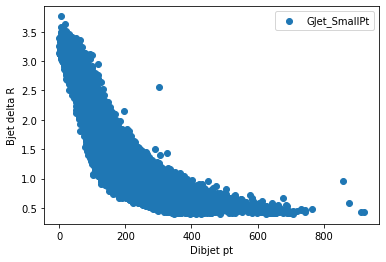

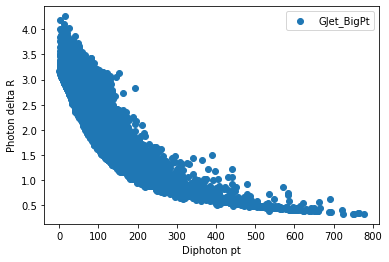

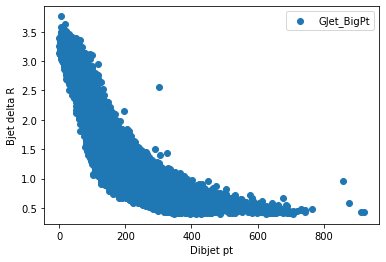

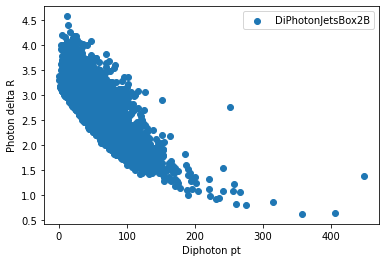

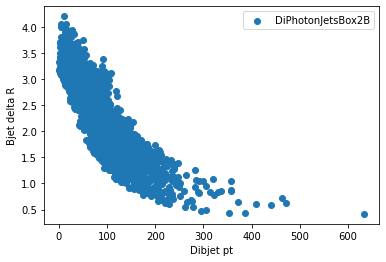

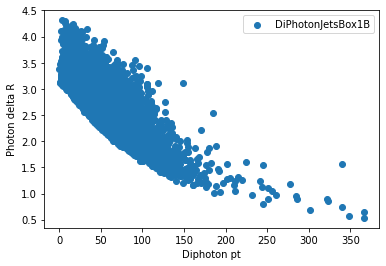

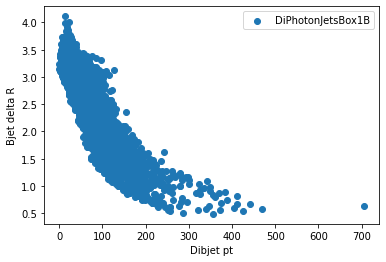

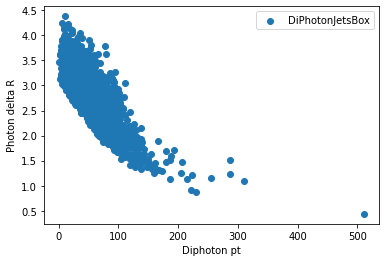

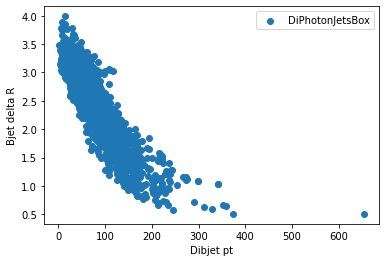

In [8]:
dfs = [GluGluToHH_df, VHToGG_df, ttHToGG_df, GluGluHToGG_df, VBFHToGG_df, GJet_SmallPt_df, GJet_BigPt_df,DiPhotonJetsBox2B_df, DiPhotonJetsBox1B_df, DiPhotonJetsBox_df ]
df_names = ['GluGluToHH signal', 'VHToGG', 'ttHToGG', 'GluGluHToGG', 'VBFHToGG', 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox' ]
colors = ['salmon', 'darkorange', 'goldenrod', 'olive', 'seagreen', 'steelblue', 'forestgreen', 'navy', 'purple', 'crimson']


for i in range(len(dfs)):
    plt.scatter(dfs[i]['diphoton_pt'], dfs[i]['photon_delR'], label = df_names[i])
    plt.xlabel('Diphoton pt')
    plt.ylabel('Photon delta R')
    plt.legend()
    plt.savefig(fname = f'{df_names[i]} Pho_DelR')
    plt.show()
    
    plt.scatter(dfs[i]['dibjet_pt'], dfs[i]['bjet_delR'], label = df_names[i])
    plt.xlabel('Dibjet pt')
    plt.ylabel('Bjet delta R')
    plt.legend()
    plt.savefig(fname = f'{df_names[i]} Bjet_DelR')
    plt.show()

## Generator Level Plots / Signal

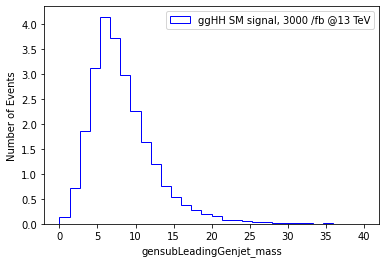

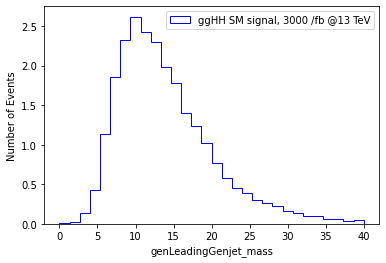

In [6]:
# Gen jet masses (b/c b quark mass stored as 0)

GLFs = ['gensubLeadingGenjet_mass', 'genLeadingGenjet_mass']
bins = np.linspace(10, 300, 50)

for glf in GLFs:
    plt.figure()
    plt.hist(df_signal_ggHH[glf], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=30, range = (0, 40), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
    plt.xlabel(glf)
    plt.ylabel('Number of Events')
    plt.legend(loc='best')

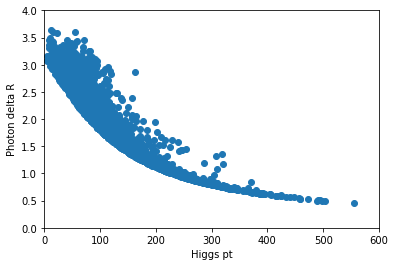

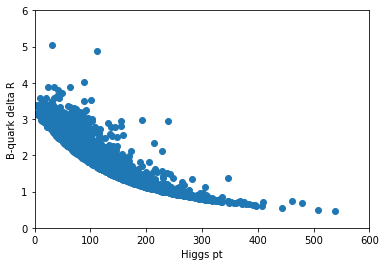

In [30]:
# Del R vs. Higgs pt

plt.scatter(GluGluToHH_df['genPho_H_pt'], GluGluToHH_df['genPho_deltaR'])
plt.xlabel('Higgs pt')
plt.ylabel('Photon delta R')
plt.xlim(0, 600)
plt.ylim(0, 4)
plt.savefig(fname = 'Photon delta R vs. Higg pt.png')
plt.show()

plt.scatter(GluGluToHH_df['genBjet_H_pt'], GluGluToHH_df['genBjet_deltaR'])
plt.xlabel('Higgs pt')
plt.ylabel('B-quark delta R')
plt.xlim(0, 600)
plt.ylim(0, 6)
plt.savefig(fname = 'B-quark delta R vs. Higg pt.png')
plt.show()

add a title to it

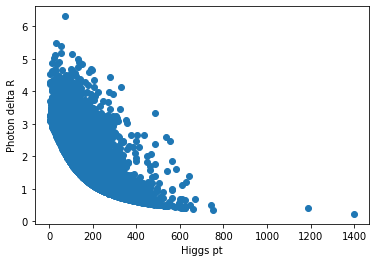

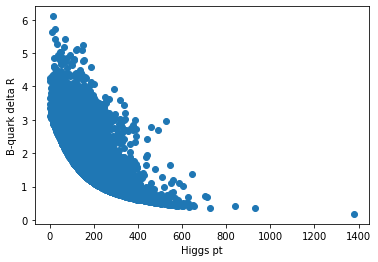

In [7]:
# Del R vs. Higgs pt

plt.scatter(df_signal_ggHH['genPho_H_pt'], df_signal_ggHH['genPho_deltaR'])
plt.xlabel('Higgs pt')
plt.ylabel('Photon delta R')
plt.savefig(fname = 'Photon delta R vs. Higg pt.png')
plt.show()

plt.scatter(df_signal_ggHH['genBjet_H_pt'], df_signal_ggHH['genBjet_deltaR'])
plt.xlabel('Higgs pt')
plt.ylabel('B-quark delta R')
plt.savefig(fname = 'B-quark delta R vs. Higg pt.png')
plt.show()

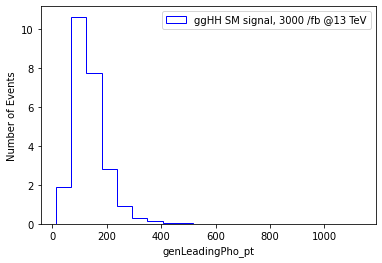

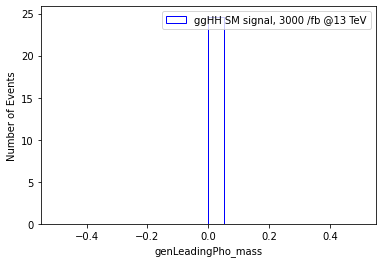

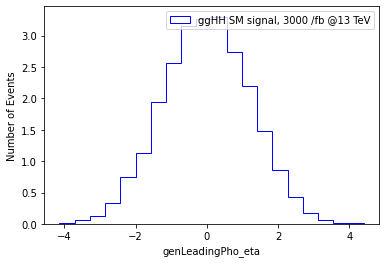

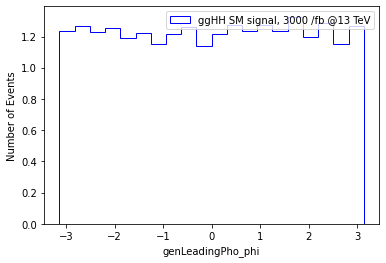

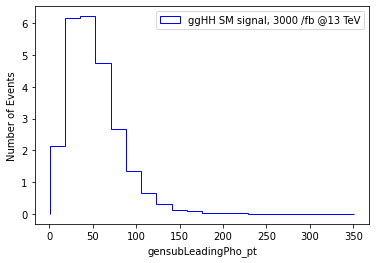

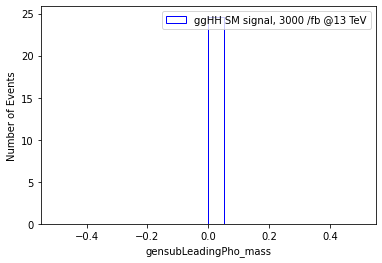

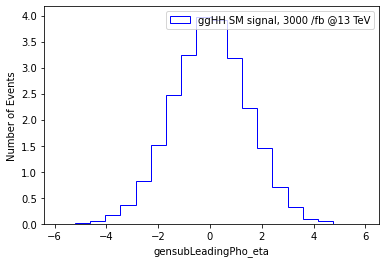

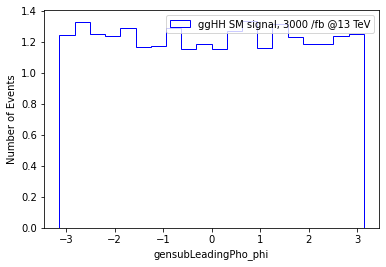

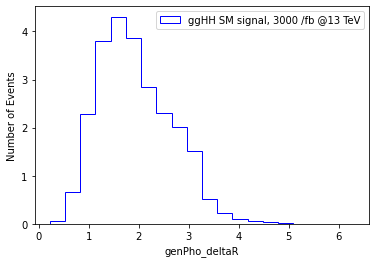

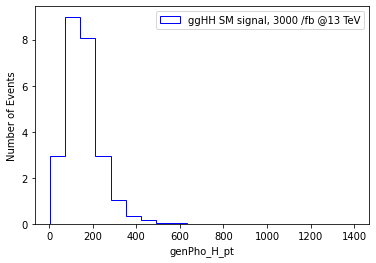

In [8]:
# Photon plots

PLFs = ['genLeadingPho_pt', 'genLeadingPho_mass', 'genLeadingPho_eta', 'genLeadingPho_phi', 
                    'gensubLeadingPho_pt', 'gensubLeadingPho_mass', 'gensubLeadingPho_eta', 'gensubLeadingPho_phi',
                   'genPho_deltaR', 'genPho_H_pt']

bins = np.linspace(10, 300, 50)

for plf in PLFs:
    plt.figure()
    plt.hist(df_signal_ggHH[plf], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20, histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
    plt.xlabel(plf)
    plt.ylabel('Number of Events')
    plt.legend(loc='best')
    plt.savefig(fname = plf + '.png')

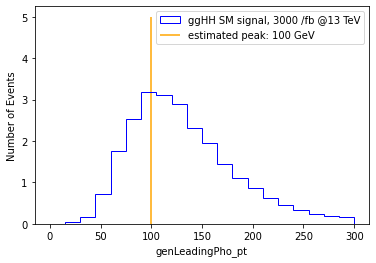

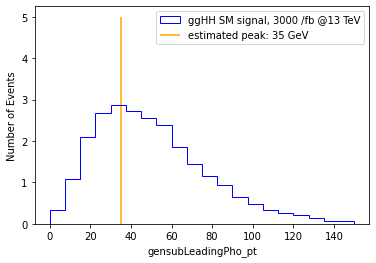

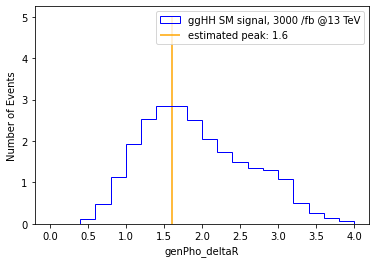

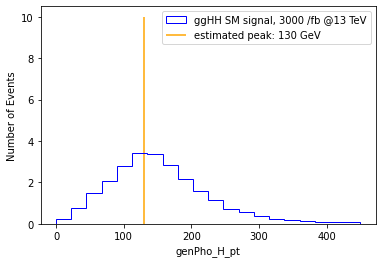

In [13]:
# Photon Close-Ups

plt.figure()
plt.hist(df_signal_ggHH['genLeadingPho_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 300), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genLeadingPho_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 100, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 100 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'genLeadingPho_pt_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['gensubLeadingPho_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 150), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('gensubLeadingPho_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 35, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 35 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'gensubLeadingPho_pt_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['genPho_deltaR'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 4), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genPho_deltaR')
plt.ylabel('Number of Events')
plt.vlines(x= 1.6, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 1.6 ')
plt.legend(loc='best')
plt.savefig(fname = 'genPho_deltaR_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['genPho_H_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 450), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genPho_H_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 130, ymin=0, ymax=10, color = 'orange', label = 'estimated peak: 130 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'genPho_H_pt_close.png')
plt.show()

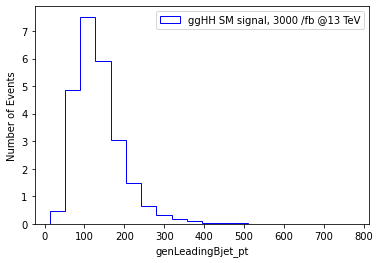

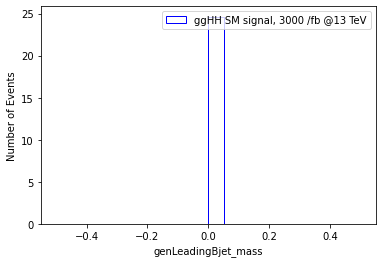

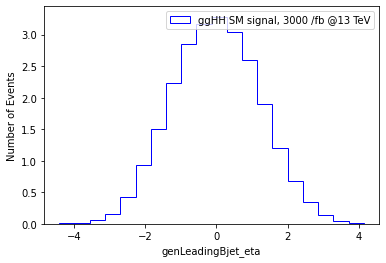

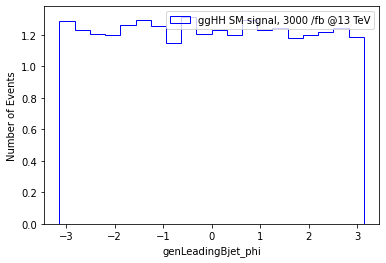

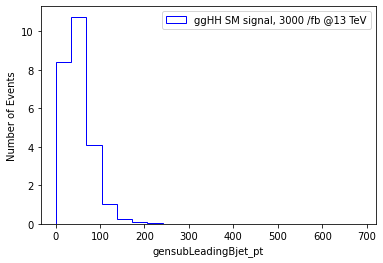

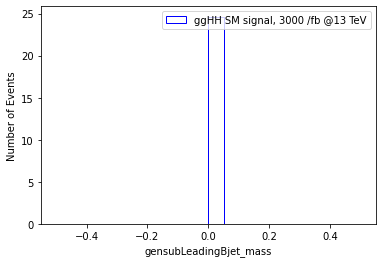

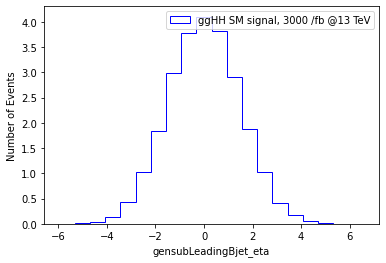

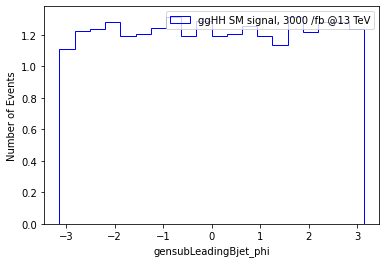

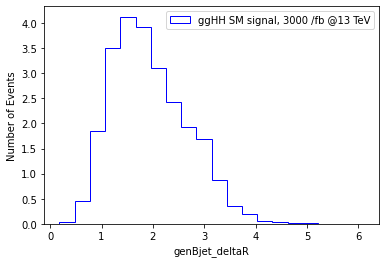

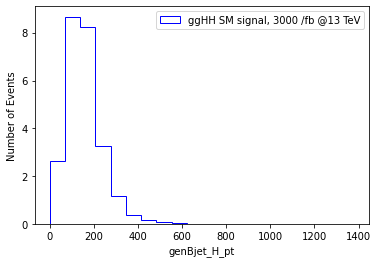

In [4]:
# Bjet plots

BLFs = ['genLeadingBjet_pt', 'genLeadingBjet_mass', 'genLeadingBjet_eta', 'genLeadingBjet_phi', 
                    'gensubLeadingBjet_pt', 'gensubLeadingBjet_mass', 'gensubLeadingBjet_eta', 
                'gensubLeadingBjet_phi', 'genBjet_deltaR', 'genBjet_H_pt']

bins = np.linspace(10, 300, 50)

for blf in BLFs:
    plt.figure()
    plt.hist(df_signal_ggHH[blf], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20, histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
    plt.xlabel(blf)
    plt.ylabel('Number of Events')
    plt.legend(loc='best')
    plt.savefig(fname = blf + '.png')

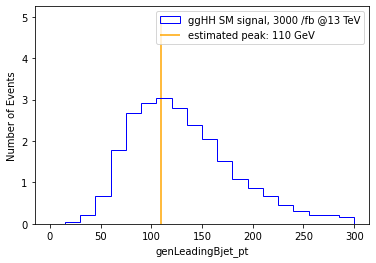

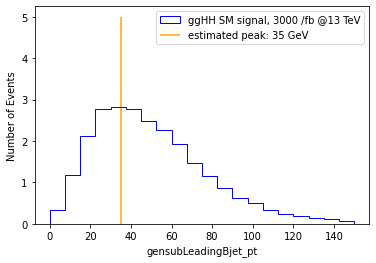

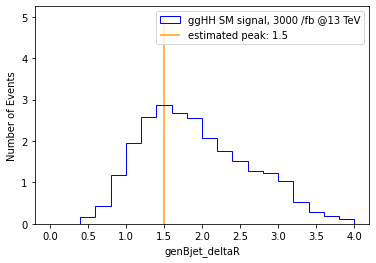

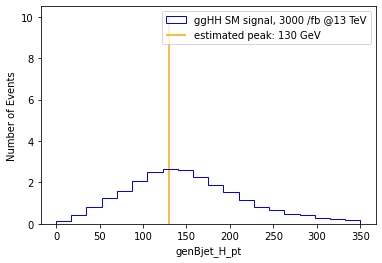

In [9]:
# Bjet Close-Ups

plt.figure()
plt.hist(df_signal_ggHH['genLeadingBjet_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 300), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genLeadingBjet_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 110, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 110 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'genLeadingBjet_pt_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['gensubLeadingBjet_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 150), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('gensubLeadingBjet_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 35, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 35 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'gensubLeadingBjet_pt_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['genBjet_deltaR'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 4), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genBjet_deltaR')
plt.ylabel('Number of Events')
plt.vlines(x= 1.5, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 1.5 ')
plt.legend(loc='best')
plt.savefig(fname = 'genBjet_deltaR_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['genBjet_H_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 350), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genBjet_H_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 130, ymin=0, ymax=10, color = 'orange', label = 'estimated peak: 130 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'genBjet_H_pt_close.png')
plt.show()

# OLD BDT STUFF (NOT HH-->BBGG)

change the color

In [12]:
test_name = 'Incl_March19'

print len(df_bkg.values)
print len(df_bkgM.values)
print len(df_ttbkg.values)
print len(df_signal.values)

signal = df_signal.values
ggH = df_signal_Glu.values
VBFH = df_signal_VBF.values
WH = df_signal_WH.values
ZH = df_signal_ZH.values
bkg_all = df_bkg_all.values
bkgM = df_bkgM.values
ttbkg = df_ttbkg.values

# Shuffle before splitting into train-val
randix = np.arange(len(signal))
np.random.shuffle(randix)
signal = signal[randix]
#signal = signal[:len(bkg)]
#signal = signal[:100000]

randix2 = np.arange(len(bkg_all))
np.random.shuffle(randix2)
bkg_all = bkg_all[randix2]
#bkg = bkg[:100000]

sig_label = np.ones(len(signal))
ggH_label = np.ones(len(ggH))
VBFH_label = np.ones(len(VBFH))

bkg_all_label = np.zeros(len(bkg_all))
bkgM_label = np.zeros(len(bkgM))

print "sum of weights for signal: " 
print np.sum(signal[:,wt_var_indices])
print "sum of weights for DY+tt bkg: " 
print np.sum(bkg_all[:,wt_var_indices])

print "sum of weights for DY105-160GeV bkg: " 
print np.sum(bkgM[:,wt_var_indices])

print "sum of weights for tt bkg: " 
print np.sum(ttbkg[:,wt_var_indices])

221955
24997725
59446
1158423
sum of weights for signal: 
0.221292639733
sum of weights for DY+tt bkg: 
408.679422092
sum of weights for DY105-160GeV bkg: 
411.360780417
sum of weights for tt bkg: 
7.38233497834


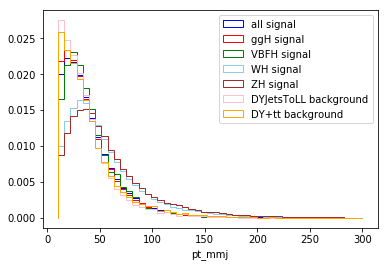

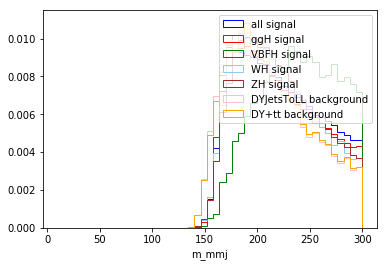

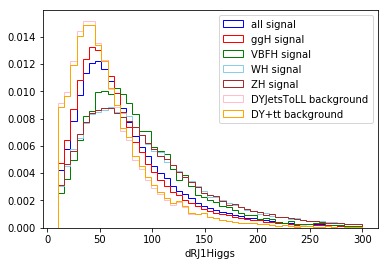

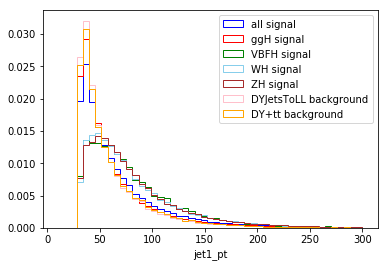

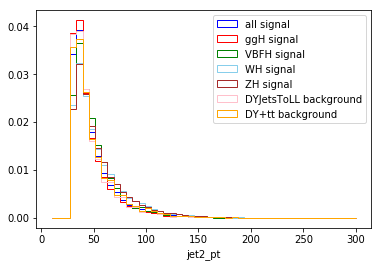

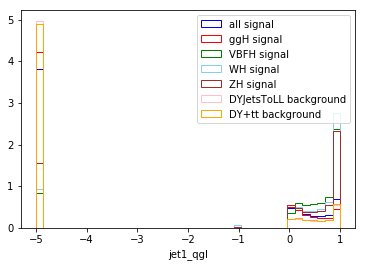

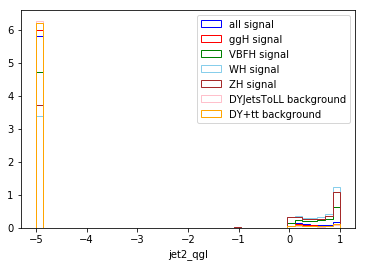

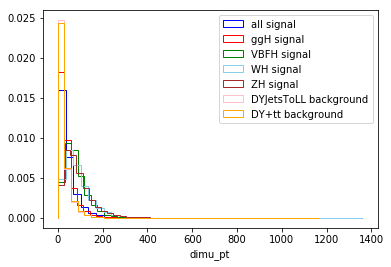

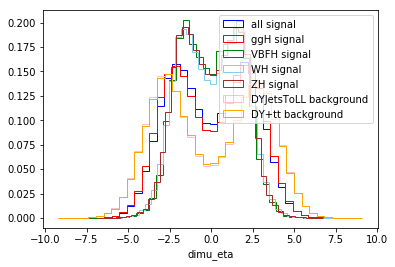

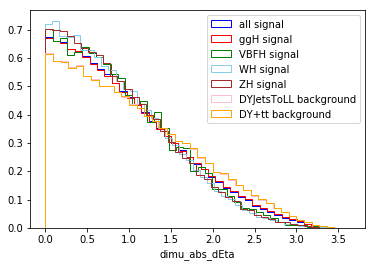

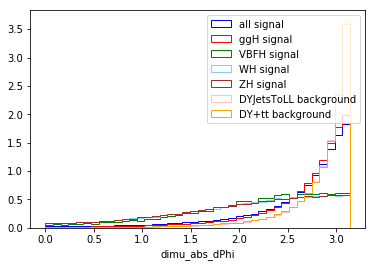

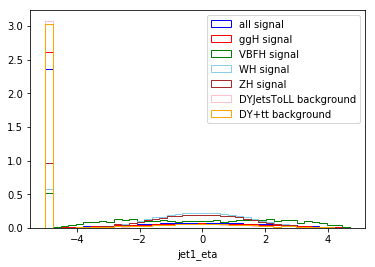

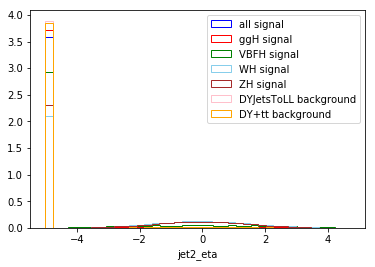

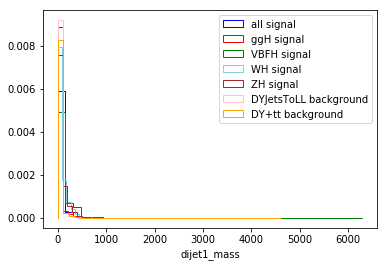

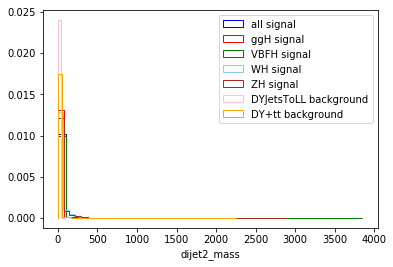

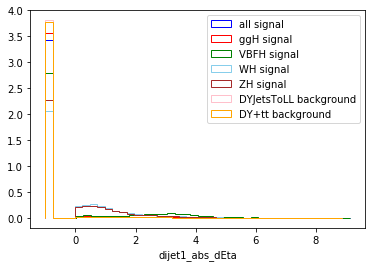

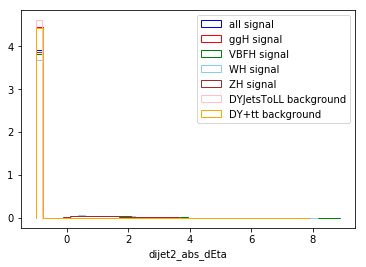

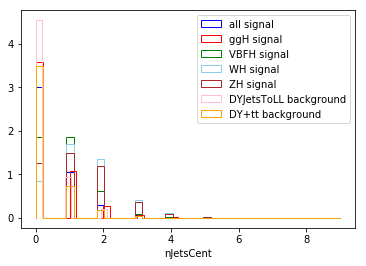

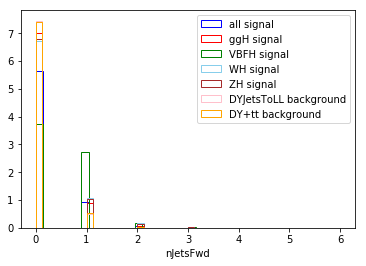

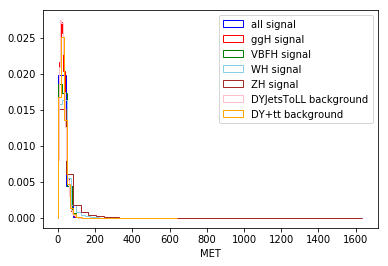

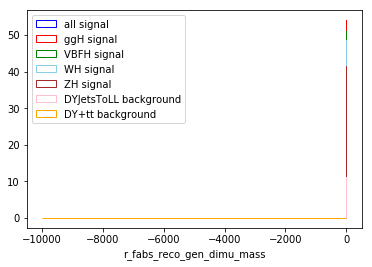

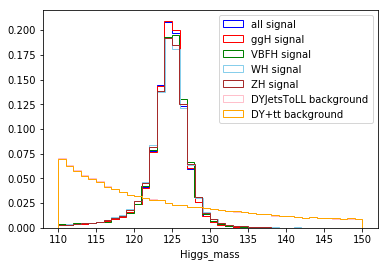

In [22]:
HLFs = ['pt_mmj','m_mmj','dRJ1Higgs','jet1_pt','jet2_pt']

bins = np.linspace(10, 300, 50)

for hlf in HLFs:
    plt.figure()
    plt.hist(df_signal[hlf], weights=df_signal['evt_weight'], color='blue', bins=bins,normed=True, histtype='step', label='all signal')
    plt.hist(df_signal_Glu[hlf], weights=df_signal_Glu['evt_weight'], color='red',bins=bins,normed=True, histtype='step', label='ggH signal')
    plt.hist(df_signal_VBF[hlf], weights=df_signal_VBF['evt_weight'], color='green',bins=bins,normed=True, histtype='step', label='VBFH signal')
    plt.hist(df_signal_WH[hlf], weights=df_signal_WH['evt_weight'], color='skyblue',bins=bins,normed=True, histtype='step', label='WH signal')
    plt.hist(df_signal_ZH[hlf], weights=df_signal_ZH['evt_weight'], color='brown',bins=bins,normed=True, histtype='step', label='ZH signal')
    plt.hist(df_bkg[hlf], weights=df_bkg['evt_weight'], color='pink',bins=bins,normed=True, histtype='step', label='DYJetsToLL background')
    plt.hist(df_bkg_all[hlf], weights=df_bkg_all['evt_weight'], color='Orange',bins=bins,normed=True, histtype='step', label='DY+tt background')
    plt.xlabel(hlf)
    plt.legend(loc='best')

    
HLFs = ['jet1_qgl','jet2_qgl','dimu_pt','dimu_eta','dimu_abs_dEta','dimu_abs_dPhi','jet1_eta','jet2_eta','dijet1_mass','dijet2_mass','dijet1_abs_dEta','dijet2_abs_dEta','nJetsCent','nJetsFwd','MET','r_fabs_reco_gen_dimu_mass','Higgs_mass']

for hlf in HLFs:
    plt.figure()
    plt.hist(df_signal[hlf], weights=df_signal['evt_weight'], color='blue', bins=40,normed=True, histtype='step', label='all signal')
    plt.hist(df_signal_Glu[hlf], weights=df_signal_Glu['evt_weight'], color='red',bins=40,normed=True, histtype='step', label='ggH signal')
    plt.hist(df_signal_VBF[hlf], weights=df_signal_VBF['evt_weight'], color='green',bins=40,normed=True, histtype='step', label='VBFH signal')
    plt.hist(df_signal_WH[hlf], weights=df_signal_WH['evt_weight'], color='skyblue',bins=40,normed=True, histtype='step', label='WH signal')
    plt.hist(df_signal_ZH[hlf], weights=df_signal_ZH['evt_weight'], color='brown',bins=40,normed=True, histtype='step', label='ZH signal')
    plt.hist(df_bkg[hlf], weights=df_bkg['evt_weight'], color='pink',bins=40,normed=True, histtype='step', label='DYJetsToLL background')
    plt.hist(df_bkg_all[hlf], weights=df_bkg_all['evt_weight'], color='Orange',bins=40,normed=True, histtype='step', label='DY+tt background')
    plt.xlabel(hlf)
    plt.legend(loc='best')
    
#bins = np.linspace(0, 0.1, 20)
#plt.hist(df_signal['r_fabs_reco_gen_dimu_mass'],weights=df_signal['evt_weight'],color='blue', bins=bins,density=True,histtype='step')
#plt.hist(df_bkg['r_fabs_reco_gen_dimu_mass'],weights=df_bkg['evt_weight'],color='green', bins=bins,density=True,histtype='step')
#plt.title('resolution ratio')
#plt.show()

In [23]:
bkg_scale = 5.0

#signal[:,wt_var_indices] = np.multiply(signal_wt, sig_scale)
#signal[:,wt_var_indices] = np.multiply(signal[:,wt_var_indices], sig_scale)
#signal[:,tw_var_indices] = signal[:,wt_var_indices] / np.sqrt(signal[:,cal_var_indices])* 383.326
#signal[:,tw_var_indices] = 1.0 / np.sqrt(signal[:,cal_var_indices]) * 0.7
#signal[:,tw_var_indices] = np.multiply(signal[:,cal_var_indices], sig_scale)

#bkg[:,tw_var_indices] = bkg[:,cal_var_indices]/bkg[:,cal_var_indices]

#sig_label = np.ones(len(signal))
#bkg_label = np.zeros(len(bkg))

x = np.concatenate((signal,bkg_all))
y = np.concatenate((sig_label,bkg_all_label))

#randix3 = np.arange(len(x))
#np.random.shuffle(randix3)
#x= x[randix3,...]
#y= y[randix3,...]

#print "after down sampling"
#print len(sig_label)
#print len(bkg_label)

#signal_wt = signal[:,wt_var_indices]

#print "sum of weights for signal: " 
#print np.sum(signal_wt)
#print "sum of weights for bkg: " 
#print np.sum(bkg_wt)

#print "shape"
#print signal[:,wt_var_indices].shape

In [24]:
print(test_name)

Incl_March19


In [25]:
# split data into train and test sets
seed = 7
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

# For training we ignore the columns with the event ID information
x_train_reduced = x_train[:,var_indices]
x_test_reduced = x_test[:,var_indices]

x_test_index = x_test[:,id_var_indices]
x_test_BDT = x_test[:,BDT_var_indices]
x_test_BDT_1 = x_test_BDT.flatten()

x_test_wt = x_test[:,wt_var_indices]
x_test_wt_1 = x_test_wt.flatten()

#x_test_wt_all = np.concatenate((x_test_wt1,x_test_wt2,x_test_wt3,x_test_wt4,x_test_wt5,x_test_wt6,x_test_wt7,x_test_wt8,x_test_wt9,x_test_wt10, x_test_wt11,x_test_wt12,x_test_wt13),axis=1)

x_train_index = x_train[:,id_var_indices]
x_train_BDT = x_train[:,BDT_var_indices]
x_train_BDT_1 = x_train_BDT.flatten()

x_train_wt = x_train[:,wt_var_indices]
x_train_wt_1 = x_train_wt.flatten()

#x_train_wt_all = np.concatenate((x_train_wt1,x_train_wt2,x_train_wt3,x_train_wt4,x_train_wt5,x_train_wt6,x_train_wt7,x_train_wt8,x_train_wt9,x_train_wt10, x_train_wt11,x_train_wt12,x_train_wt13),axis=1)

print "train sample:"
print y_train.shape
print x_train_reduced.shape
print x_train_BDT.shape
print x_train_wt.shape
print x_train_wt_1.shape

print "test sample:"
print y_test.shape
print x_test_reduced.shape
print x_test_BDT.shape
print x_test_wt.shape
print x_test_wt_1.shape

train sample:
(1007876,)
(1007876, 20)
(1007876, 1)
(1007876, 1)
(1007876,)
test sample:
(431948,)
(431948, 20)
(431948, 1)
(431948, 1)
(431948,)


training w/o weight weights
New configuration: {'n_estimators': 457, 'learning_rate': 0.42369021680469859, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.42369021680469859,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=457, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.25%
Accuracy: 82.05%


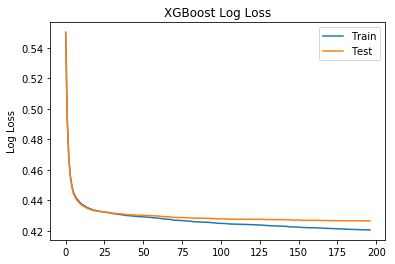

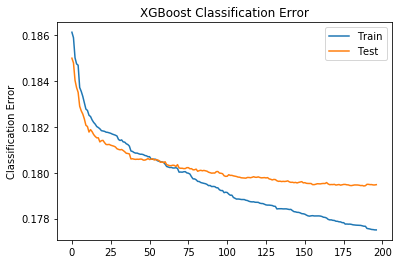

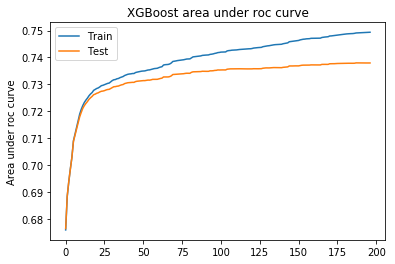

New configuration: {'n_estimators': 315, 'learning_rate': 0.31554621142512651, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.31554621142512651,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=315, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.17%
Accuracy: 82.06%


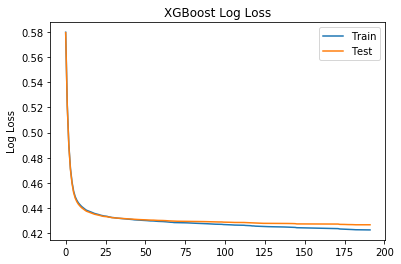

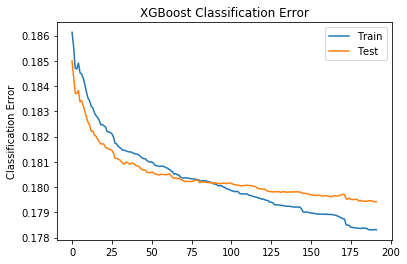

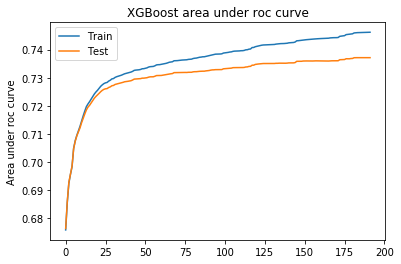

New configuration: {'n_estimators': 282, 'learning_rate': 0.037789358885547165, 'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.037789358885547165,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=282, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 81.72%
Accuracy: 81.80%


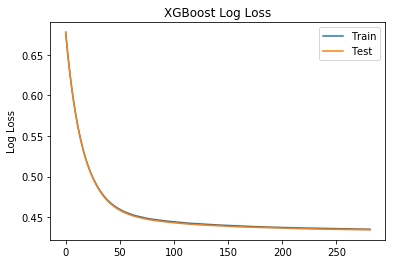

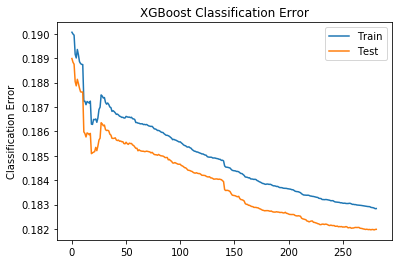

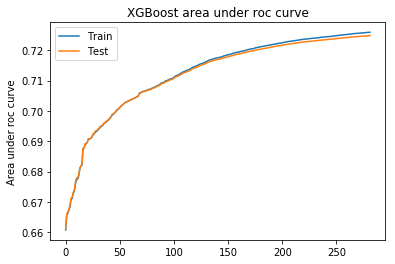

New configuration: {'n_estimators': 344, 'learning_rate': 0.40796267709999179, 'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.40796267709999179,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=344, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.11%
Accuracy: 82.03%


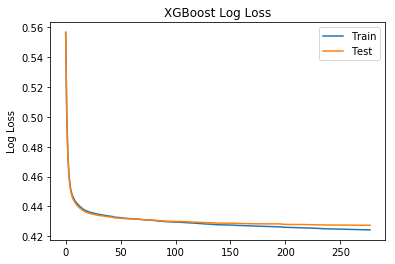

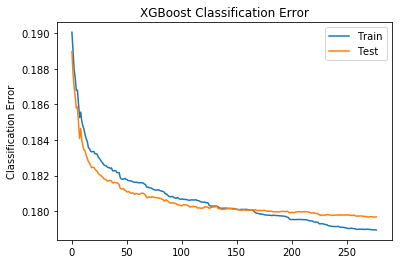

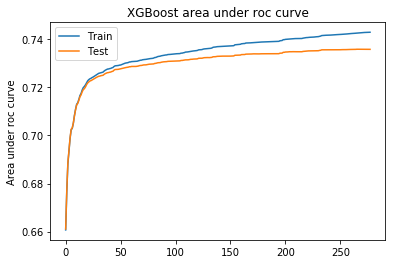

New configuration: {'n_estimators': 301, 'learning_rate': 0.4196785941333151, 'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4196785941333151,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=301, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.04%
Accuracy: 82.02%


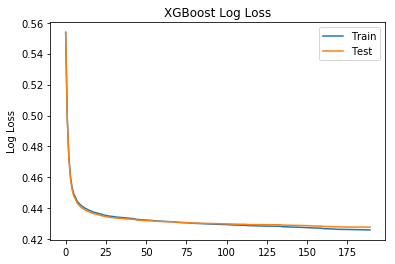

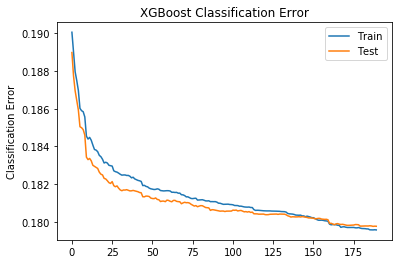

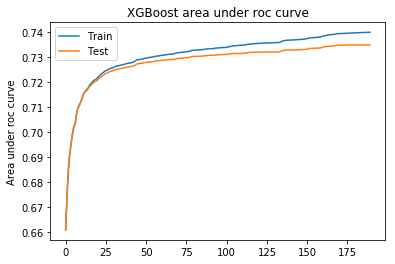

New configuration: {'n_estimators': 487, 'learning_rate': 0.19043835452186855, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.19043835452186855,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=487, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.16%
Accuracy: 82.06%


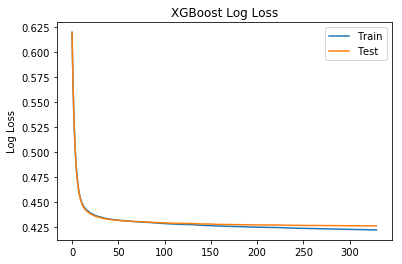

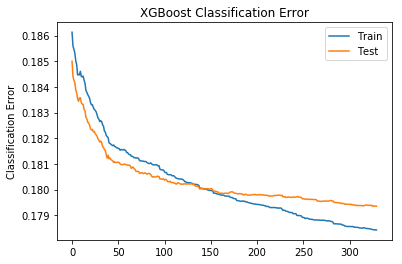

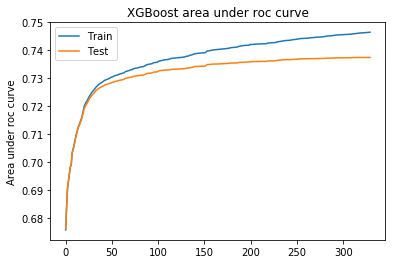

New configuration: {'n_estimators': 342, 'learning_rate': 0.43634275659563393, 'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.43634275659563393,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=342, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.18%
Accuracy: 82.05%


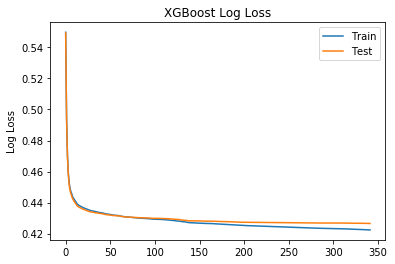

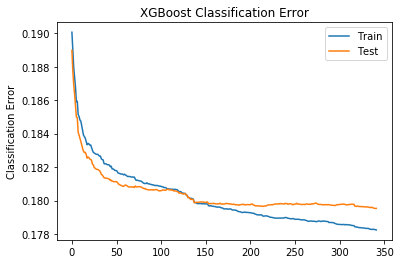

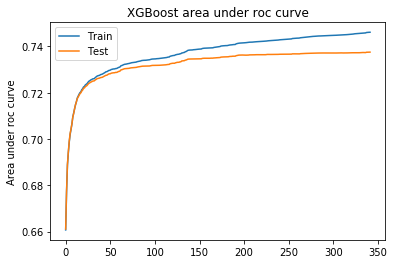

New configuration: {'n_estimators': 404, 'learning_rate': 0.26503396498009041, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.26503396498009041,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=404, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.12%
Accuracy: 82.06%


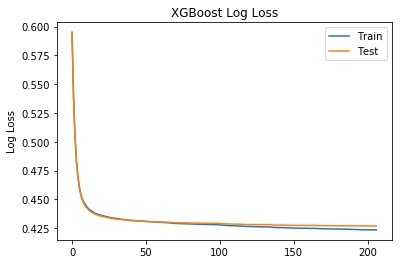

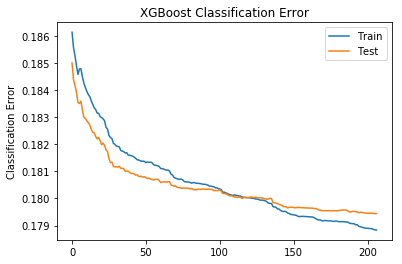

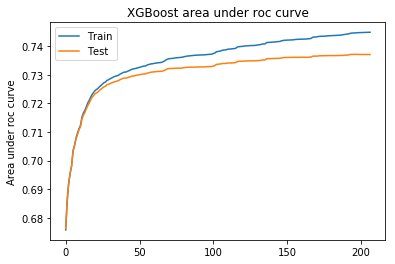

New configuration: {'n_estimators': 361, 'learning_rate': 0.29518969811680257, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.29518969811680257,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=361, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.11%
Accuracy: 82.04%


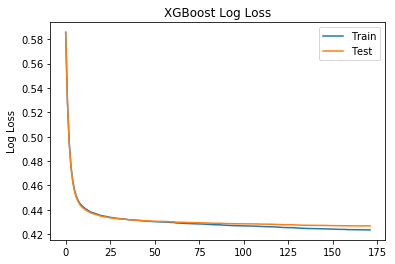

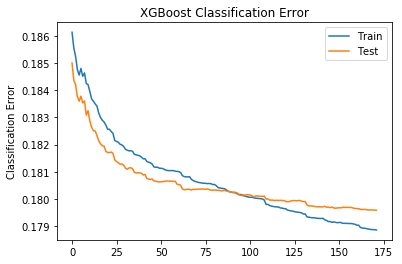

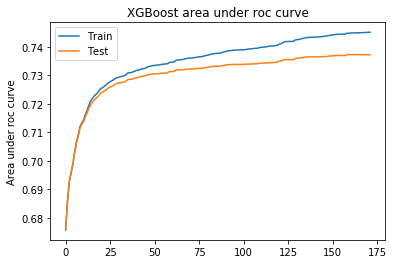

New configuration: {'n_estimators': 342, 'learning_rate': 0.061894727522018161, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.061894727522018161,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=342, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 81.95%
Accuracy: 81.98%


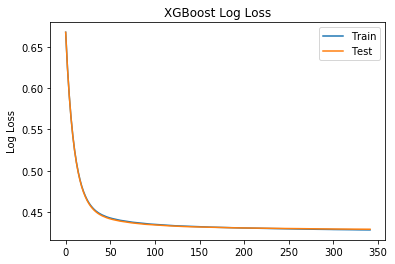

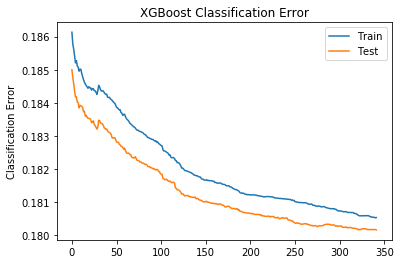

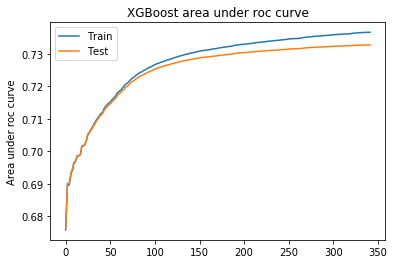

Best parameters: [4, 0.19043835452186855, 487]
Save best configuration to BestConfig_model_Incl_March19_nw.json


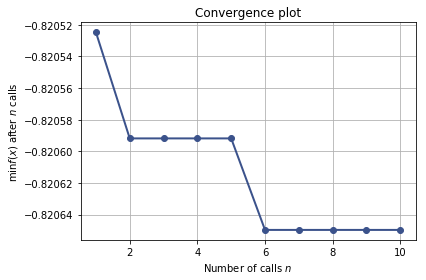

In [26]:
#space2  = [Integer(2, 4, name='max_depth'),
#          Real(0.01, 0.5, name='learning_rate'),
#          Integer(100,400,name='n_estimators'),
#          Real(0.0, 2, name='gamma'),
#          Integer(1,10,name='min_child_weight'),
#          Real(0.5, 1, name='subsample')
#          ]

space2  = [Integer(3, 4, name='max_depth'),
          Real(0.01, 0.5, name='learning_rate'),
          Integer(200,500,name='n_estimators')
          ]

@use_named_args(space2)
def objective2(**X):
    print("New configuration: {}".format(X))
    model_tmp = XGBClassifier(X['max_depth'], X['learning_rate'], X['n_estimators'])
    #model_tmp = XGBClassifier(X['max_depth'], X['learning_rate'], X['n_estimators'], True, 'rank:pairwise', 'gbtree', -1, None, X['gamma'], X['min_child_weight'], 0, X['subsample'], 1, 1,0,1,1,0.5,0,None,None)
    print model_tmp
    eval_set = [(x_train_reduced, y_train), (x_test_reduced, y_test)]
    model_tmp.fit(x_train_reduced, y_train,early_stopping_rounds=10,eval_metric=["logloss","error","auc"],eval_set=eval_set,verbose=False)
        
    y_train_tmp = model_tmp.predict_proba(x_train_reduced)[:, 1]
    predictions_train_tmp = [round(value) for value in y_train_tmp]
    train_accuracy = accuracy_score(y_train, predictions_train_tmp)
    print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
    
    y_pred_tmp = model_tmp.predict_proba(x_test_reduced)[:, 1]
    predictions_tmp = [round(value) for value in y_pred_tmp]
    accuracy = accuracy_score(y_test, predictions_tmp)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    # retrieve performance metrics
    results = model_tmp.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

    # plot area under the roc curve
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['auc'], label='Train')
    ax.plot(x_axis, results['validation_1']['auc'], label='Test')
    ax.legend()
    plt.ylabel('Area under roc curve')
    plt.title('XGBoost area under roc curve')
    plt.show()
    
    #diff = train_accuracy-accuracy
    #return diff
    return -accuracy


print "training w/o weight weights"
res_gp2 = gp_minimize(objective2, space2, n_calls=10, random_state=0)

plot_convergence(res_gp2);

print("Best parameters: {}".format(res_gp2.x))
best_max_depth2 = res_gp2.x[0]
best_learning_rate2 = res_gp2.x[1]
best_n_estimators2 = res_gp2.x[2]
#best_gamma2 = res_gp2.x[3]
#best_min_child_weight2 = res_gp2.x[4]
#best_subsample2 = res_gp2.x[5]


model_file2 = 'model_'+test_name+'_nw.pkl'
config_file2 = 'BestConfig_model_'+test_name+'_nw.json'


bestconf2 = {"best_max_depth": best_max_depth2,
          "best_learning_rate": best_learning_rate2,
          "best_n_estimators": best_n_estimators2}
#          "best_gamma": best_gamma2,
#          "best_min_child_weight":best_min_child_weight2,
#          "best_subsample":best_subsample2}

    
with open(config_file2, 'w') as config2:
    json.dump(bestconf2, config2)
    
    print("Save best configuration to {}".format(config_file2))



In [27]:
model2 = XGBClassifier(best_max_depth2,best_learning_rate2,best_n_estimators2)
print model2
output = open(model_file2, 'wb')
# Pickle dictionary using protocol 0.
pickle.dump(model2, output)
output.close()

model2.fit(x_train_reduced, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.19043835452186855,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=487, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.19043835452186855,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=487, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

roc curve for the testing sample
roc curve for the training sample
compare train/test w/o weights in training


<BarContainer object of 20 artists>

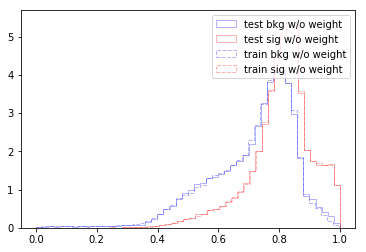

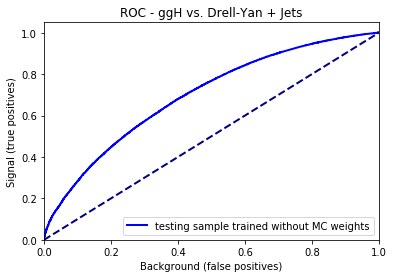

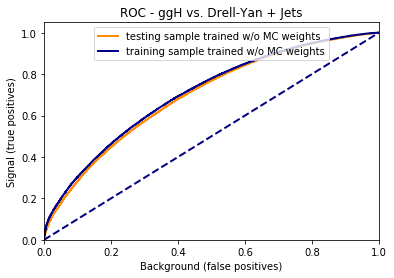

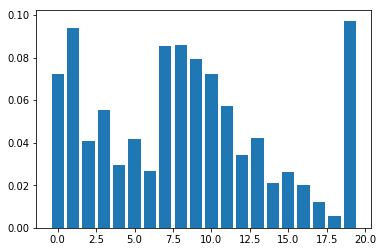

In [28]:
#model2 = XGBClassifier(best_max_depth2,best_learning_rate2,best_n_estimators2,)
#print model2
#model2 = XGBClassifier(best_max_depth2,best_learning_rate2,best_n_estimators2,True, 'rank:pairwise', 'gbtree', -1, None, best_gamma2, best_min_child_weight2, 0, best_subsample2, 1, 1,0,1,1,0.5,0,None,None)
#model2.fit(x_train_reduced, y_train)

# make predictions for test data
y_pred2 = model2.predict_proba(x_test_reduced)[:, 1]
# make predictions for trainig data
y_pred2_train = model2.predict_proba(x_train_reduced)[:, 1]

y_frame2 = pd.DataFrame({'truth':y_test, 'disc':y_pred2, 'evt_weight':x_test_wt_1})
disc_bkg2    = y_frame2[y_frame2['truth'] == 0]['disc'].values
disc_signal2 = y_frame2[y_frame2['truth'] == 1]['disc'].values
bkg_w2    = y_frame2[y_frame2['truth'] == 0]['evt_weight'].values
signal_w2 = y_frame2[y_frame2['truth'] == 1]['evt_weight'].values
#training sample
y_frame_train2 = pd.DataFrame({'truth':y_train, 'disc':y_pred2_train, 'evt_weight':x_train_wt_1})
disc_bkg_train2    = y_frame_train2[y_frame_train2['truth'] == 0]['disc'].values
disc_signal_train2 = y_frame_train2[y_frame_train2['truth'] == 1]['disc'].values
bkg_w_train2    = y_frame_train2[y_frame_train2['truth'] == 0]['evt_weight'].values
signal_w_train2 = y_frame_train2[y_frame_train2['truth'] == 1]['evt_weight'].values
plt.figure()
plt.hist(disc_bkg2, weights=bkg_w2, label='test bkg w/o weight',color='blue',histtype='step',normed=True, bins=50, alpha=0.3)
plt.hist(disc_signal2, weights=signal_w2,label='test sig w/o weight',color='red',histtype='step',normed=True, bins=50, alpha=0.3)
plt.hist(disc_bkg_train2, weights=bkg_w_train2, label='train bkg w/o weight',color='blue',histtype='step',linestyle='dashed', normed=True, bins=50, alpha=0.3)
plt.hist(disc_signal_train2, weights=signal_w_train2,label='train sig w/o weight',color='red',histtype='step',linestyle='dashed',normed=True, bins=50, alpha=0.3)
plt.legend(loc="upper right")
#plt.savefig('myDiscriminator' + test_name + '.png')

#plot with error bars
#x = np.arange(0, 1, 50)
#error_bkg2 = np.sqrt(disc_bkg2)
#error_signal2 = np.sqrt(disc_signal2)
#error_bkg_train2 = np.sqrt(disc_bkg_train2)
#error_signal_train2 = np.sqrt(disc_signal_train2)
#plt.errorbar(x, disc_bkg2, yerr=error_bkg2, fmt='-o')
#plt.set_title('variable, symmetric error')

#get roc curve
print "roc curve for the testing sample"
fpr_nw, tpr_nw, threshold_nw = roc_curve(y_test, y_pred2, None,x_test_wt)
#area = auc(fpr_nw, tpr_nw)
#print "area"
#print area

#fpr_wt_n, tpr_wt_n, _ = roc_curve(y_test, y_pred)
#fpr_nw_n, tpr_nw_n, _ = roc_curve(y_test, y_pred2)


#plot roc curve
plt.figure()
lw = 2
plt.plot(fpr_nw, tpr_nw, color='blue',
         lw=lw, label=r'testing sample trained without MC weights')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Background (false positives)')
plt.ylabel('Signal (true positives)')
plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
plt.legend(loc="lower right")

print "roc curve for the training sample"
fpr_nw_train, tpr_nw_train, _ = roc_curve(y_train, y_pred2_train, None,x_train_wt)

print "compare train/test w/o weights in training"
plt.figure()
lw = 2
plt.plot(fpr_nw, tpr_nw, color='darkorange',
         lw=lw, label=r'testing sample trained w/o MC weights')
plt.plot(fpr_nw_train, tpr_nw_train, color='darkblue',
         lw=lw, label=r'training sample trained w/o MC weights')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Background (false positives)')
plt.ylabel('Signal (true positives)')
plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
plt.legend(loc="upper center")

#print "compare train/test with weights in training"
#plt.figure()
#lw = 2
#plt.plot(fpr_wt, tpr_wt, color='darkblue',
#         lw=lw, label=r'testing with weights in training')
#plt.plot(fpr_wt_train, tpr_wt_train, color='darkred',
#         lw=lw, label=r'training with weights in training')

#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('Background (false positives)')
#plt.ylabel('Signal (true positives)')
#plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
#plt.legend(loc="lower right")
#plt.savefig('myroc_' + test_name + '.png')

# Plot
plt.figure()
plt.bar(range(len(model2.feature_importances_)), model2.feature_importances_)

In [16]:
output = open(model_file2, 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(model2, output)
output.close()

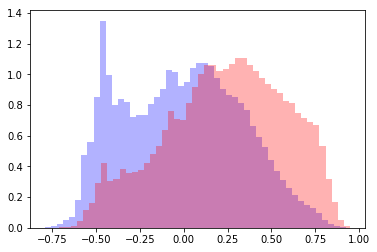

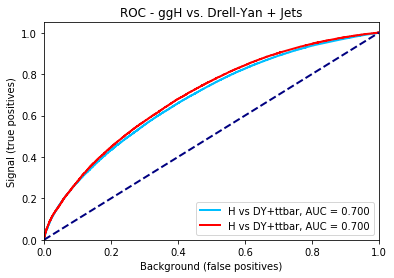

In [29]:
x_wt = x[:,wt_var_indices]
x_wt_1 = x_wt.flatten()

BDT_v = x[:,BDT_var_indices]
BDT_v_1 = BDT_v.flatten()

y_frame = pd.DataFrame({'truth':y, 'BDT':BDT_v_1, 'evt_weight':x_wt_1})

##########################################################
# make histogram of discriminator value for signal and bkg
##########################################################
disc_bkg    = y_frame[y_frame['truth'] == 0]['BDT'].values
disc_signal = y_frame[y_frame['truth'] == 1]['BDT'].values
plt.figure()
plt.hist(disc_bkg, color="blue",normed=True, bins=50, alpha=0.3)
plt.hist(disc_signal, color="red",normed=True, bins=50, alpha=0.3)
#plt.savefig('myDiscriminator' + test_name + '.png')

#get roc curve
fpr, tpr, threshold = roc_curve(y, BDT_v, None,x_wt)
#area = auc(fpr, tpr)
#print area
area = 0.7

#plot roc curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, label="H vs DY+ttbar, AUC = {:.3f}".format(area), color='deepskyblue',
       lw=lw)
plt.plot(fpr_nw, tpr_nw, label="H vs DY+ttbar, AUC = {:.3f}".format(area), color='red',
       lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Background (false positives)')
plt.ylabel('Signal (true positives)')
plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
plt.legend(loc="lower right")

0.8
0.7
0.6
0.5
0.4
0.3
0.2


Text(0.5,0,'$m_{\\mu\\mu}$')

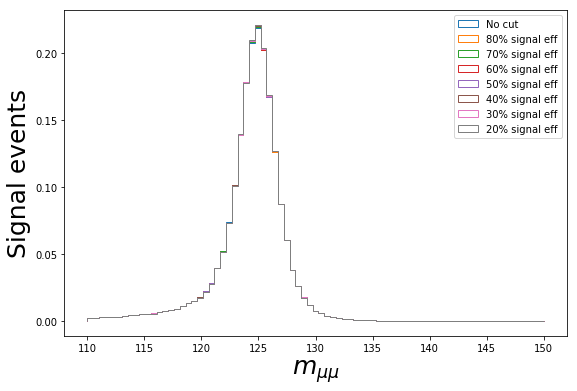

In [32]:
mass_test = x_test[:,mass_var_indices]
mass_test_1 = mass_test.flatten()
y_frame_2 = pd.DataFrame({'truth':y_test, 'mass':mass_test_1,'disc':y_pred2, 'evt_weight':x_test_wt_1})
disc_bkg_2    = y_frame_2[y_frame_2['truth'] == 0]['disc'].values
disc_signal_2 = y_frame_2[y_frame_2['truth'] == 1]['disc'].values
bkg_w_2    = y_frame_2[y_frame_2['truth'] == 0]['evt_weight'].values
signal_w_2 = y_frame_2[y_frame_2['truth'] == 1]['evt_weight'].values
mass_bkg_2 = y_frame_2[y_frame_2['truth'] == 0]['mass'].values
mass_signal_2 = y_frame_2[y_frame_2['truth'] == 1]['mass'].values

fontsize=25
TPR_thresholds = [0.8,0.7,0.6, 0.5, 0.4, 0.3,0.2]
bins = np.linspace(110, 150, 80)
plt.figure(figsize=(9,6))
plt.hist(mass_signal_2, bins=bins, weights=signal_w_2, histtype='step', label='No cut',normed=True)
for TPR_threshold in TPR_thresholds:
    print TPR_threshold
    thres_idx = np.argmax(tpr_nw>TPR_threshold)
    #print "thres_idx"
    #print thres_idx
    #plt.hist(df_bkg['Higgs_mass'][df_bkg['disc_nw']>threshold[thres_idx]], 
    #         bins=100, histtype='step', 
    #         label= "{:.0f}% signal eff".format(100*tpr[thres_idx]),
    #         normed=True)
    
    plt.hist(y_frame_2['mass'][y_frame_2['truth'] == 1][y_frame_2['disc']>threshold[thres_idx]],
              bins=bins,weights=y_frame_2['evt_weight'][y_frame_2['truth'] == 1][y_frame_2['disc']>threshold[thres_idx]], histtype='step', 
             label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
             normed=True)
    
plt.legend(loc='best')
plt.ylabel('Signal events',fontsize=fontsize)
plt.xlabel(r'$m_{\mu\mu}$',fontsize=fontsize)

0.8
0.7
0.6
0.5
0.4
0.3
0.2


Text(0.5,0,'$m_{\\mu\\mu}$')

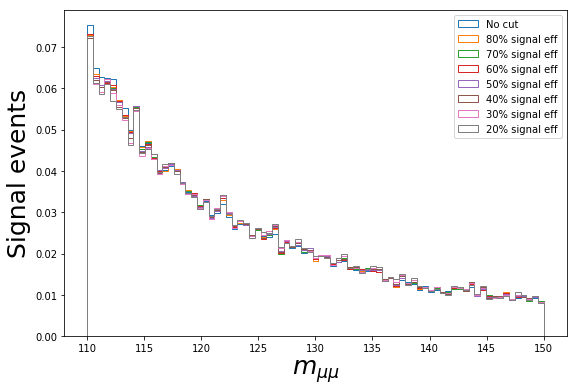

In [33]:
plt.figure(figsize=(9,6))
plt.hist(mass_bkg_2, bins=bins, weights=bkg_w_2, histtype='step', label='No cut',normed=True)
for TPR_threshold in TPR_thresholds:
    print TPR_threshold
    thres_idx = np.argmax(tpr_nw>TPR_threshold)
    #print "thres_idx"
    #print thres_idx
    #plt.hist(df_bkg['Higgs_mass'][df_bkg['disc_nw']>threshold[thres_idx]], 
    #         bins=100, histtype='step', 
    #         label= "{:.0f}% signal eff".format(100*tpr[thres_idx]),
    #         normed=True)
    
    plt.hist(y_frame_2['mass'][y_frame_2['truth'] == 0][y_frame_2['disc']>threshold[thres_idx]],
              bins=bins,weights=y_frame_2['evt_weight'][y_frame_2['truth'] == 0][y_frame_2['disc']>threshold[thres_idx]], histtype='step', 
             label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
             normed=True)
    
plt.legend(loc='best')
plt.ylabel('Signal events',fontsize=fontsize)
plt.xlabel(r'$m_{\mu\mu}$',fontsize=fontsize)

0.95
0.05


Text(0.5,0,'$m_{\\mu\\mu}$')

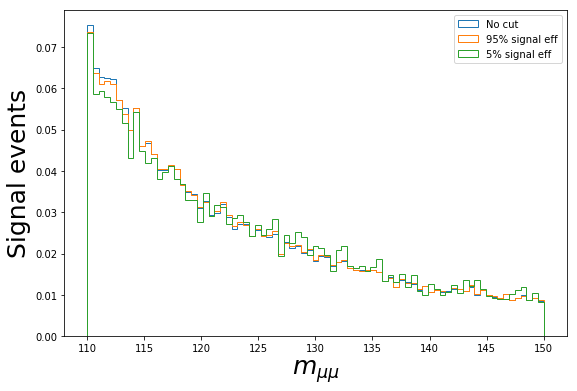

In [34]:
TPR_thresholds = [0.95,0.05]
plt.figure(figsize=(9,6))
plt.hist(mass_bkg_2, bins=bins, weights=bkg_w_2, histtype='step', label='No cut',normed=True)
for TPR_threshold in TPR_thresholds:
    print TPR_threshold
    thres_idx = np.argmax(tpr_nw>TPR_threshold)
    #print "thres_idx"
    #print thres_idx
    #plt.hist(df_bkg['Higgs_mass'][df_bkg['disc_nw']>threshold[thres_idx]], 
    #         bins=100, histtype='step', 
    #         label= "{:.0f}% signal eff".format(100*tpr[thres_idx]),
    #         normed=True)
    
    plt.hist(y_frame_2['mass'][y_frame_2['truth'] == 0][y_frame_2['disc']>threshold[thres_idx]],
              bins=bins,weights=y_frame_2['evt_weight'][y_frame_2['truth'] == 0][y_frame_2['disc']>threshold[thres_idx]], histtype='step', 
             label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
             normed=True)
    
plt.legend(loc='best')
plt.ylabel('Signal events',fontsize=fontsize)
plt.xlabel(r'$m_{\mu\mu}$',fontsize=fontsize)

In [21]:
y_frame_2.to_pickle("y_frame_2_morevars.pkl")

In [37]:
np.save("y_test_morevars", y_test)
np.save("y_pred2_morevars", y_pred2)
np.save("x_test_wt_morevars", x_test)
np.save("x_test_wt_morevars", x_test_wt)

np.save("y_train_morevars", y_train)
np.save("y_pred2_train_morevars", y_pred2_train)
np.save("x_test_wt_morevars", x_train)
np.save("x_test_wt_morevars", x_train_wt)

In [23]:
df = pd.read_pickle("y_frame_2_morevars.pkl")

In [39]:
print(df)

            disc  evt_weight        mass  truth
0       0.909854    0.000035  124.902180    1.0
1       0.986777    0.000340  123.937821    1.0
2       0.744950    0.000346  126.727356    1.0
3       0.663181    2.763985  113.505399    0.0
4       0.970416    0.000029  126.813429    1.0
5       0.868947    0.000344  118.516901    1.0
6       0.969462    0.000030  124.757124    1.0
7       0.849914    0.000029  127.294722    1.0
8       0.909346    0.000029  124.800071    1.0
9       0.256256    0.000030  125.318134    1.0
10      0.893923    0.000030  124.119634    1.0
11      0.619108    0.000346  125.958473    1.0
12      0.740145    2.763985  118.471022    0.0
13      0.725135    0.000342  127.922962    1.0
14      0.849562    0.000030  119.754779    1.0
15      0.852260    0.000344  123.721366    1.0
16      0.781647    0.000346  121.443960    1.0
17      0.889285    0.000342  128.096540    1.0
18      0.504078    0.000030  124.926807    1.0
19      0.947608    0.000029  123.119239

In [39]:
#signal = df_signal.values
#ggH = df_signal_Glu.values
#VBFH = df_signal_VBF.values
WH = df_signal_WH.values
ZH = df_signal_ZH.values
WH_label = np.ones(len(WH))
ZH_label = np.ones(len(ZH))

# make predictions for signal proccess
#infile = open("model_Incl_March19_nw.pkl","rb")
#model_opt = pickle.load(infile)
#print(model_opt)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.19043835452186855,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
       n_estimators=487, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [49]:
x_VBFH = np.concatenate((ggH,bkgM))
y_VBFH = np.concatenate((ggH_label,bkgM_label))

#x_ggH = np.concatenate((ggH,bkg_all))
#y_ggH = np.concatenate((ggH_label,bkg_all_label))
#x_WH = np.concatenate((WH,bkg_all))
#y_WH = np.concatenate((WH_label,bkg_all_label))
#x_ZH = np.concatenate((ZH,bkg_all))
#y_ZH = np.concatenate((ZH_label,bkg_all_label))

y_pred_VBFH = model2.predict_proba(x_VBFH[:,var_indices])[:, 1]

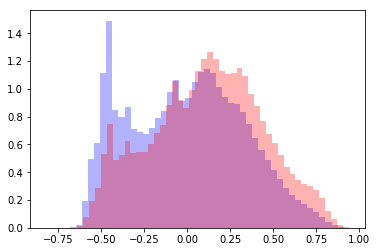

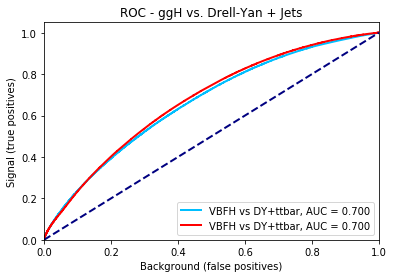

In [50]:
x_VBFH_wt = x_VBFH[:,wt_var_indices]
x_VBFH_wt_1 = x_VBFH_wt.flatten()

BDT_VBFH_v = x_VBFH[:,BDT_var_indices]
BDT_VBFH_v_1 = BDT_VBFH_v.flatten()

y_VBFH_frame = pd.DataFrame({'truth':y_VBFH, 'BDT':BDT_VBFH_v_1, 'evt_weight':x_VBFH_wt_1})

##########################################################
# make histogram of discriminator value for signal and bkg
##########################################################
disc_VBFH_bkg    = y_VBFH_frame[y_VBFH_frame['truth'] == 0]['BDT'].values
disc_VBFH_signal = y_VBFH_frame[y_VBFH_frame['truth'] == 1]['BDT'].values
plt.figure()
plt.hist(disc_VBFH_bkg, color="blue",normed=True, bins=50, alpha=0.3)
plt.hist(disc_VBFH_signal, color="red",normed=True, bins=50, alpha=0.3)
#plt.savefig('myDiscriminator' + test_name + '.png')

#get roc curve
fpr_VBFH, tpr_VBFH, threshold_VBFH = roc_curve(y_VBFH, BDT_VBFH_v, None,x_VBFH_wt)
fpr_nw_VBFH, tpr_nw_VBFH, threshold_nw_VBFH = roc_curve(y_VBFH, y_pred_VBFH, None,x_VBFH_wt)


#area = auc(fpr, tpr)
#print area
area = 0.7

#plot roc curve
plt.figure()
lw = 2
plt.plot(fpr_VBFH, tpr_VBFH, label="VBFH vs DY+ttbar, AUC = {:.3f}".format(area), color='deepskyblue',
       lw=lw)
plt.plot(fpr_nw_VBFH, tpr_nw_VBFH, label="VBFH vs DY+ttbar, AUC = {:.3f}".format(area), color='red',
       lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Background (false positives)')
plt.ylabel('Signal (true positives)')
plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
plt.legend(loc="lower right")

0.95
0.05


Text(0.5,0,'$m_{\\mu\\mu}$')

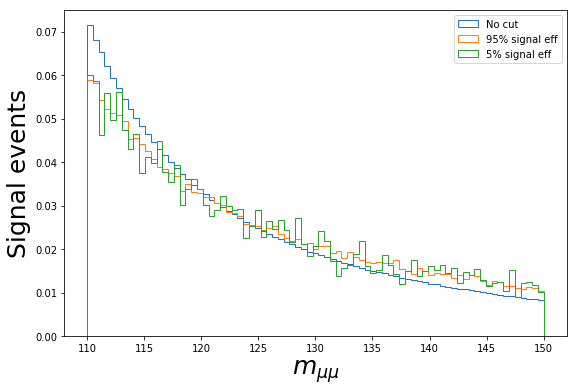

In [51]:
mass_VBFH= x_VBFH[:,mass_var_indices]
mass_VBFH_1 = mass_VBFH.flatten()
y_VBFH_frame_2 = pd.DataFrame({'truth':y_VBFH, 'mass':mass_VBFH_1,'disc':y_pred_VBFH, 'evt_weight':x_VBFH_wt_1})
bkg_VBFH_w_2    = y_VBFH_frame_2[y_VBFH_frame_2['truth'] == 0]['evt_weight'].values
signal_VBFH_w_2 = y_VBFH_frame_2[y_VBFH_frame_2['truth'] == 1]['evt_weight'].values
mass_VBFH_bkg_2 = y_VBFH_frame_2[y_VBFH_frame_2['truth'] == 0]['mass'].values
mass_VBFH_signal_2 = y_VBFH_frame_2[y_VBFH_frame_2['truth'] == 1]['mass'].values

0.9
0.7
0.5
0.3
0.1
0.05


Text(0.5,0,'$m_{\\mu\\mu}$')

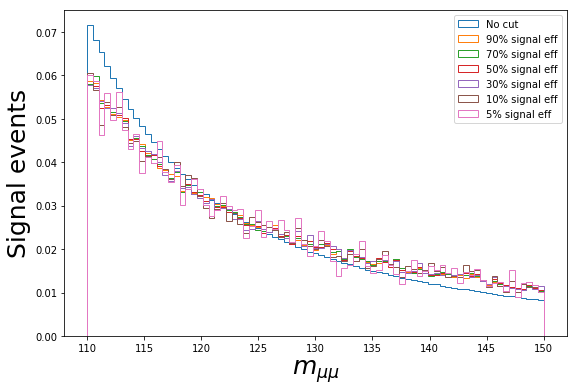

In [63]:
TPR_thresholds = [0.9,0.7,0.5,0.3,0.1,0.05]
plt.figure(figsize=(9,6))
plt.hist(y_VBFH_frame_2['mass'][y_VBFH_frame_2['truth'] == 0], bins=bins, weights=y_VBFH_frame_2['evt_weight'][y_VBFH_frame_2['truth'] == 0], histtype='step', label='No cut',normed=True)
for TPR_threshold in TPR_thresholds:
    print TPR_threshold
    thres_idx = np.argmax(tpr_nw>TPR_threshold)
    
    #plt.hist(y_VBFH_frame_2['mass'][y_VBFH_frame_2['truth'] == 0][y_VBFH_frame_2['disc']>0.5],
    #          bins=bins,weights=y_VBFH_frame_2['evt_weight'][y_VBFH_frame_2['truth'] == 0][y_VBFH_frame_2['disc']>0.5], histtype='step', 
    #         label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
    #         normed=True)
    
    plt.hist(y_VBFH_frame_2['mass'][y_VBFH_frame_2['truth'] == 0][y_VBFH_frame_2['disc']>threshold_nw_VBFH[thres_idx]],
              bins=bins,weights=y_VBFH_frame_2['evt_weight'][y_VBFH_frame_2['truth'] == 0][y_VBFH_frame_2['disc']>threshold_nw_VBFH[thres_idx]], histtype='step', 
             label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
             normed=True)
    
plt.legend(loc='best')
plt.ylabel('Signal events',fontsize=fontsize)
plt.xlabel(r'$m_{\mu\mu}$',fontsize=fontsize)